<a href="https://colab.research.google.com/github/yongsa-nut/SF251_67_2/blob/main/SOL_of_SF251_HW2_Visualization_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2 - Visualization Basic

## Due date: February 14th, 2025. 23:59 PM.

- There are 25 questions in total. 5 points total.

# Review: `plotnine` and `ggplot`

In this homework, we will practice using `plotnine` to plot various graphs.

In [ ]:
import pandas as pd
from plotnine import *
from plotnine.data import mpg  # dataset for the second half

- First, let's import the penguin dataset

In [ ]:
!wget https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/penguins.csv

--2025-03-10 07:23:42--  https://raw.githubusercontent.com/yongsa-nut/SF251_67_2/refs/heads/main/data/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15241 (15K) [text/plain]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]  14.88K  --.-KB/s    in 0s      

2025-03-10 07:23:43 (116 MB/s) - ‘penguins.csv’ saved [15241/15241]



In [ ]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

- For this homework, we will ignore `NaN` or missing data. This is not a good practice in general and can lead to misleading data analysis.
- `.dropna()` allows us to drop all rows (by default) which contains any `NaN`. ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html))

In [ ]:
print(f"Before removing NaN, we have {len(penguins)}")
penguins = penguins.dropna()
print(f"After removing NaN, we have {len(penguins)}")

Before removing NaN, we have 344
After removing NaN, we have 333


- To create a plot using `plotnine`, we define a plot object and (`+`) then add layers to it.

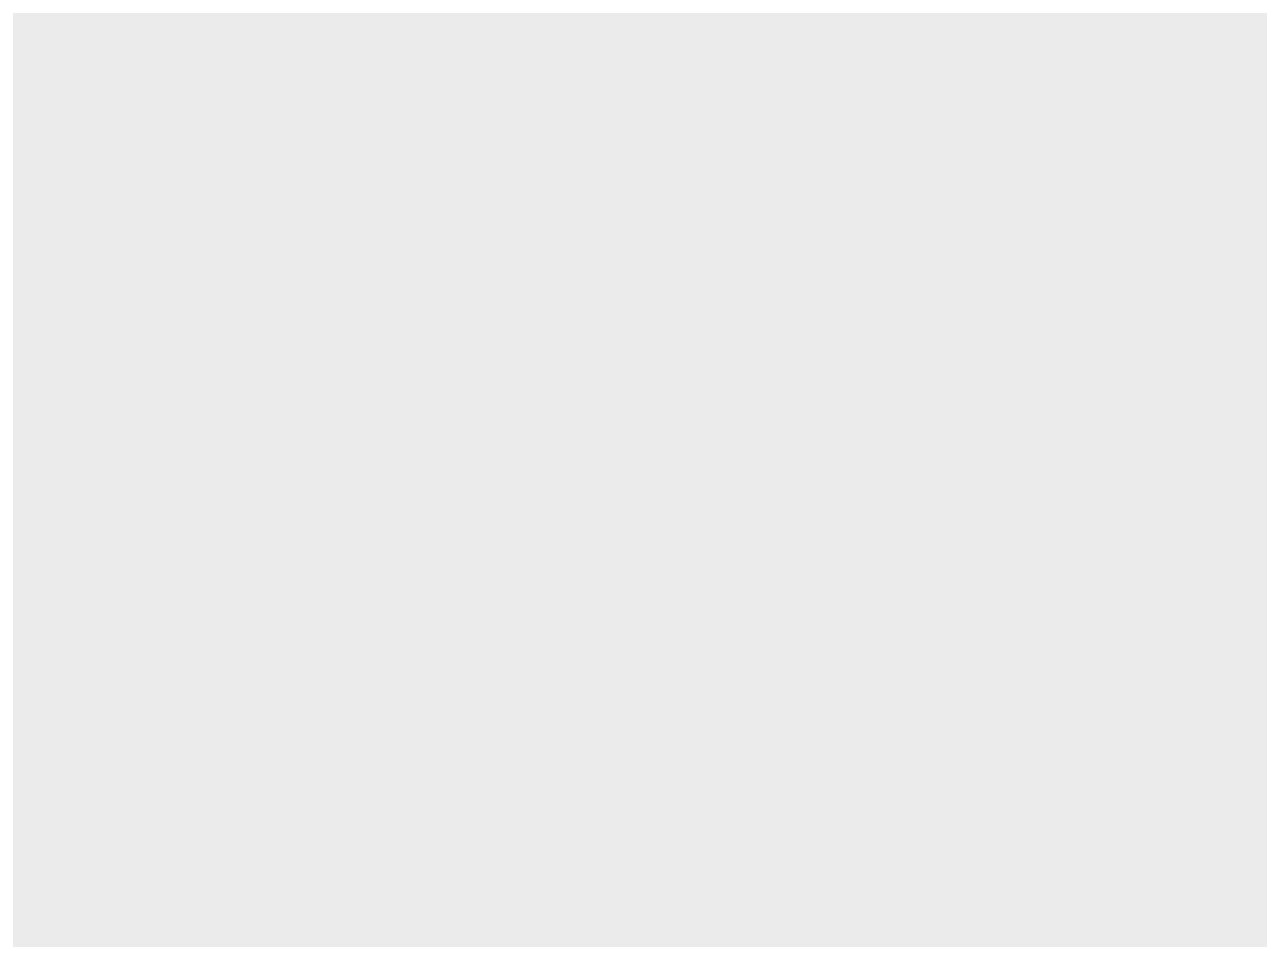

In [ ]:
ggplot(data = penguins)

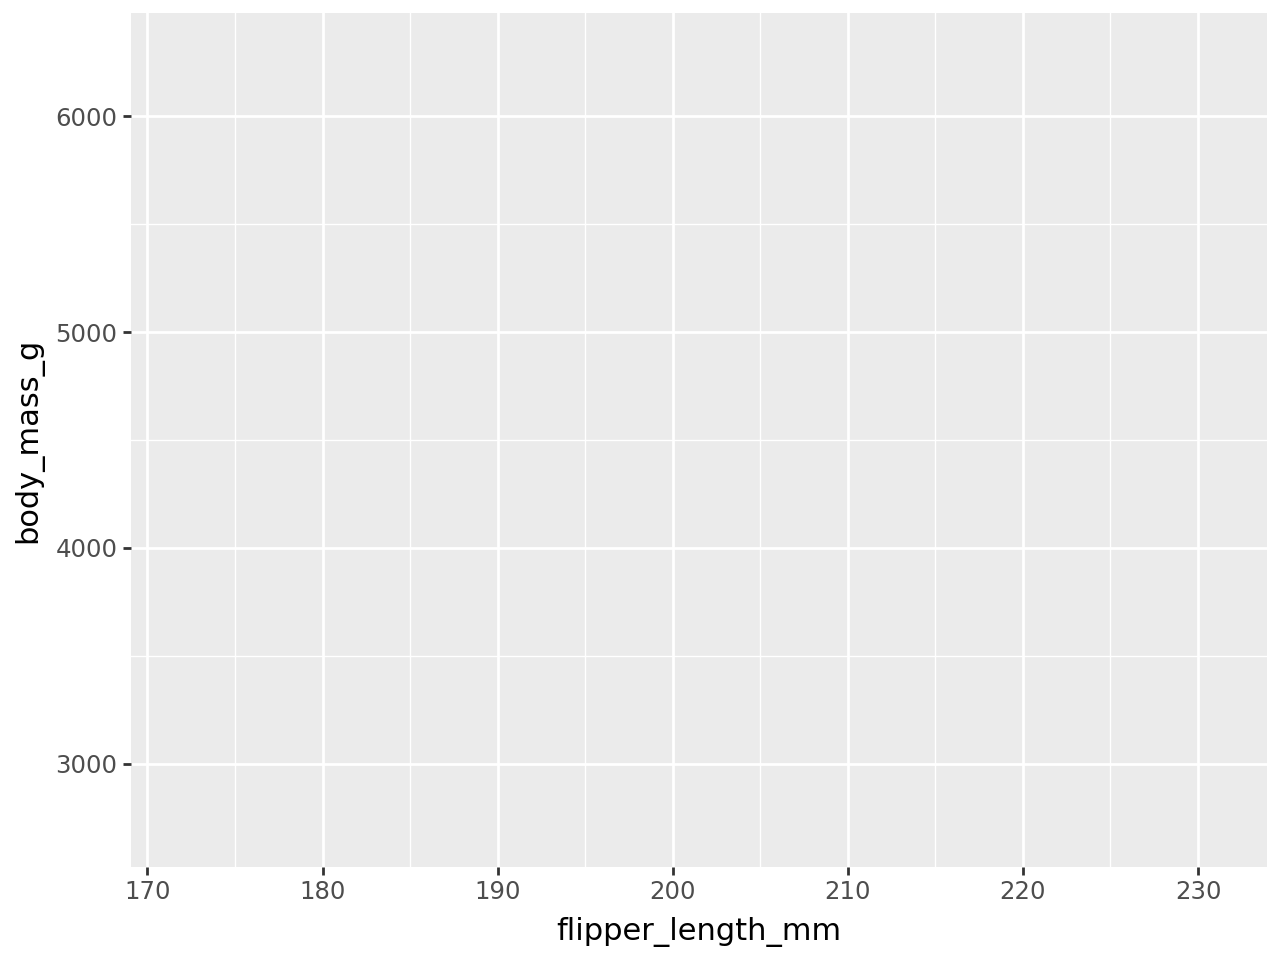

In [ ]:
(
  ggplot(data = penguins,
       mapping = aes(x = "flipper_length_mm", y = "body_mass_g"))
)

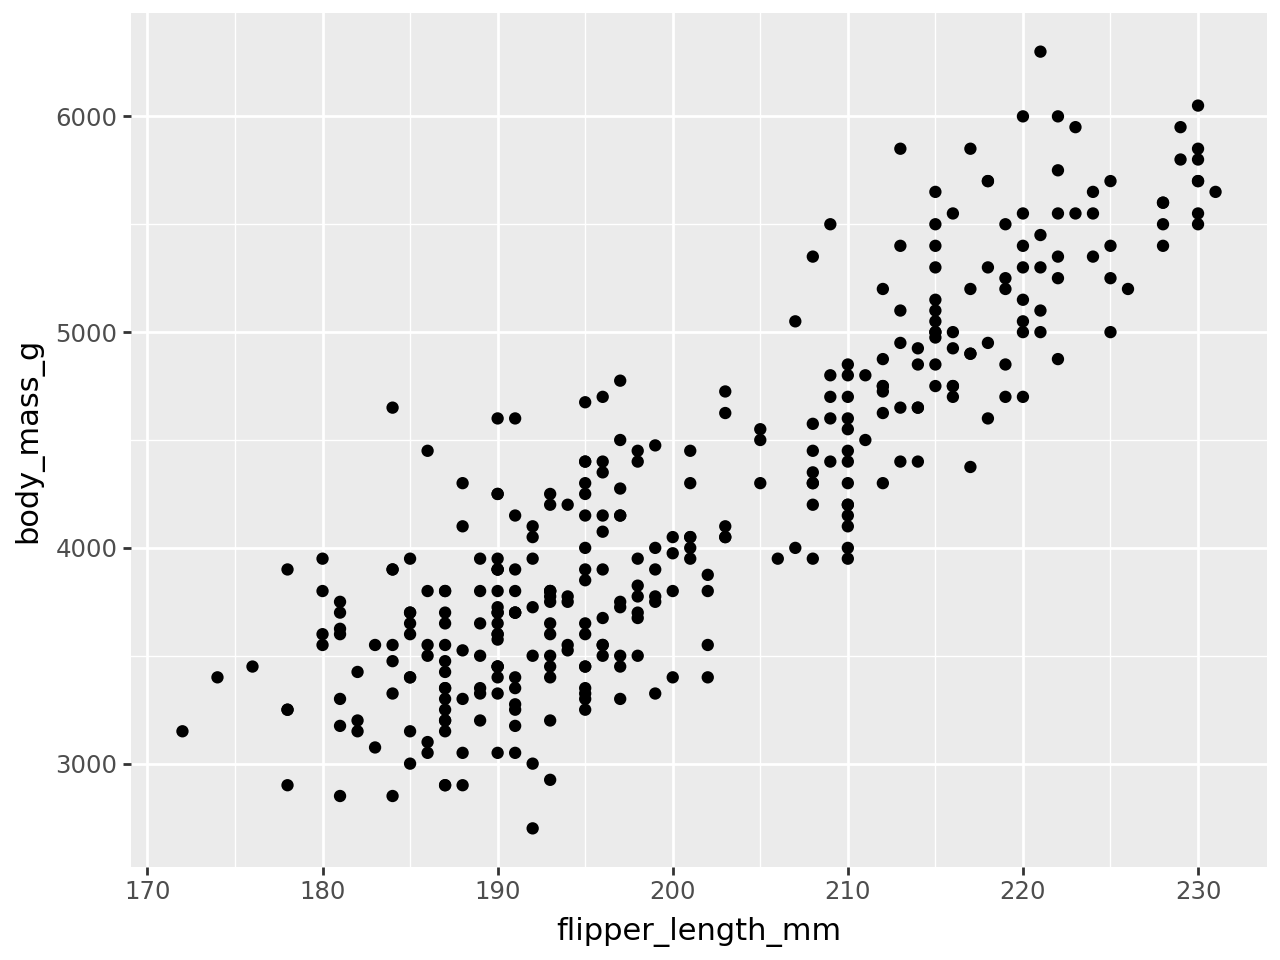

In [ ]:
(
  ggplot(data = penguins,
         mapping = aes(x = "flipper_length_mm", y = "body_mass_g")) +
  geom_point()
)

- You can shorten it and save the plot in a variable


<ggplot: (640 x 480)>


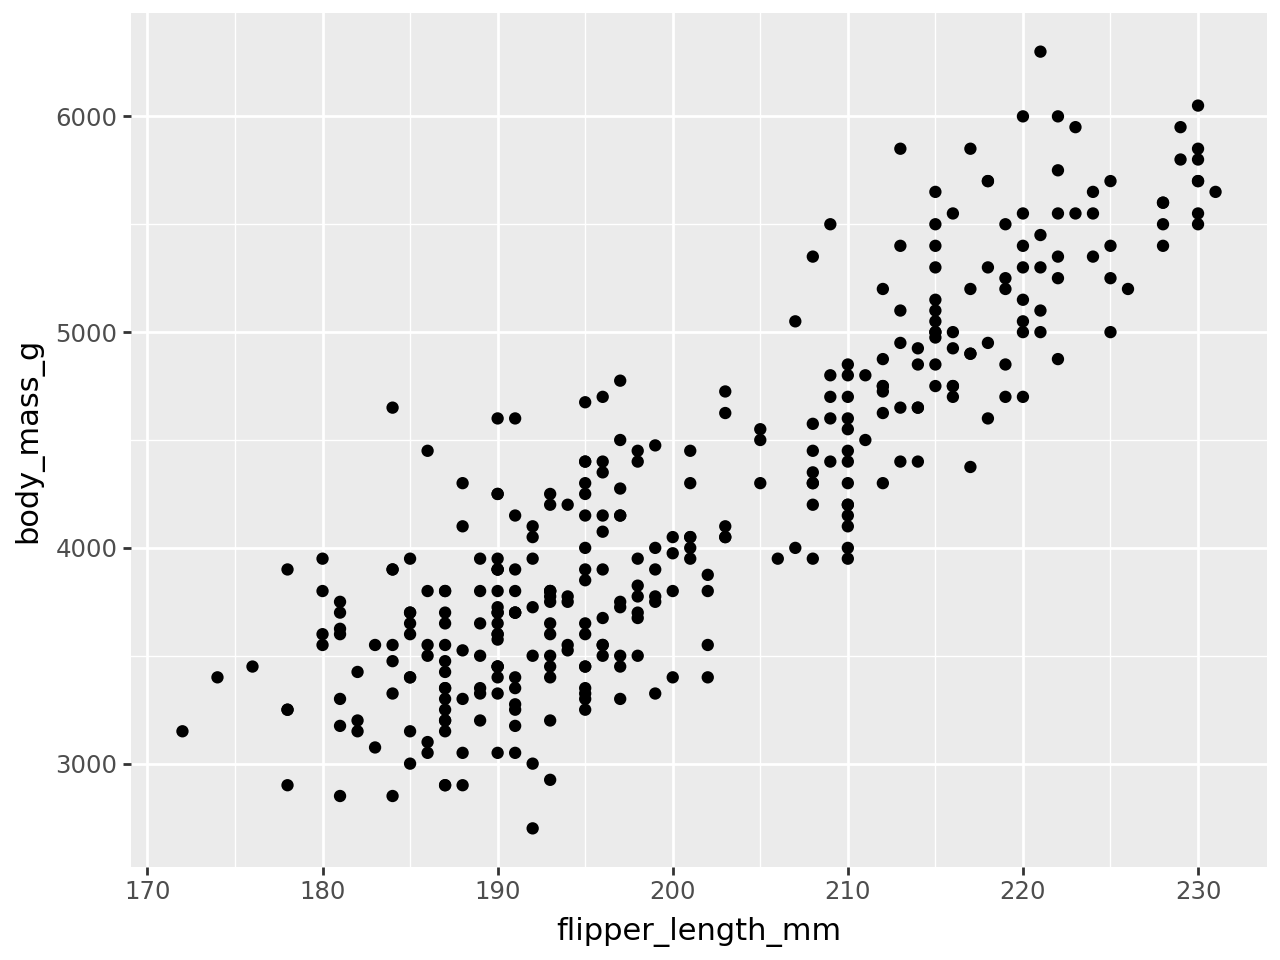

In [ ]:
g1 = ggplot(penguins, aes("flipper_length_mm", "body_mass_g")) + geom_point()
print(g1)
g1

- We then can add more layers such as x and y labels.

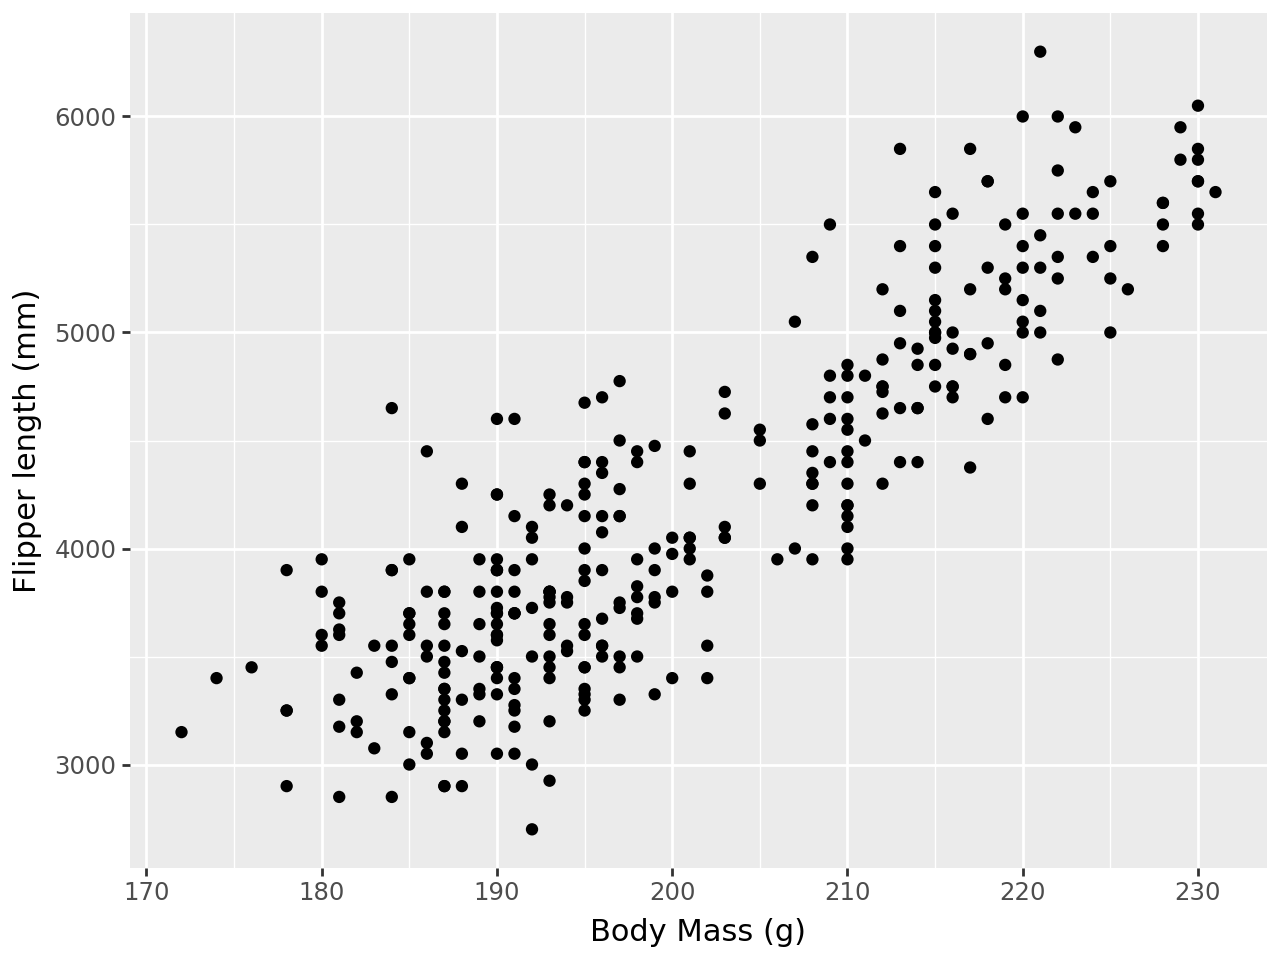

In [ ]:
g1 = g1 + labs(x = 'Body Mass (g)', y='Flipper length (mm)')
g1

<br>


---



## Penguin dataset Exploration

In the first half of this work, we will continue our exploration of penguin dataset.

The exploration consists of two parts:
- Ploting each variable individually.
- Plotting pairs of variable.

Let's begin by reminding ourselves what variables we have.

In [ ]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007

### Plotting variables individually

#### Q1a: plotting species

- `species` is a categorical variable so we will use barplot to visualize it.
- To plot a barplot, you can add a layer `geom_bar()`
- Complete the code below to create a barplot as shown below.

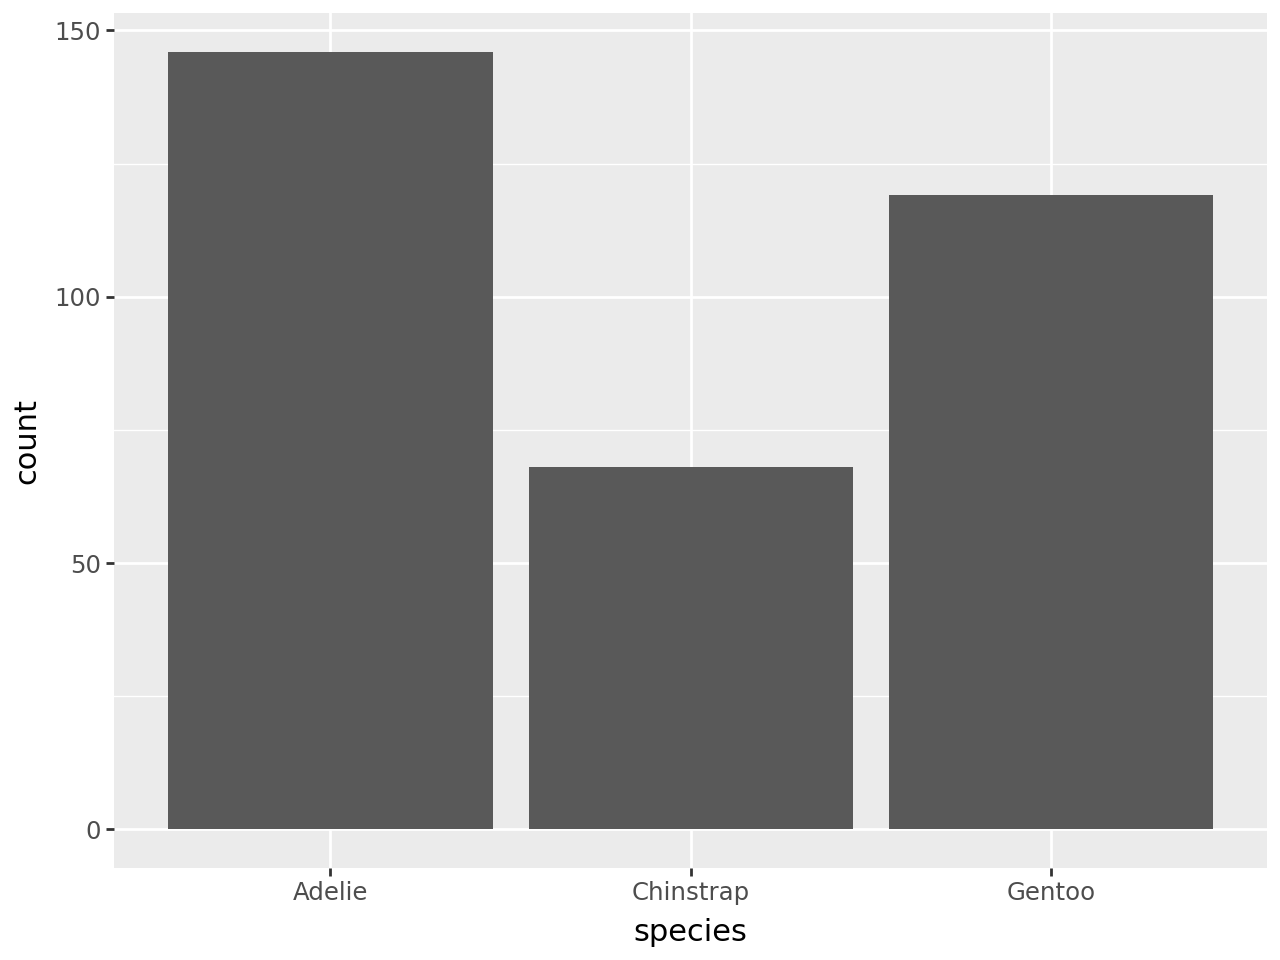

In [ ]:
# Click to see the plot below.

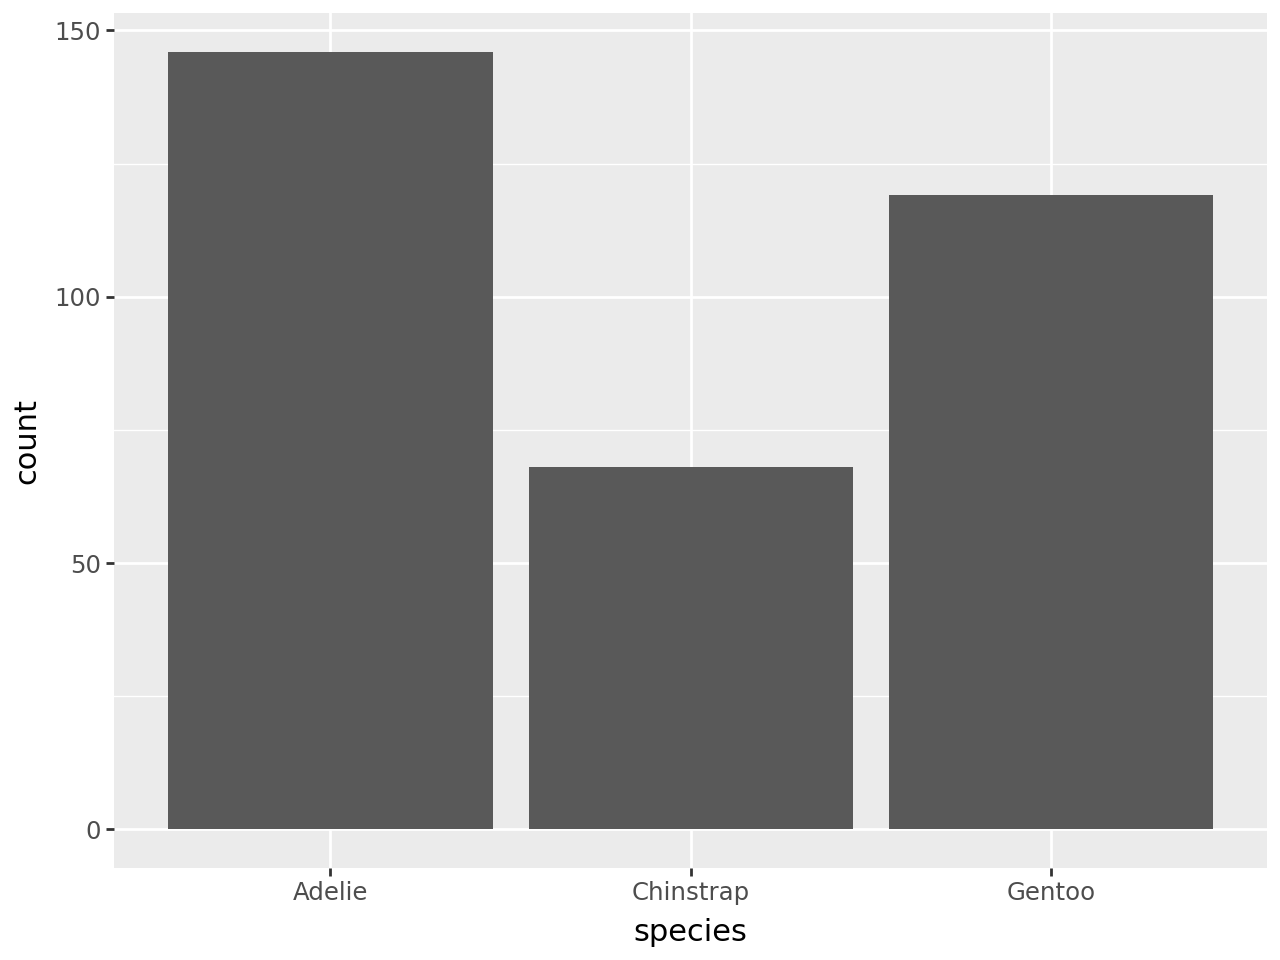

In [ ]:
g_species = (
  ggplot(data = penguins,
         mapping = aes(x = "species")) +
  geom_bar()
)
g_species

#### Q1b: plotting the remaining categorical variables.
- There are two other categorical variables in the dataset.
- Create two barplots below for each one of them.

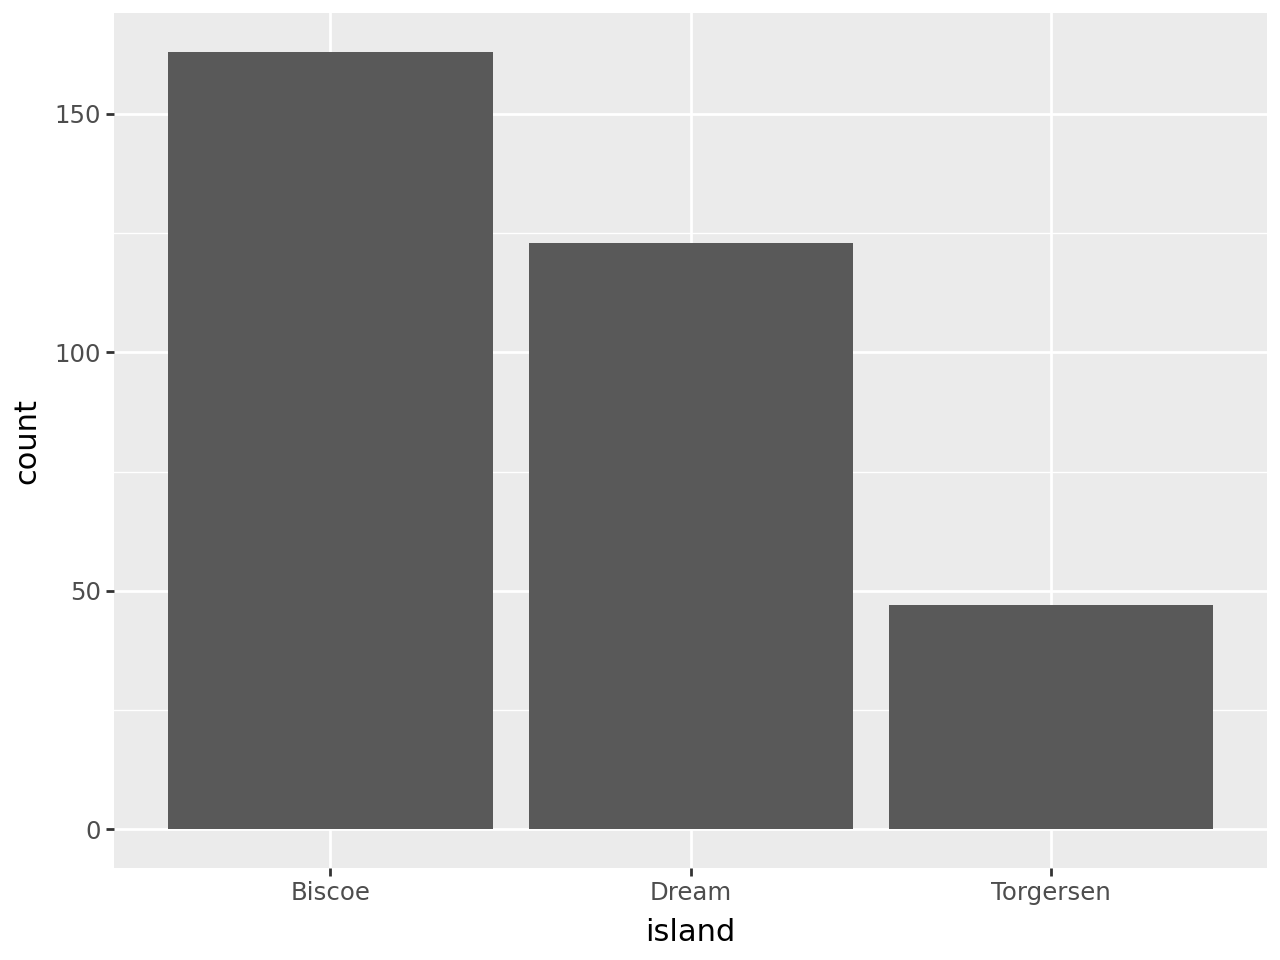

In [ ]:
# The first one == 'island'
(
  ggplot(data = penguins,
         mapping = aes(x = "island")) +
  geom_bar()
)

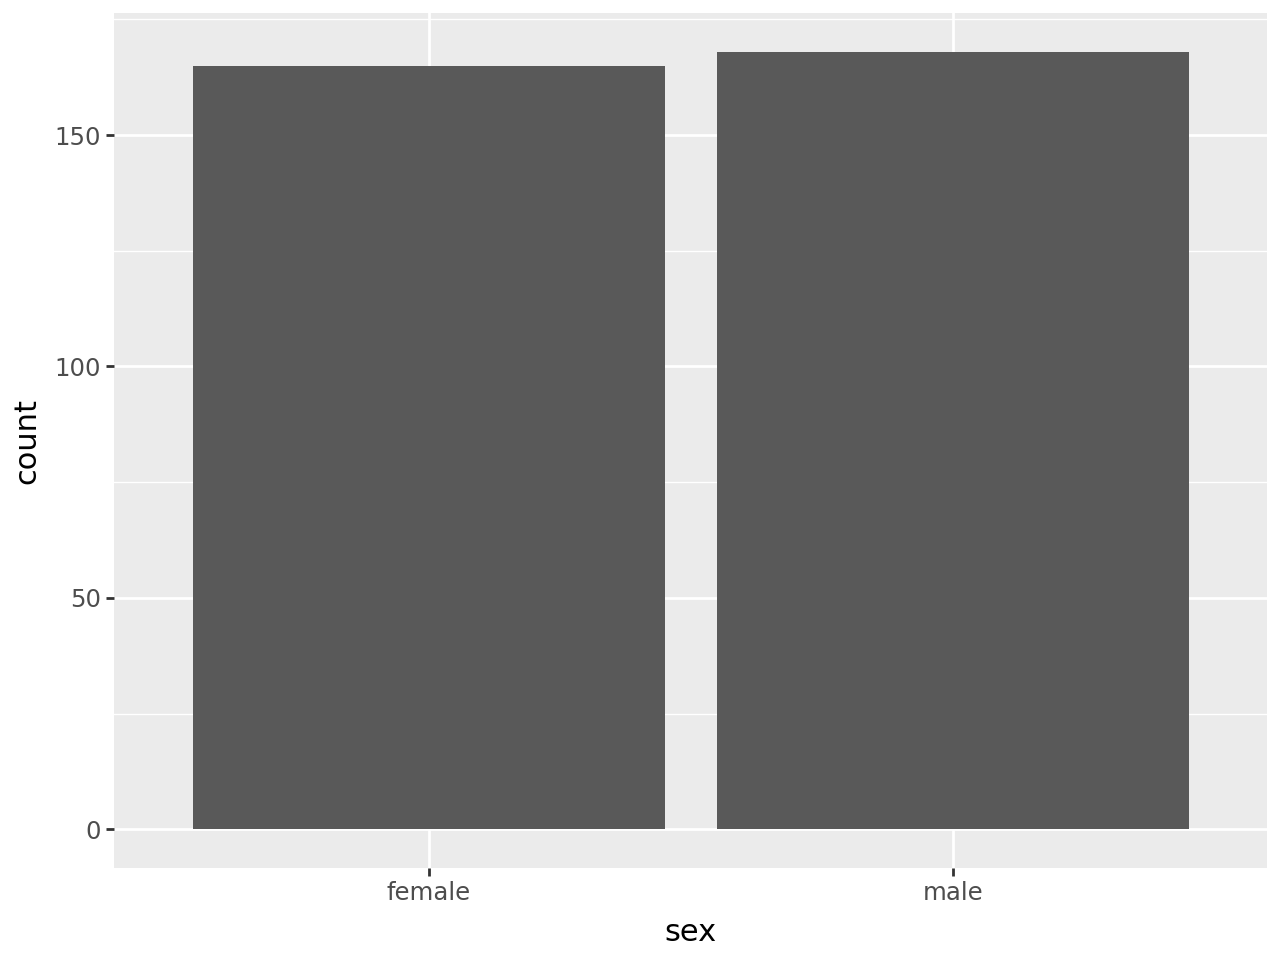

In [ ]:
# The second one == 'sex'
(
  ggplot(data = penguins,
         mapping = aes(x = "sex")) +
  geom_bar()
)

#### Q1c: ploting bill_length_mm
- `bill_length_mm` is a numerical variable. We will start with histogram.
- To plot a histogram, we can add a layer `geom_histogram()`
- Create a histrogram with 25 bins below. ([Documentation](https://plotnine.org/reference/geom_histogram.html))

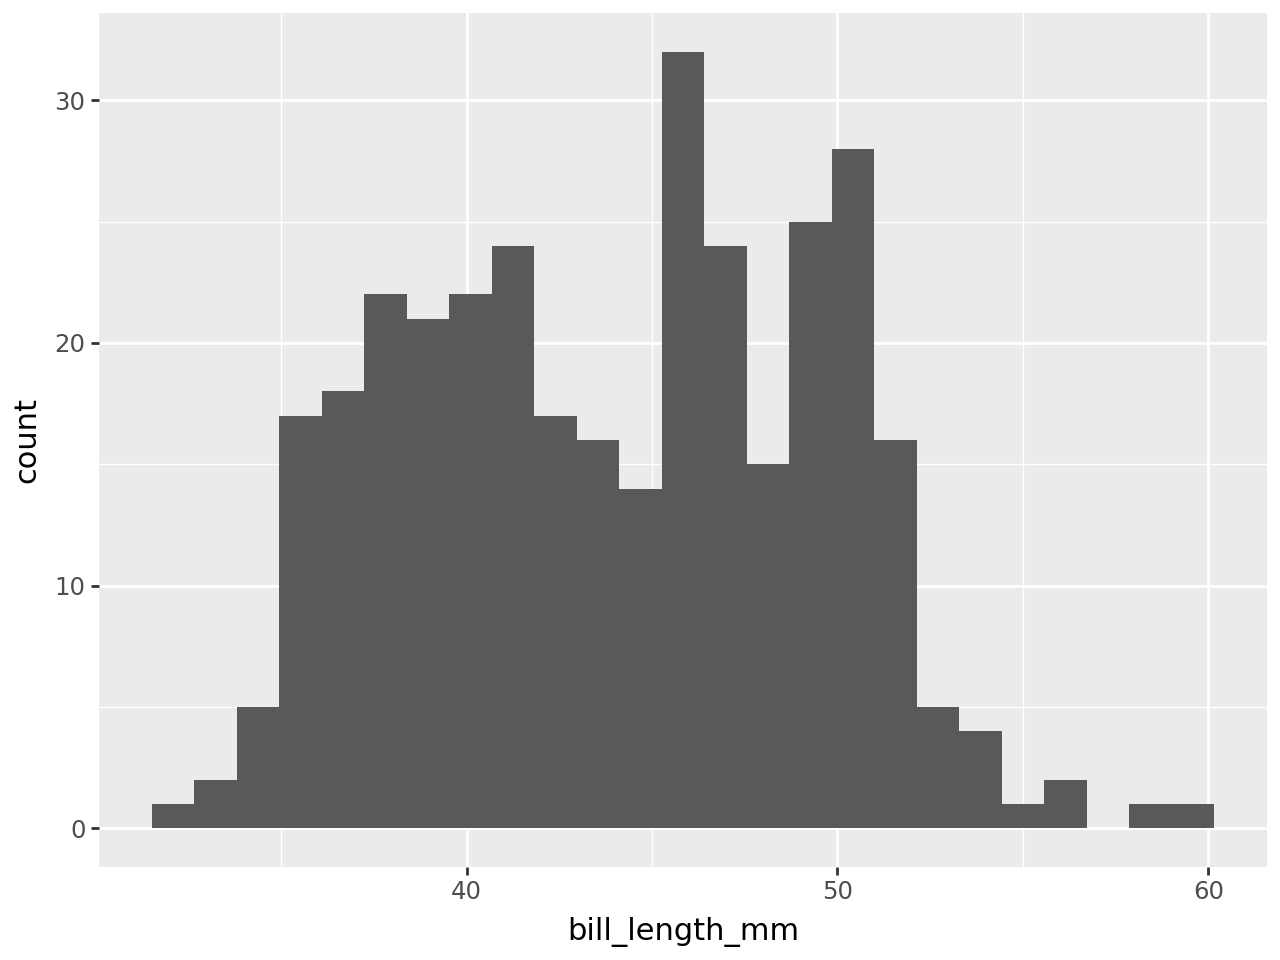

In [ ]:
# Click to see the plot below.

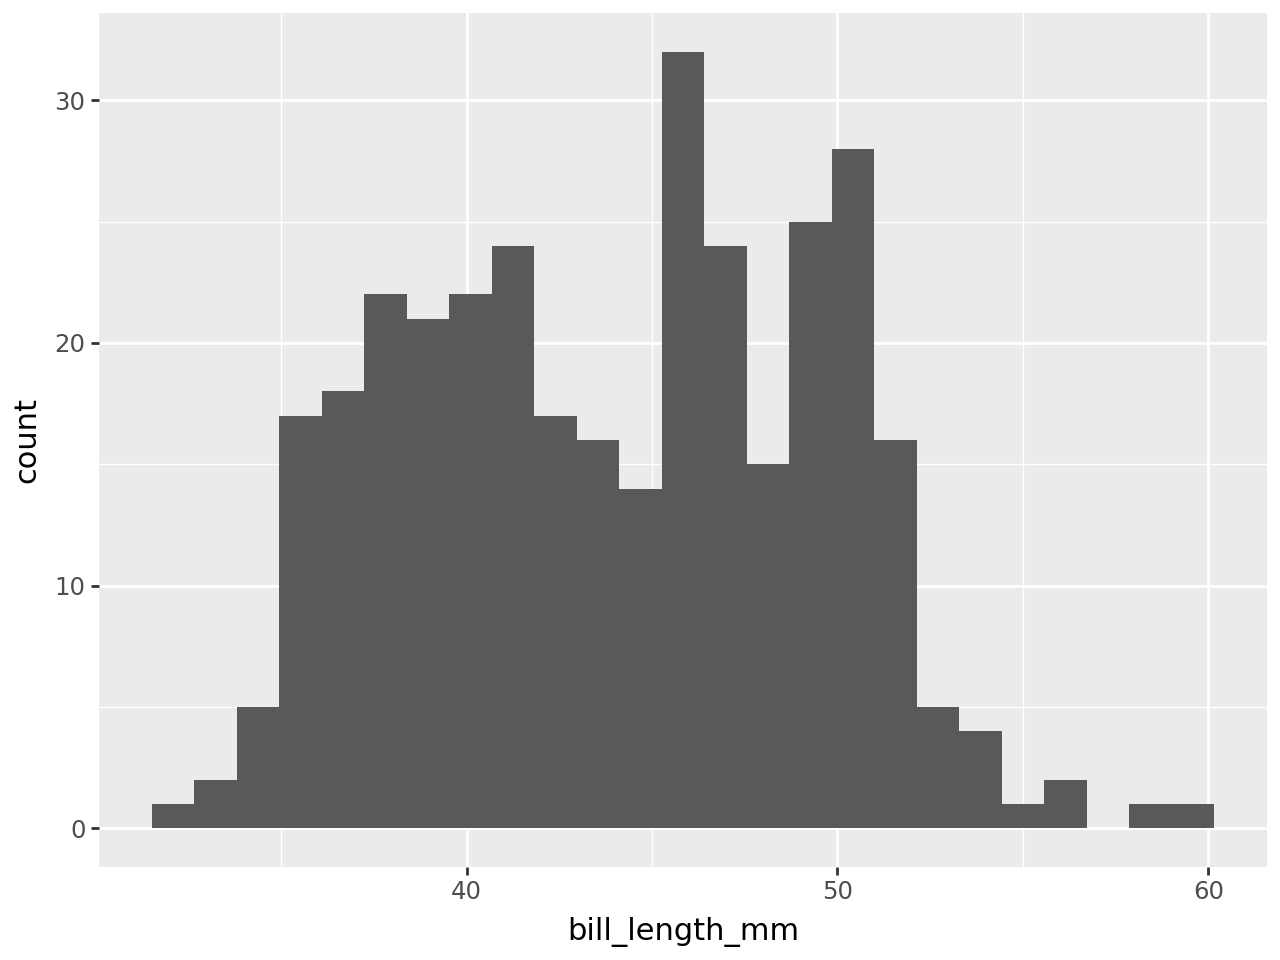

In [ ]:
g_bill_length = ggplot(data = penguins, mapping = aes(x = 'bill_length_mm')) + geom_histogram(bins=25)
g_bill_length

#### Q1d: overlaying lines on top
- In the lecture, we went over `geom_density`.
- For this question, we will use another geom, `geom_freqpoly`, to overlay a line over histogram. [Documentation](https://plotnine.org/reference/geom_freqpoly)
- Add `geom_freqpoly` to your preivous graph. Set the bins to 25.

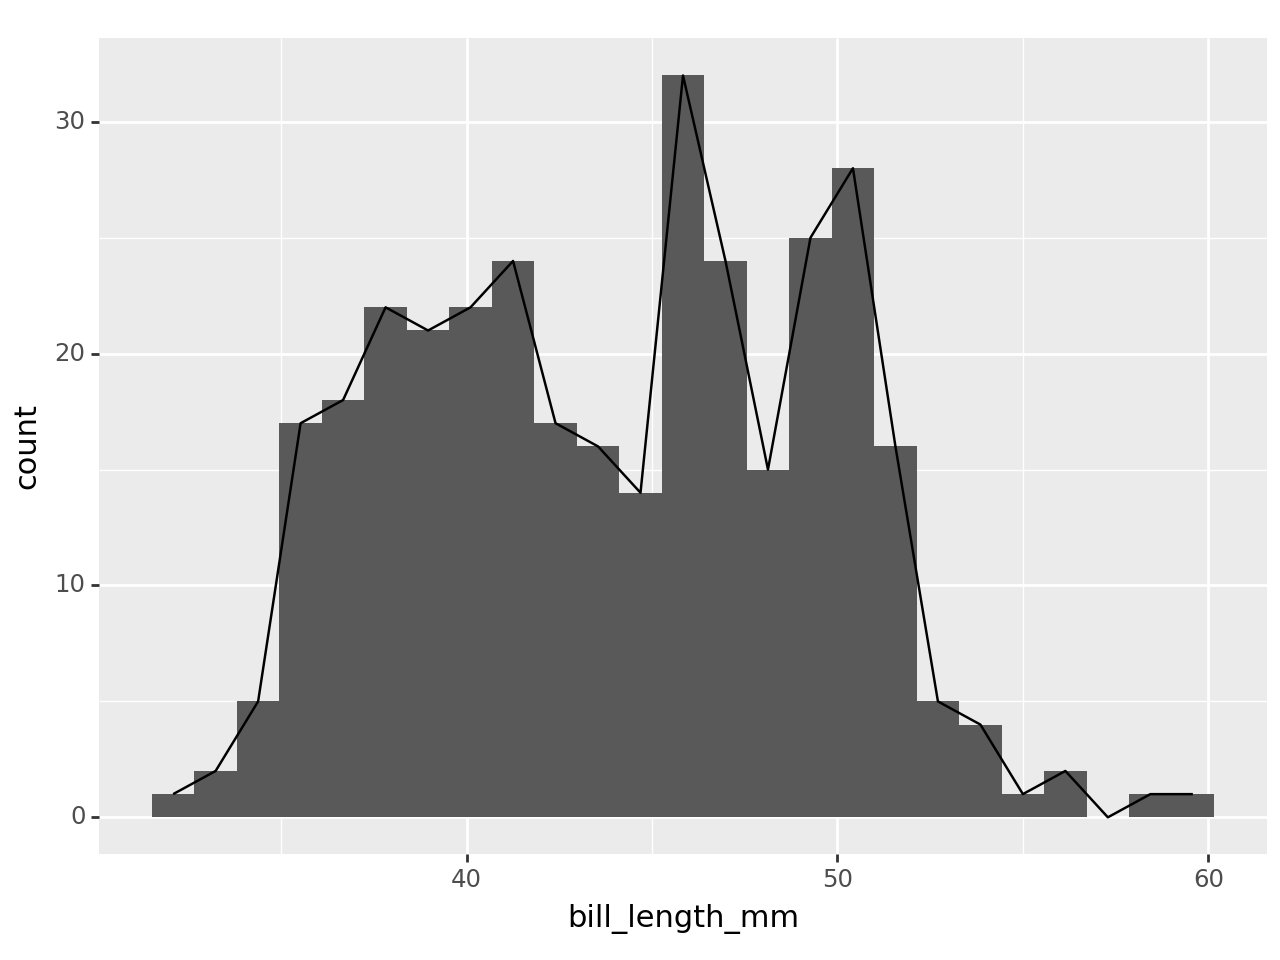

In [ ]:
# Click to see the plot below.

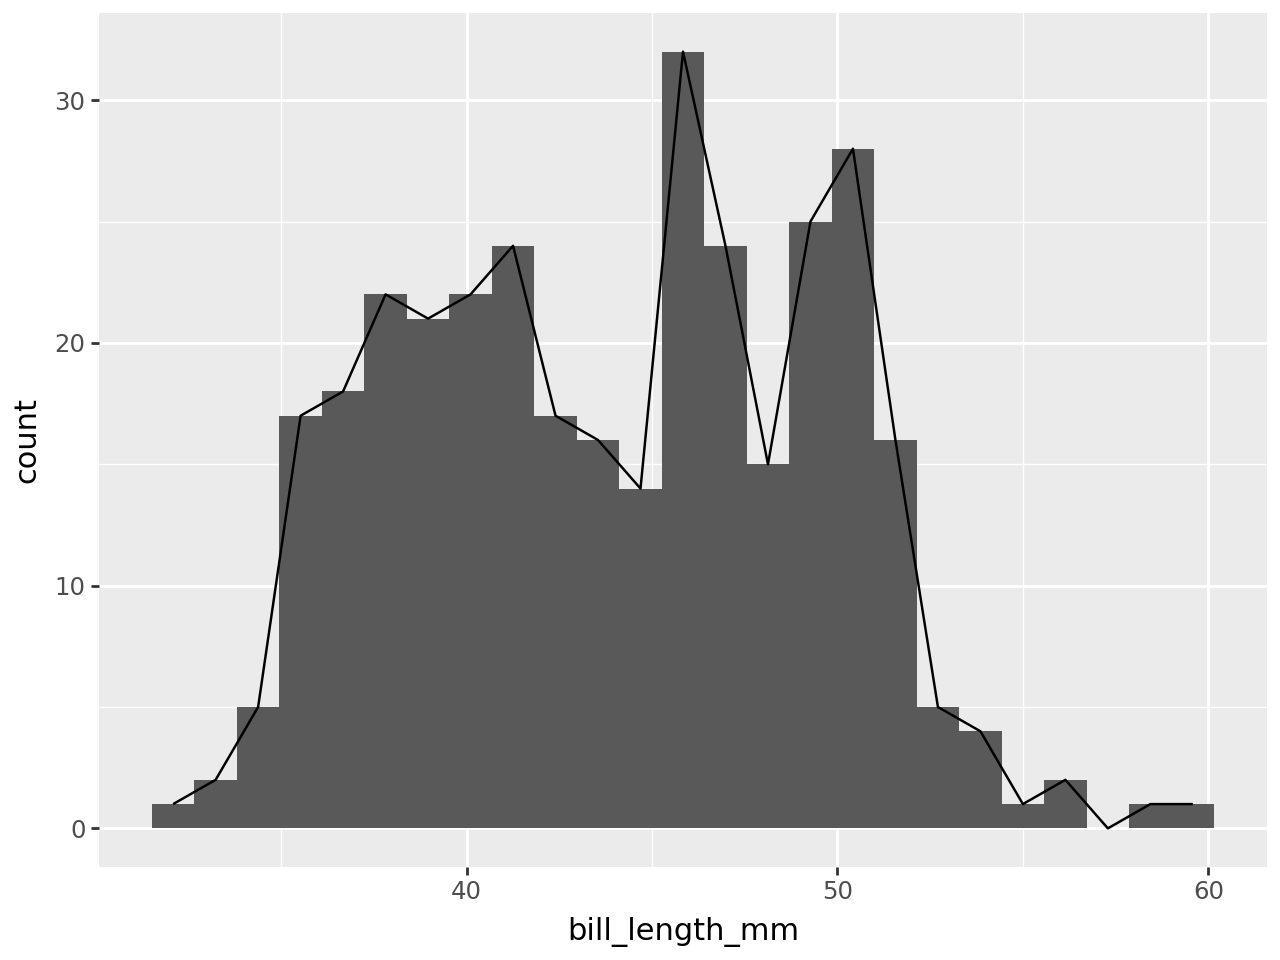

In [ ]:
g_bill_length = ggplot(data = penguins, mapping = aes(x = 'bill_length_mm')) + geom_histogram(bins=25) + geom_freqpoly(bins=25)
g_bill_length

#### Q1e: Adjusting historgram
- The previus graph doesn't good.
- For now, we will make one simple adjustment: changing color and alpha of the historgram.
- Create a new histogram plot with freq_poly and set the alpha of histrogram to 0.5 (`geom_histrogram(alpha=0.5)`) and `fill = 'pink'`.

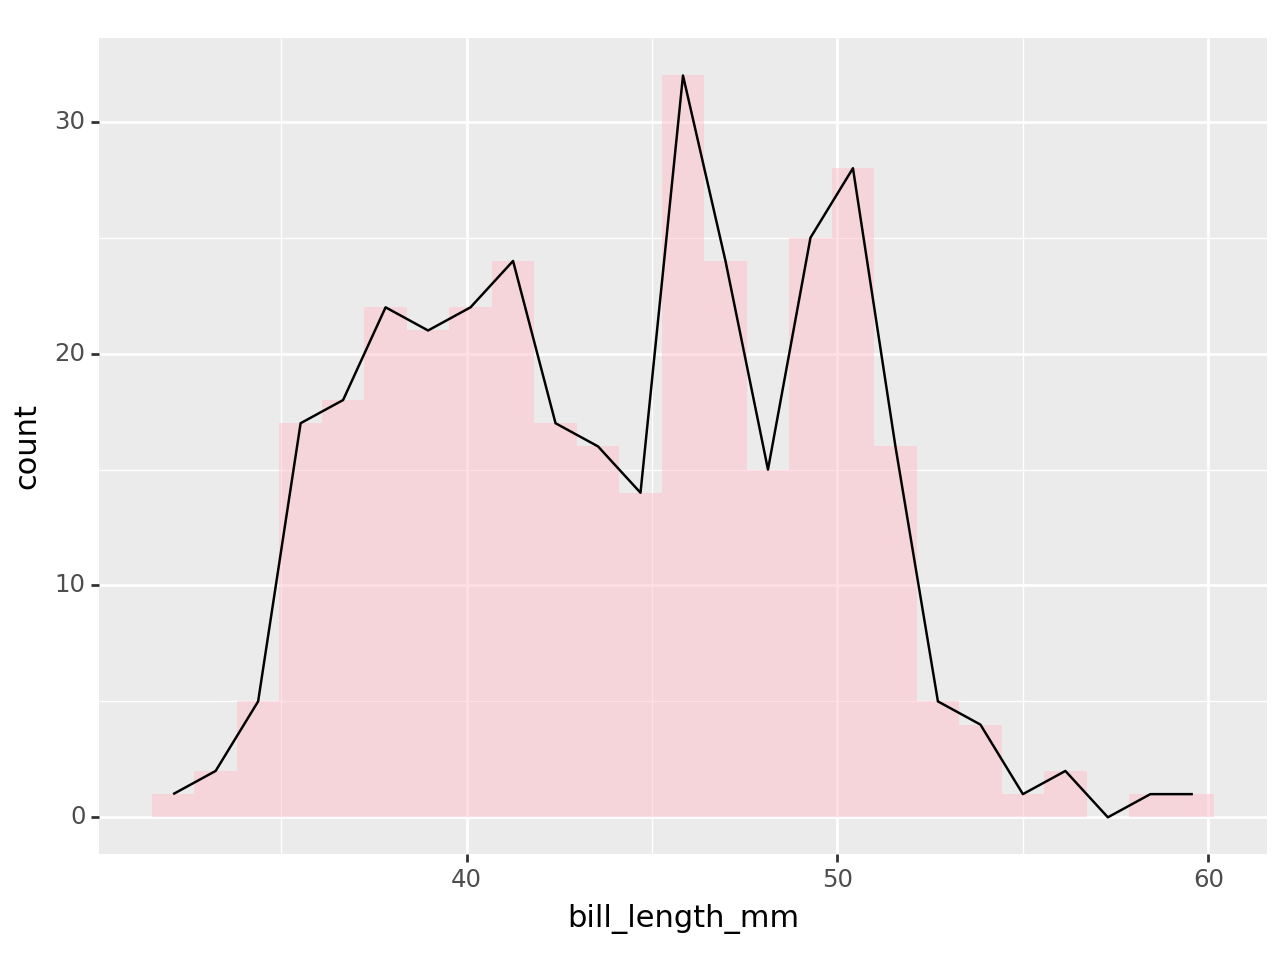

In [ ]:
# Click to see the plot below.

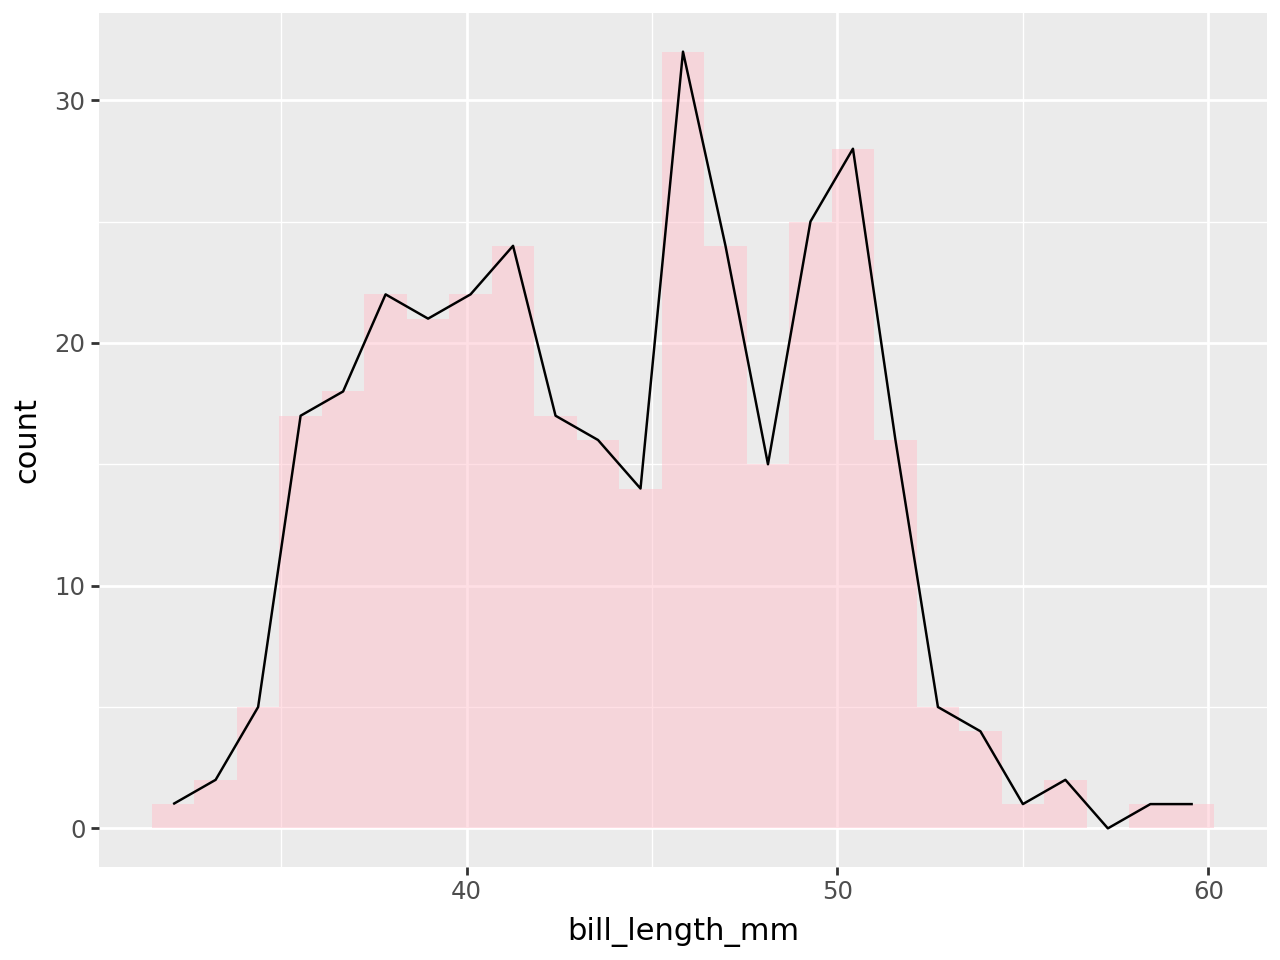

In [ ]:
g_bill_length = ggplot(data = penguins, mapping = aes(x = 'bill_length_mm')) + geom_histogram(alpha=0.5, fill ='pink', bins=25) + geom_freqpoly(bins=25)
g_bill_length

#### Q1f: Box plot

- Another way to visualize numerical variables is to use boxplot.
- Create a boxplot using `geom_boxplot()` for `bill_length_mm` below.
- Note: variable has to be on y-axis.

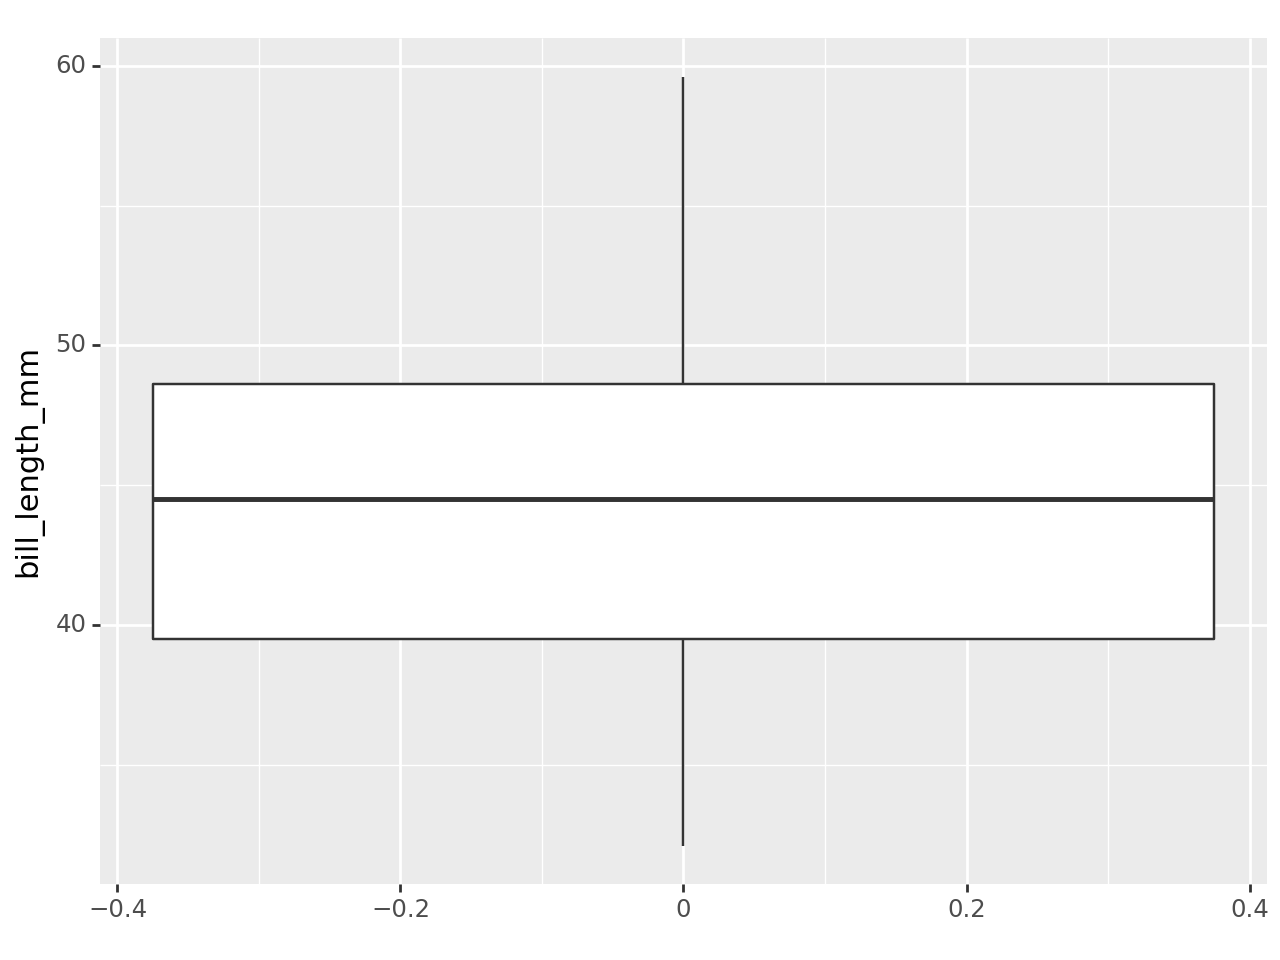

In [ ]:
# Click to see the plot below.

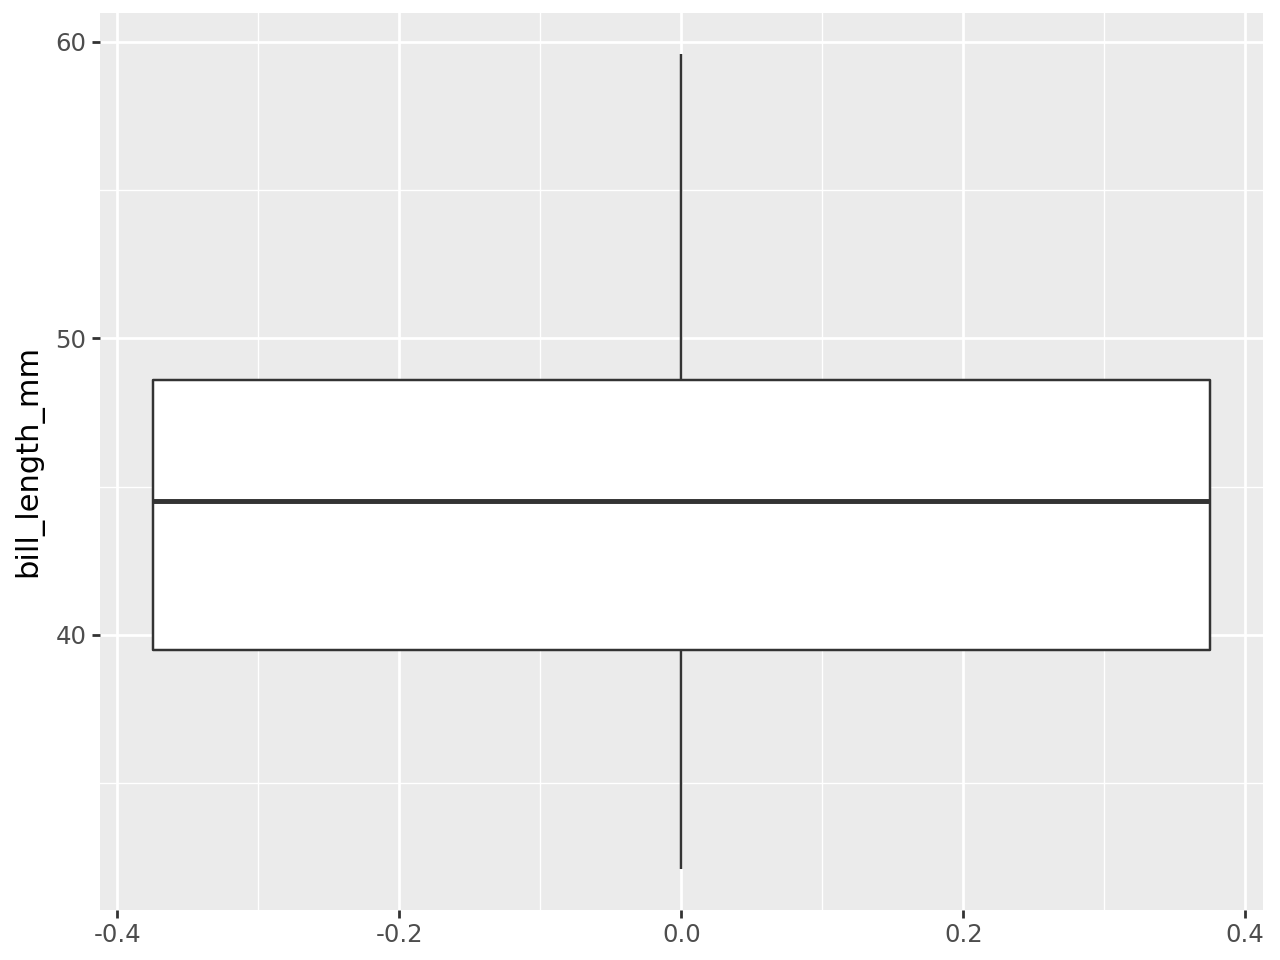

In [ ]:
g_bl_box = ggplot(data = penguins, mapping = aes(y = 'bill_length_mm')) + geom_boxplot()
g_bl_box

### Q1g: Violin plot
- Another way to visualize numerical variable is to use violin plot.
- Create a violin plot with boxplot inside for `bill_length_mm`. Set the boxplot width to 0.25.

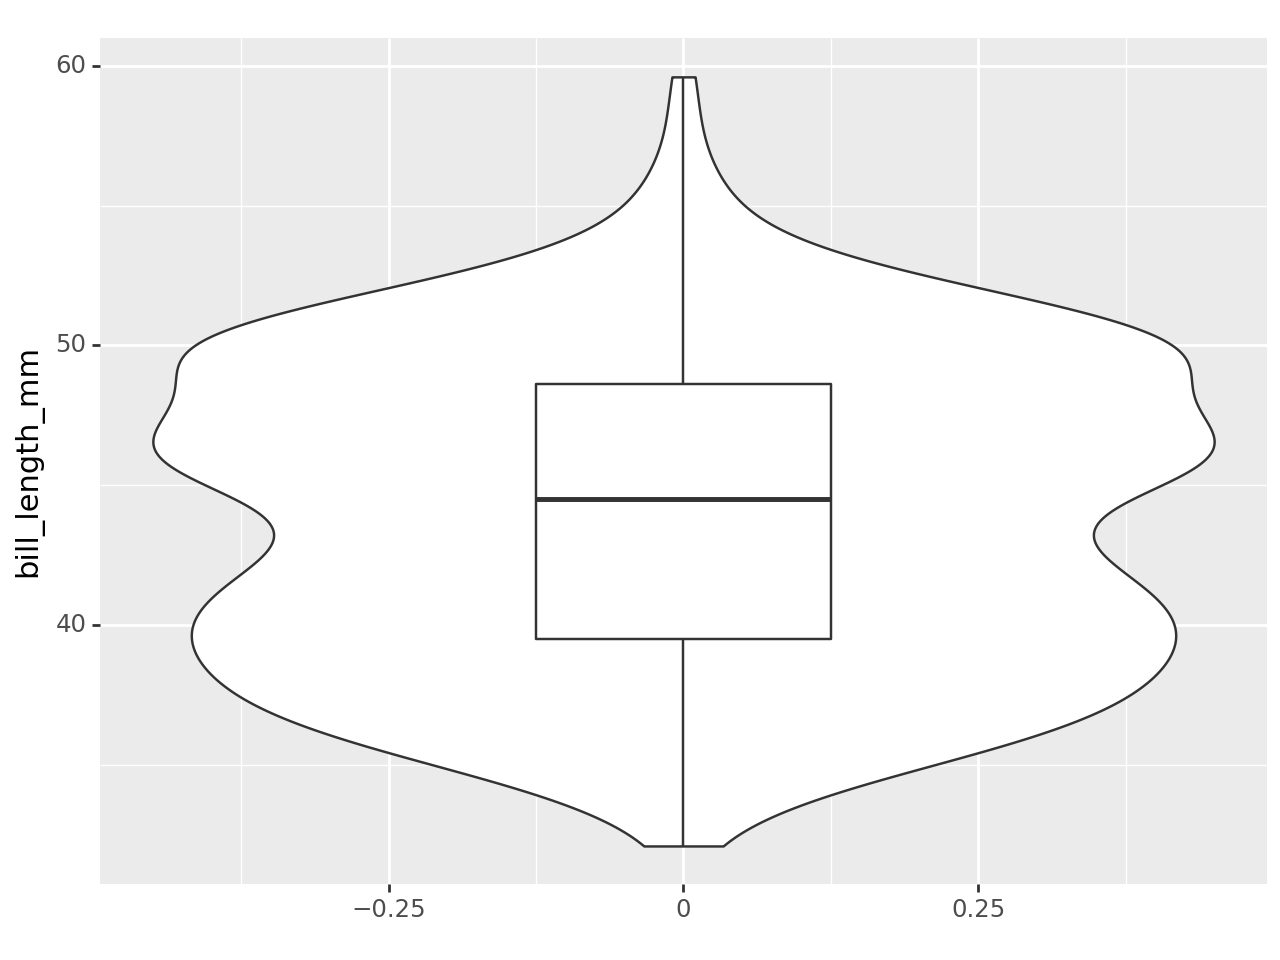

In [ ]:
# Click to see the plot below.

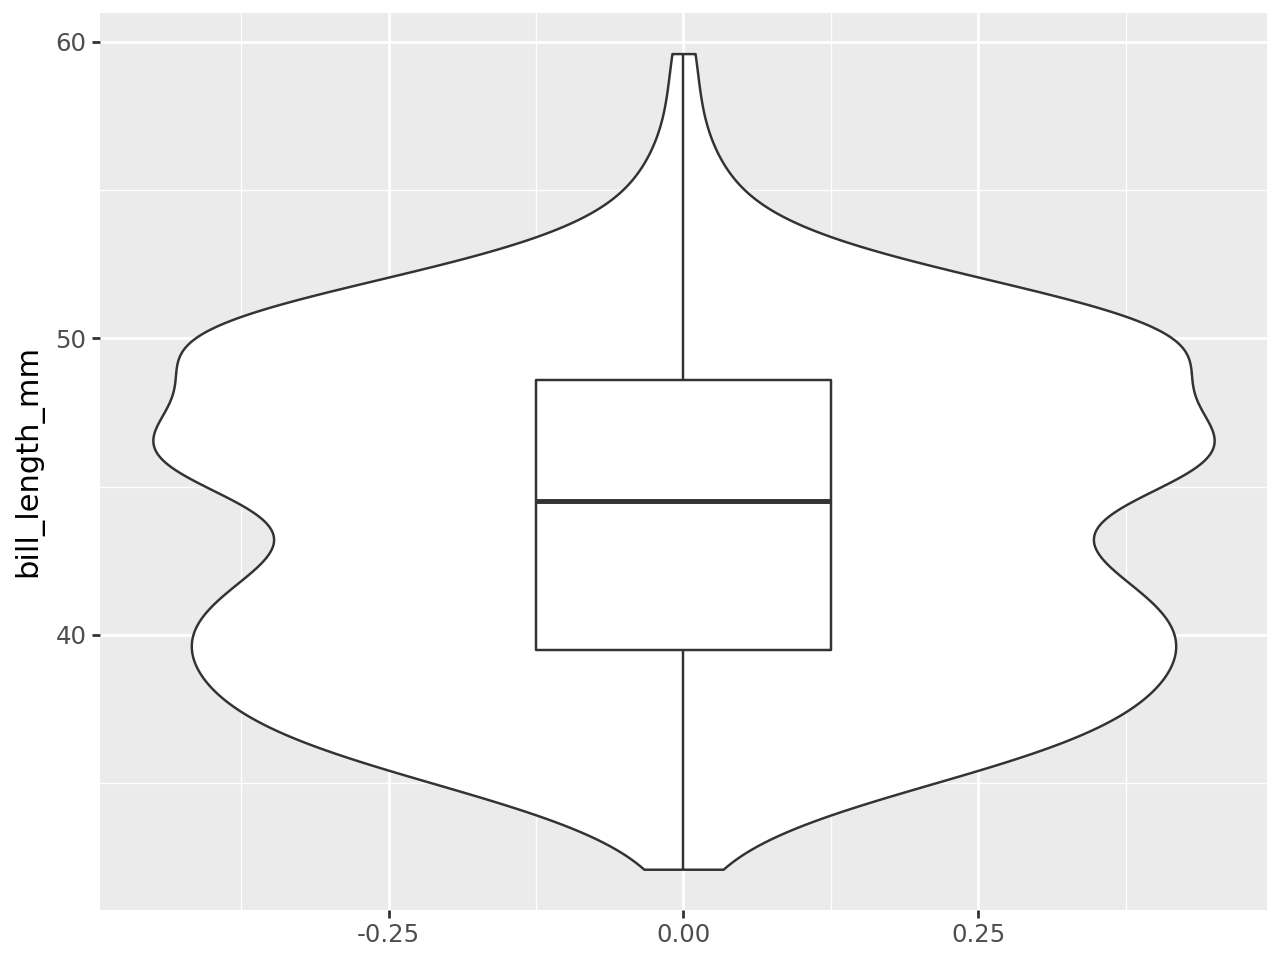

In [ ]:
g_bl_violin =(
  ggplot(data = penguins, mapping = aes(y = 'bill_length_mm')) +
  geom_violin() +
  geom_boxplot(width = 0.25)  # reduce the width of boxplot
)
g_bl_violin

### Q1h: What plot for `year`?

- It's time for you to decide how to visualize `year` variable.
- Create a plot of your choice below for `year` variable.
- You may find this method useful, `.astyp('category')` (See [documentation](https://pandas.pydata.org/docs/user_guide/categorical.html#dataframe-creation))

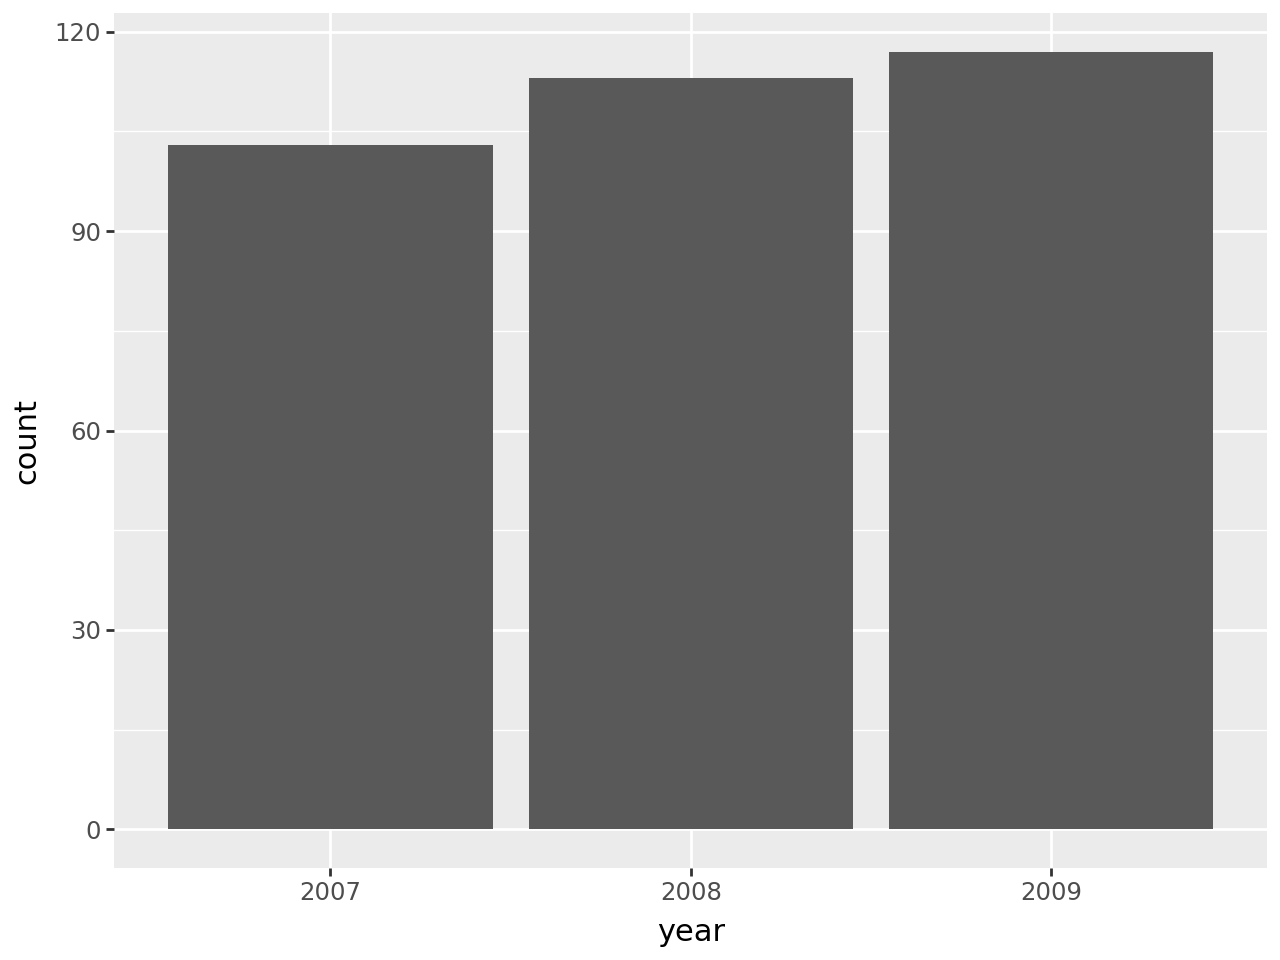

In [ ]:
new_pg = penguins.copy()
new_pg["year"] = new_pg["year"].astype("category")
ggplot(data = new_pg, mapping = aes(x = 'year')) + geom_bar()

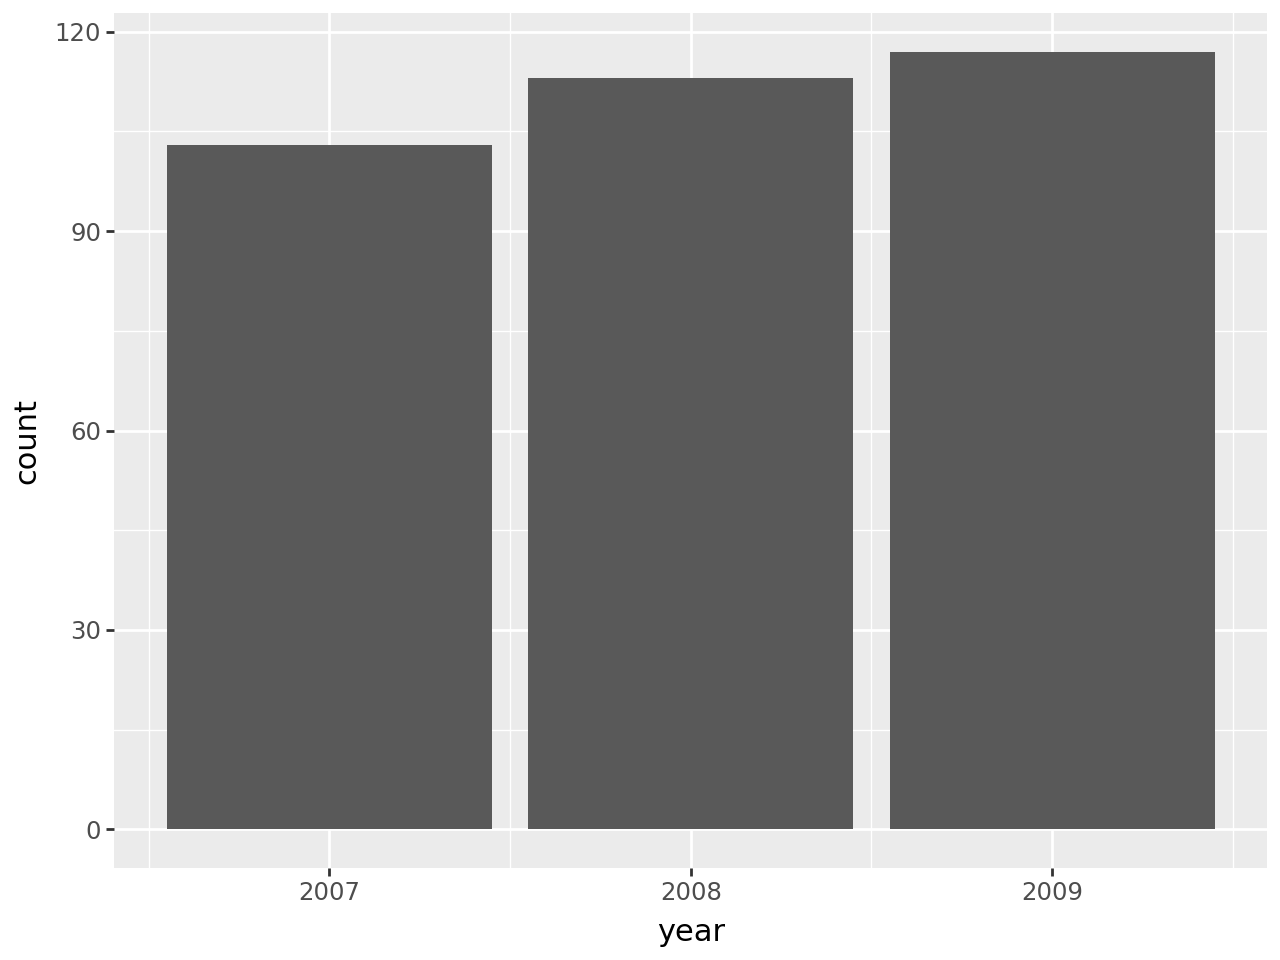

In [ ]:
ggplot(data = penguins, mapping = aes(x = 'year')) + geom_bar()

<br>

---

### Pairs of Variables

<br>

Now we will look at pairs of variables. There are many pairs so we will only look at a few of them. Which pairs to look at typically decides by the questions that you want to answer.

- First, let's check the data again

In [ ]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007

#### Q2a: Species and bill length with histogram

- Let's start by looking through the difference between bill length (`bill_length_mm`) across species (`species`).
- Bill length is a numerical variable and species is a categorical variable.
- For this question, we will create a histogram where the color (fill) is based on species.
- Set the bin to 25.

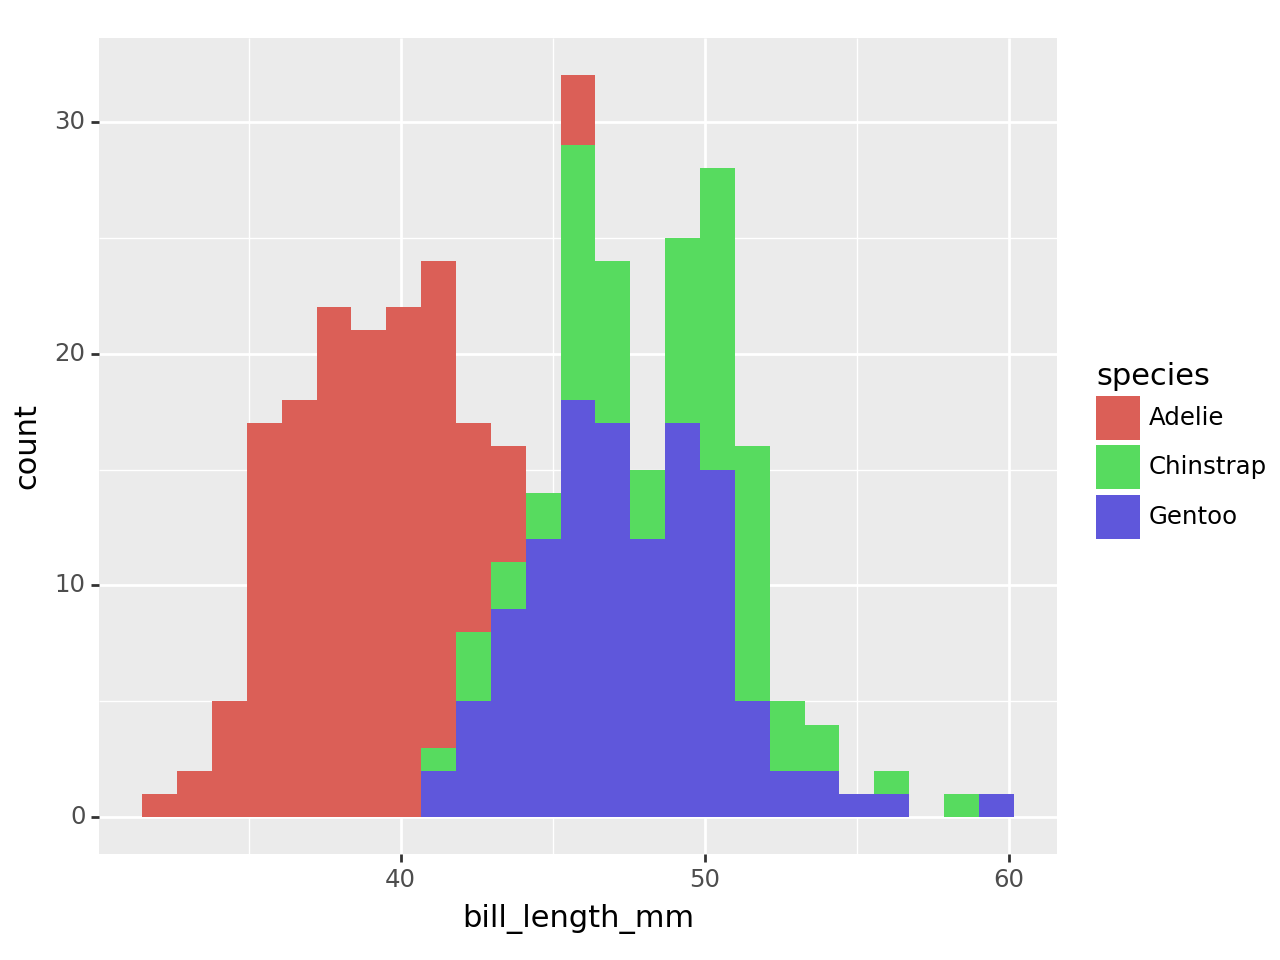

In [ ]:
# Click to see the plot below.

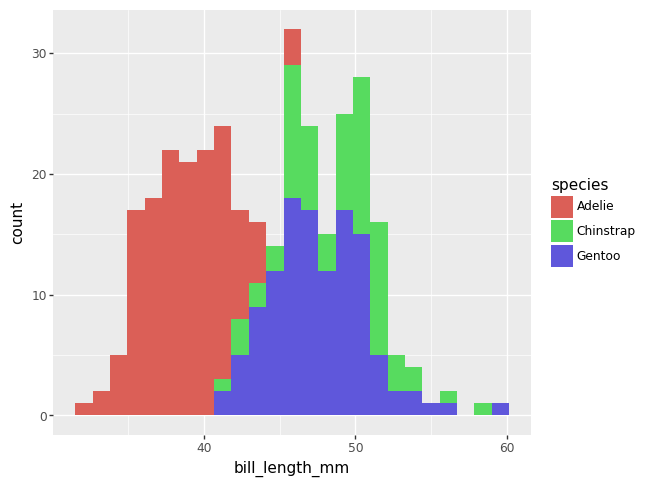

In [ ]:
g_species_bill_len = (
    ggplot(data = penguins, mapping = aes(x = "bill_length_mm", fill = "species"))  + geom_histogram(bins=25)
)
g_species_bill_len

#### Q2b: Species x bill length - Density

- What do you think about the previous graph? It can be quite hard to read.
- Let's try to plot it using only density (`geom_density`)
- Set alpha to 0.25.
- Recall that the area under the density curve has to sum to 1.

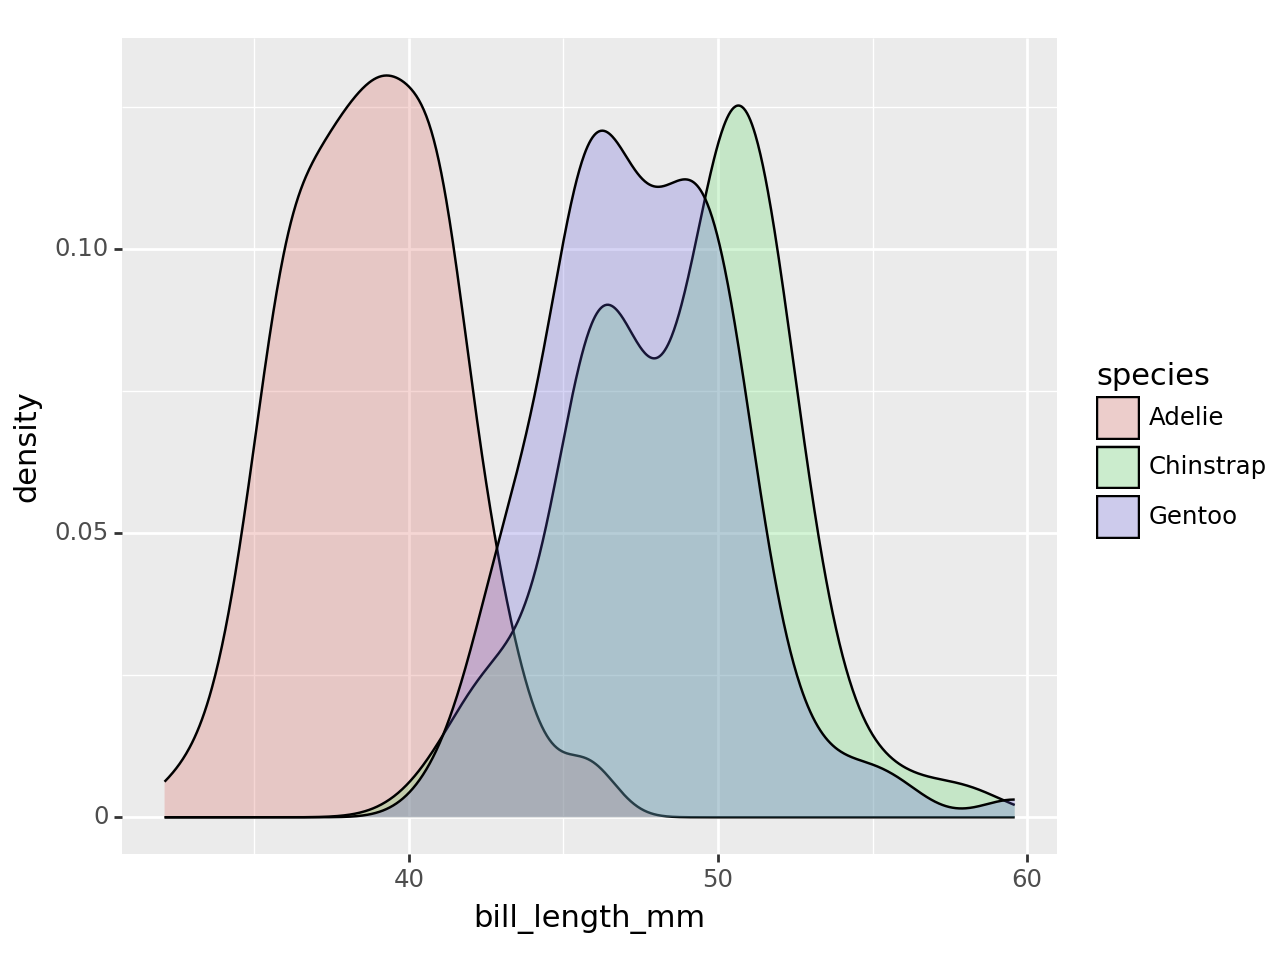

In [ ]:
# Click to see the plot below.

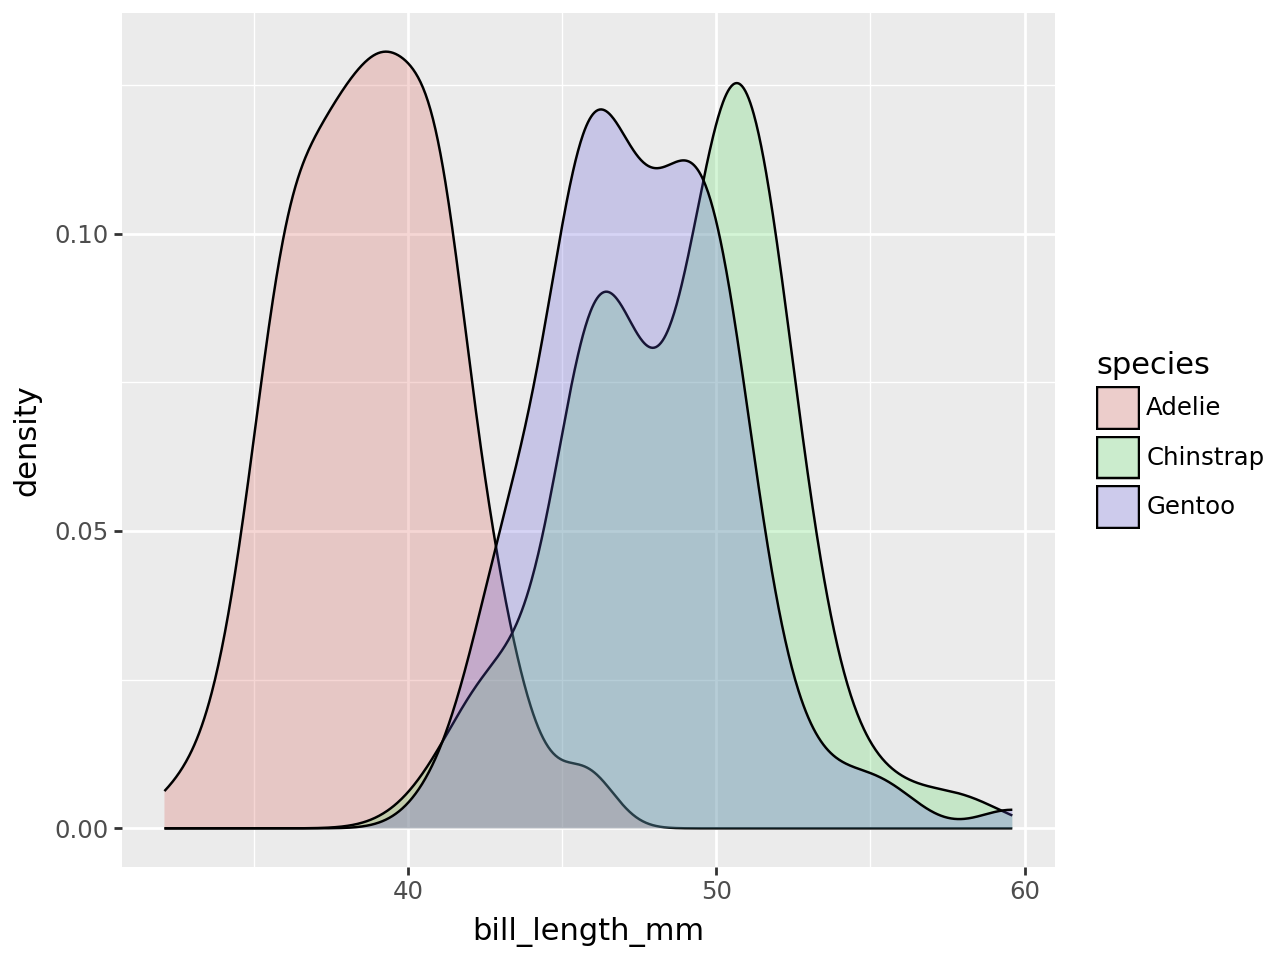

In [ ]:
g_spec_bill_len_hist = (
    ggplot(data = penguins, mapping = aes(x = "bill_length_mm", fill = "species"))  + geom_density(alpha=0.25)
)
g_spec_bill_len_hist

#### Q2c: Species x bill length - Boxplot

- Another way to visualize this is to use box plot/violin plot.
- We will simply use boxplot here but violin plot on top work too.
- Plot the boxplot where x-axis is `species`, y-axis is `bill_length_mm`, and fill = `species`.
- Boxplots allow us to quickly compare the median and the spread of the data.

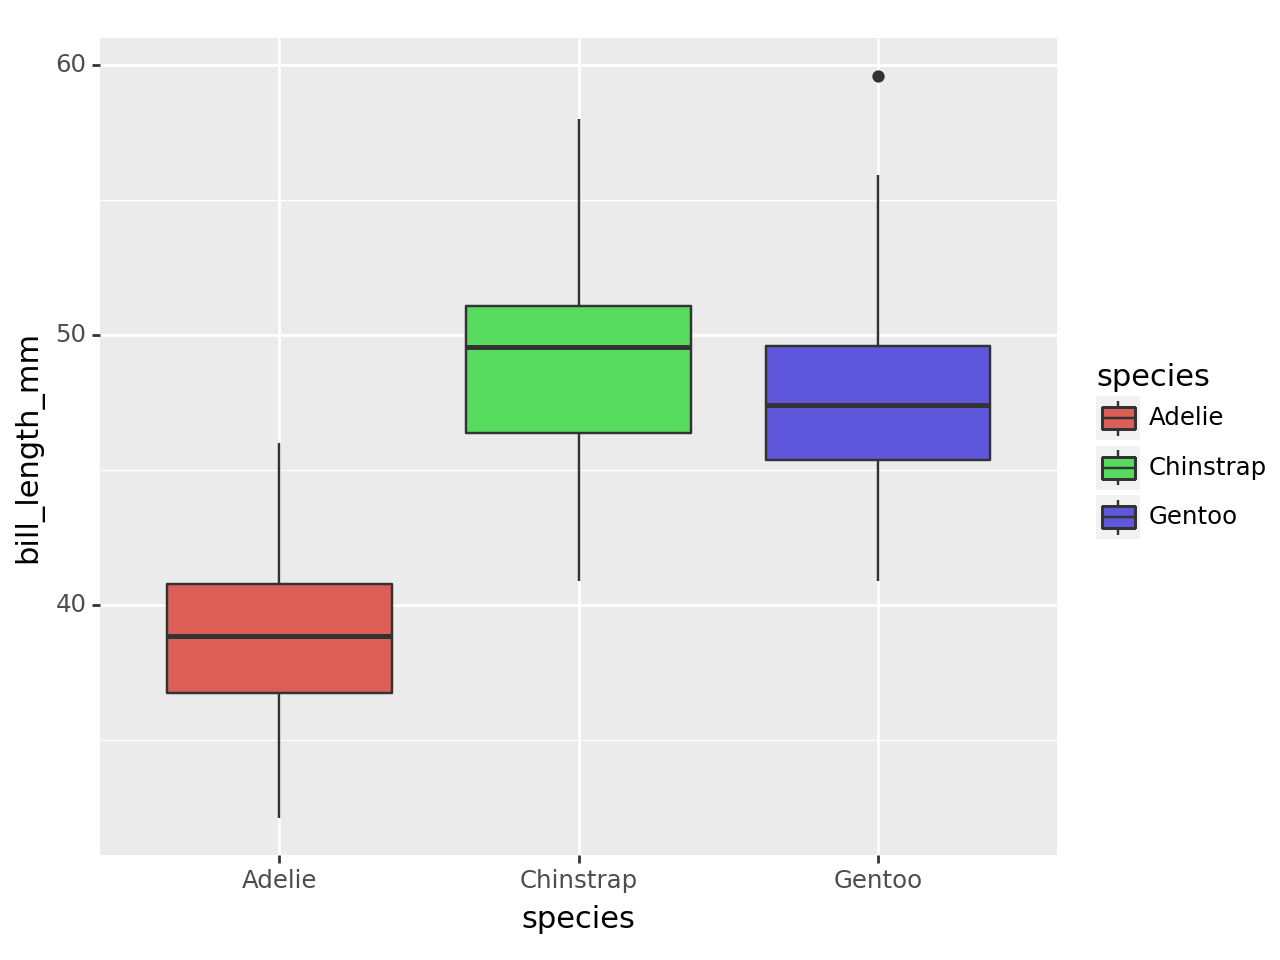

In [ ]:
# Click to see the plot below.

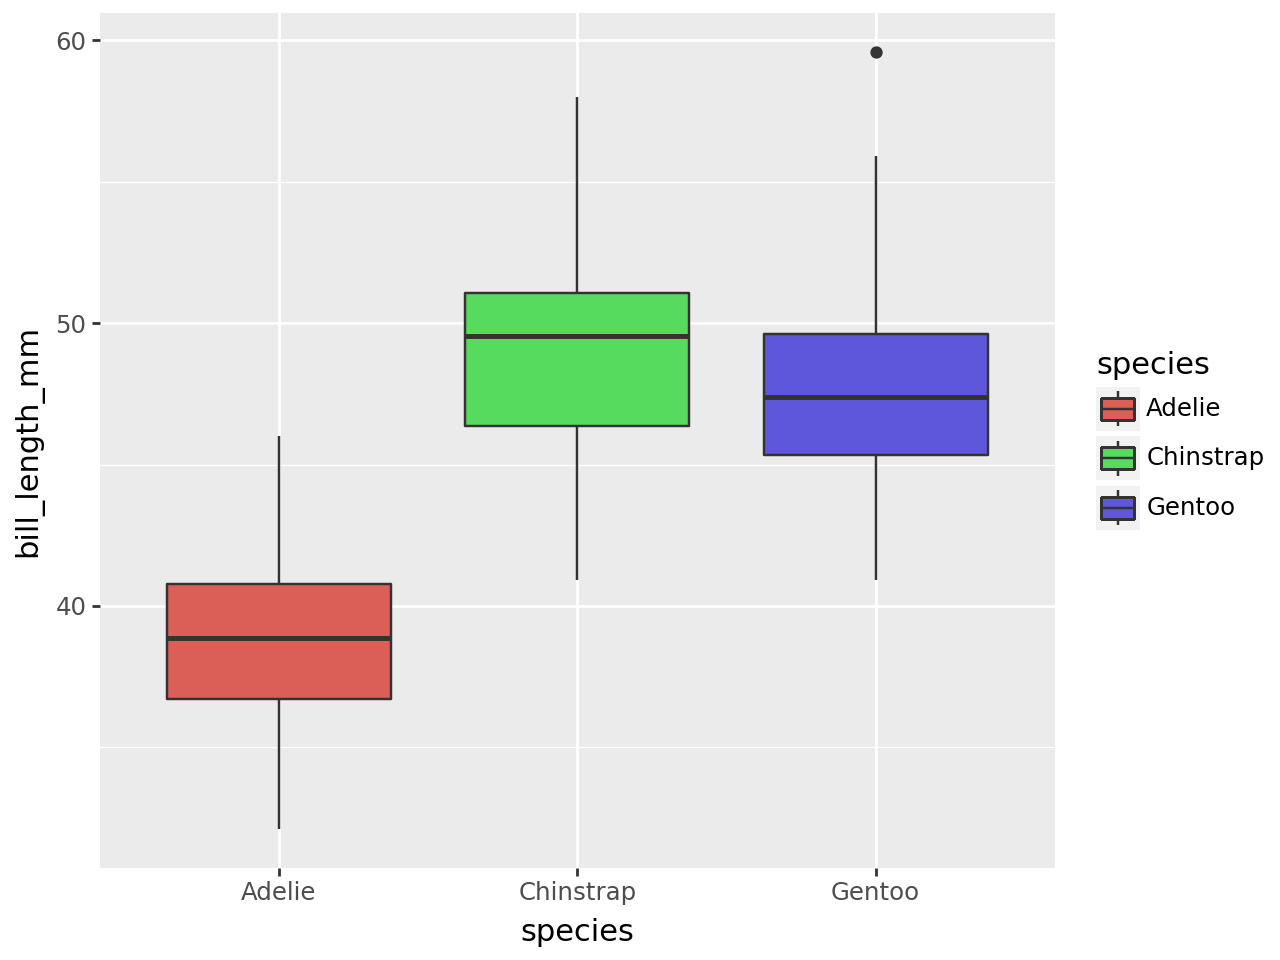

In [ ]:
g_spec_bill_len_bx = (
    ggplot(data = penguins, mapping = aes(x="species", y = "bill_length_mm", fill = "species"))  + geom_boxplot()
)
g_spec_bill_len_bx

#### Q2d: Species x Sex x Bill length
- In this question, we will try to go beyond two variables.
- Instead of setting `fill` with `species`, we will set `fill` with `sex` instead.
- Create the boxplot with `y` = `bill_length_mm`, `x` = `species`, and `fill` = `sex`.
- What do you think about the plot? What did you notice first? What can you compare quickly?

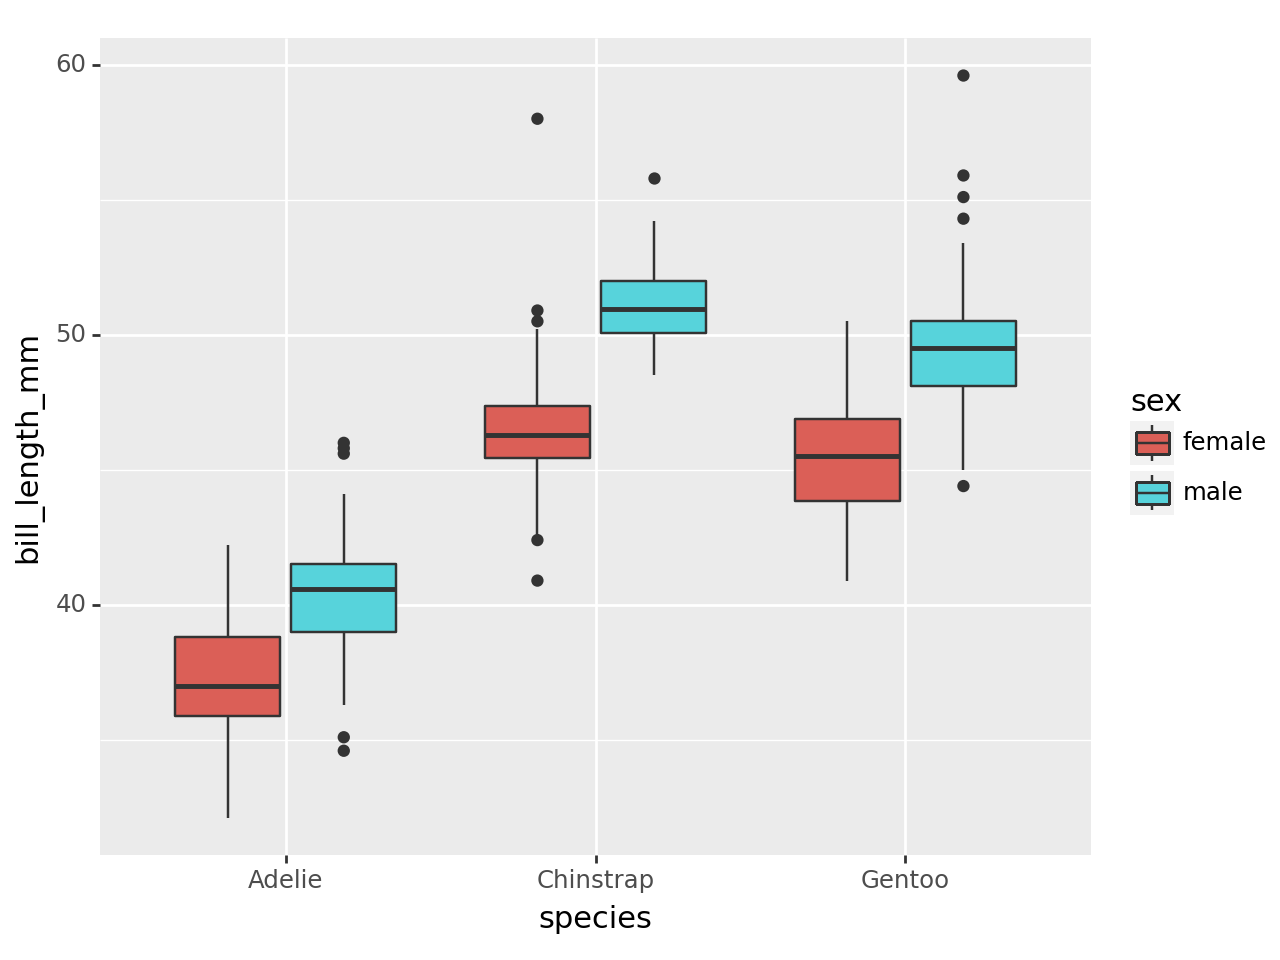

In [ ]:
# Click to see the plot below.

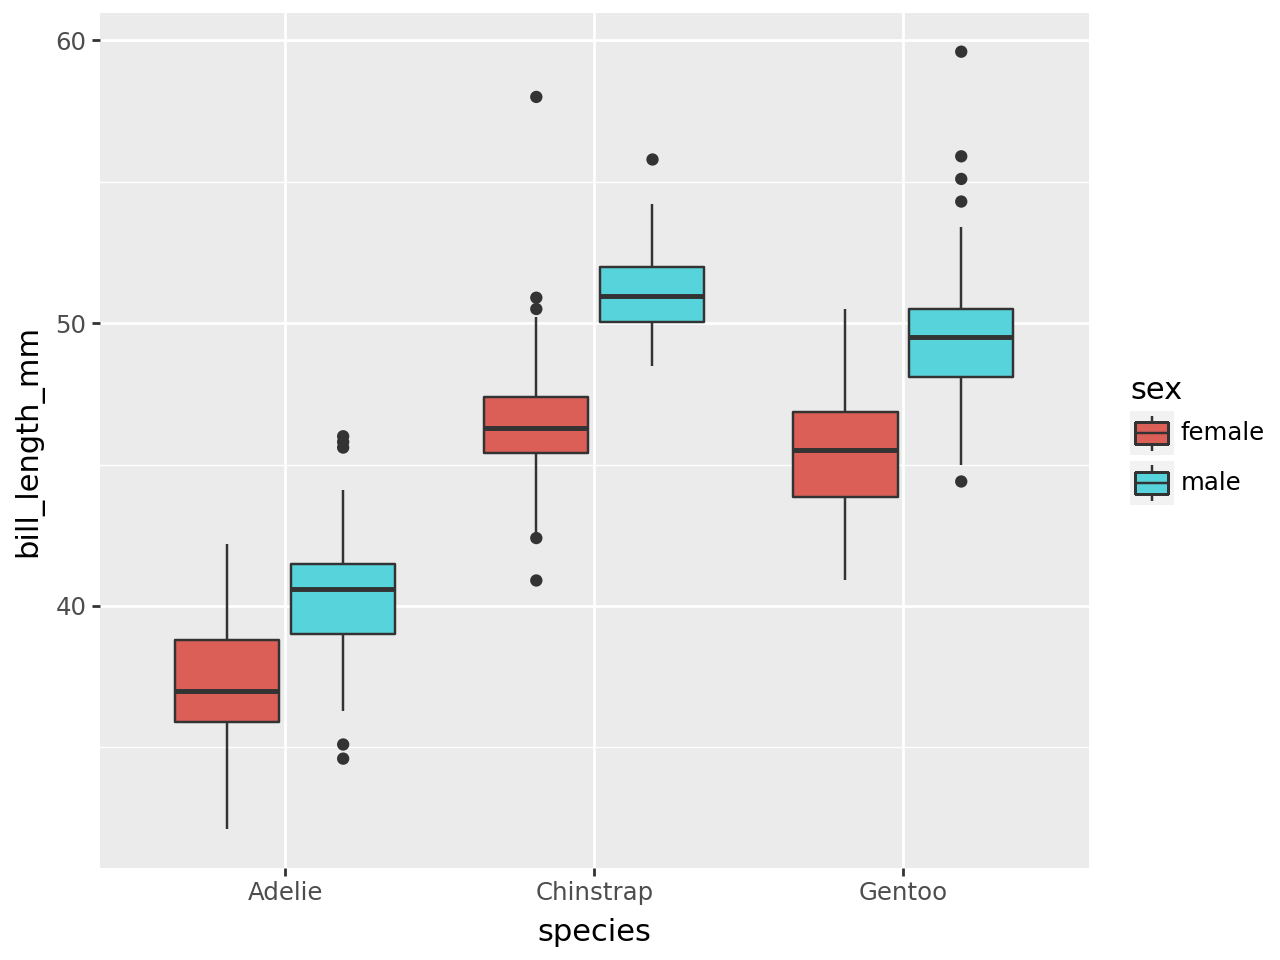

In [ ]:
g_spec_bill_len_sex = (
    ggplot(data = penguins, mapping = aes(x="species", y = "bill_length_mm", fill = "sex"))  + geom_boxplot()
)

<br>

---

#### Q3a: bill length and bill depth - Scatter plot

- Next we will look at bill length (`bill_length_mm`) and bill depth (`bill_depth_mm`).
- Both are numerical varaibles so we will use scatter plot.
- Set the x-axis to bill length and y-axis to bill depth.

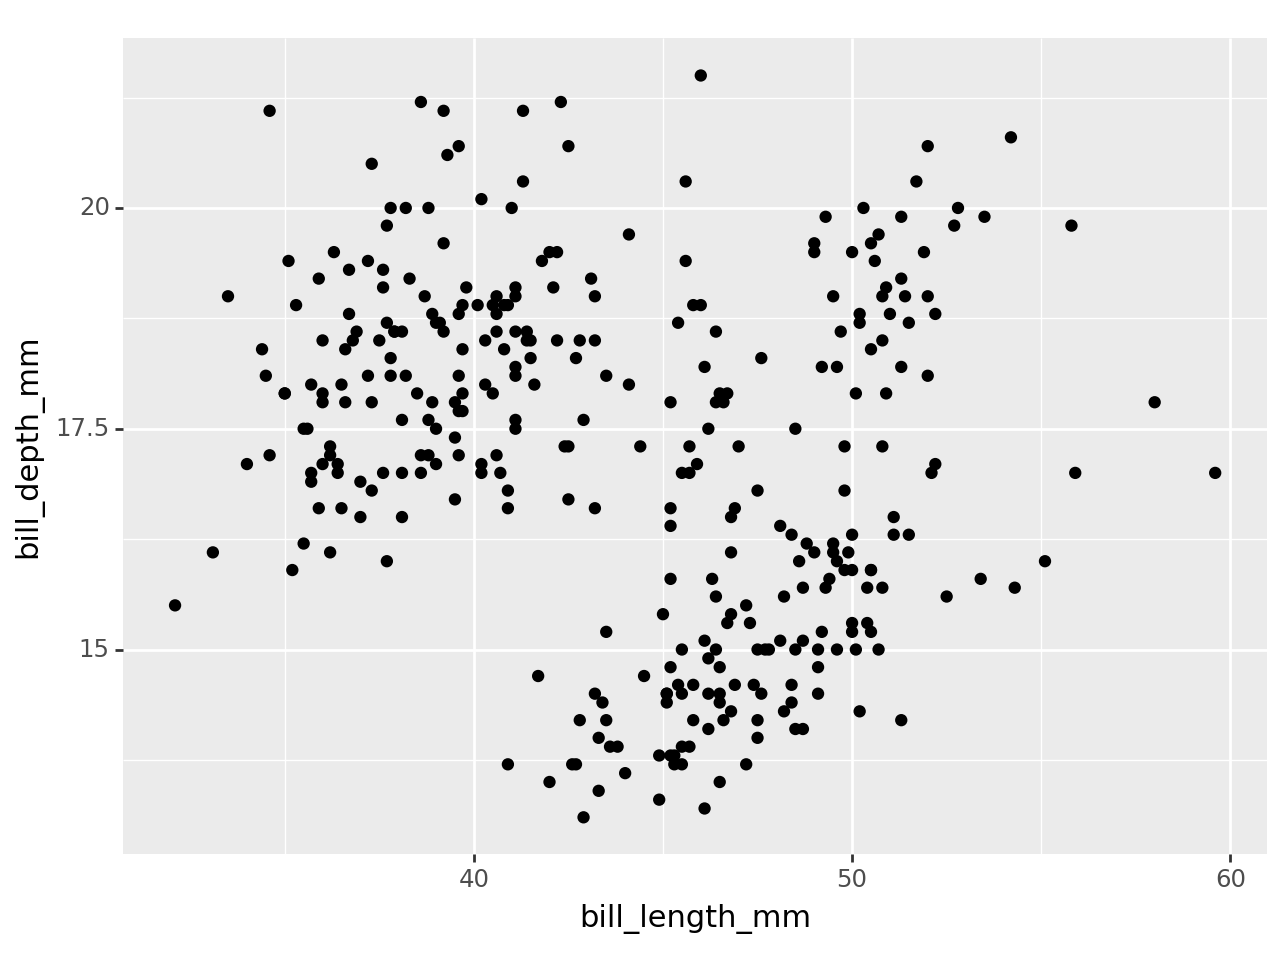

In [ ]:
# Click to see the plot below.

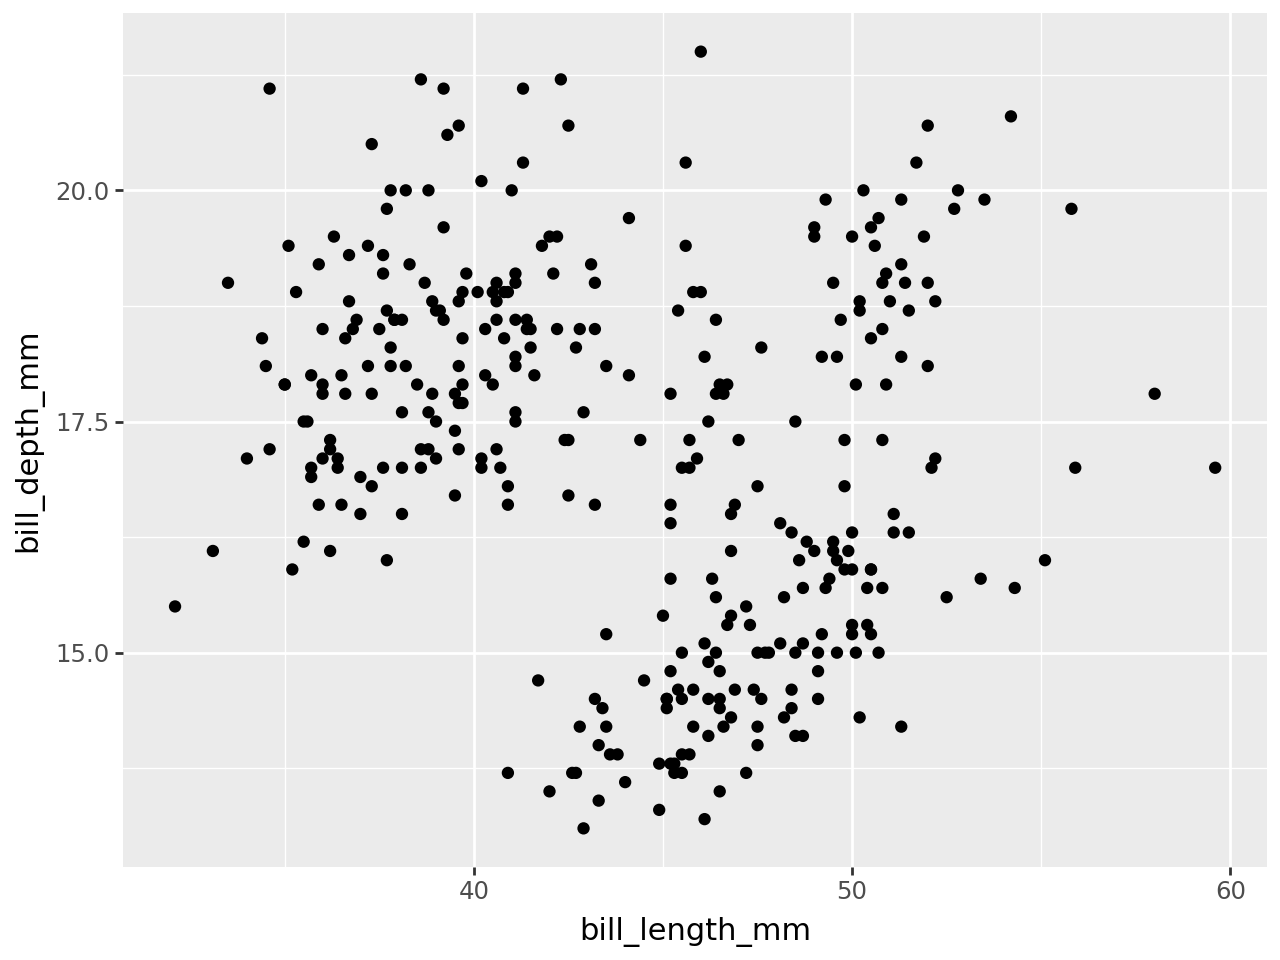

In [ ]:
g_bill_len_depth = (
  ggplot(data = penguins, mapping = aes(x = "bill_length_mm", y = "bill_depth_mm")) +
  geom_point()
)
g_bill_len_depth

#### Q3b: bill length, bill depth, and species
- The previous plot does not seem to reveal any clear relationship between length and depth.
- Next, we will saparate the data based on `species`
- Create a scatter between bill length and bill depth and then color each data point based on species.

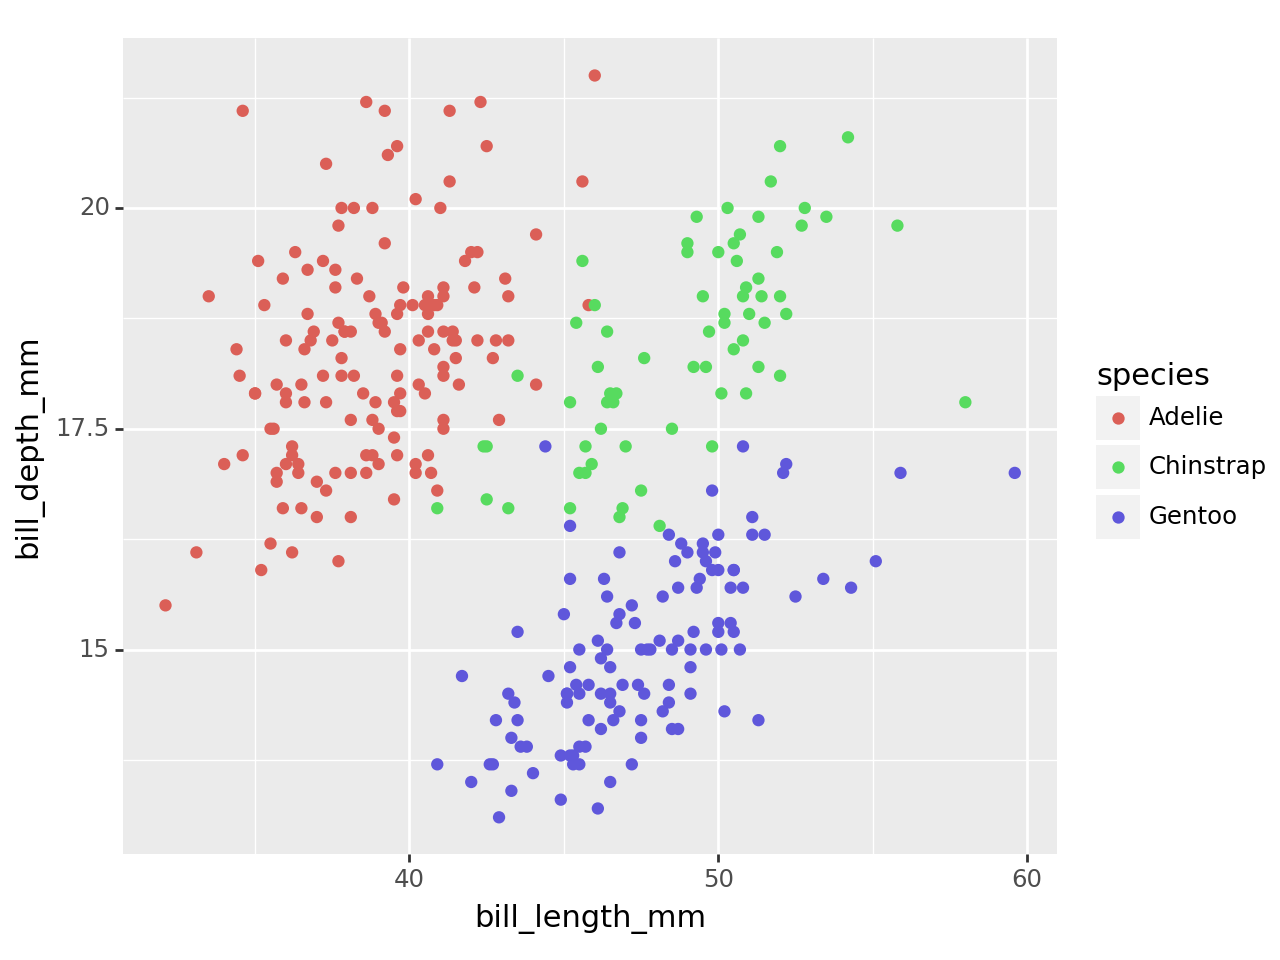

In [ ]:
# Click to see the plot below.

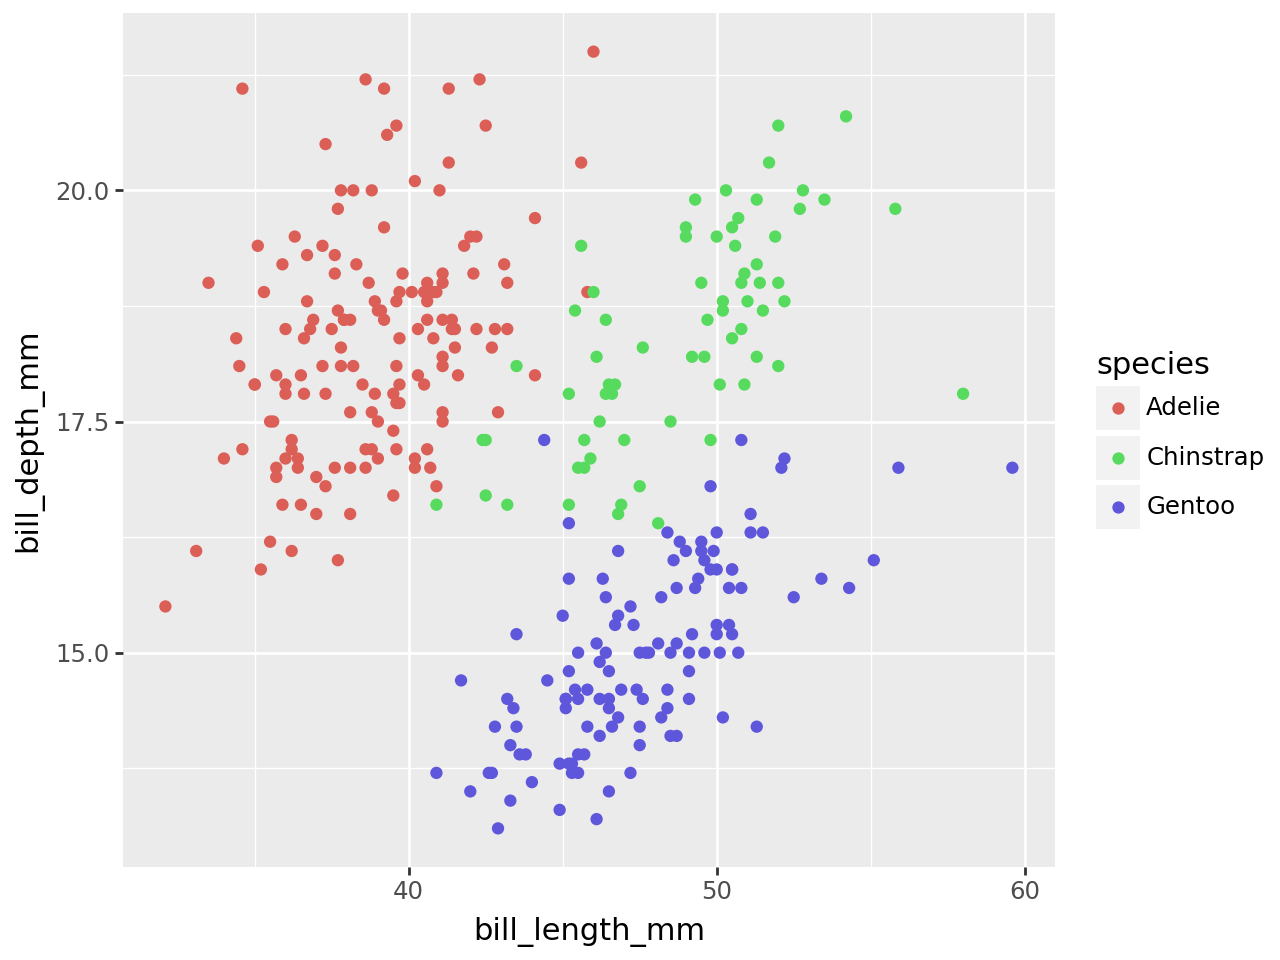

In [ ]:
g_bill_len_depth = (
  ggplot(data = penguins, mapping = aes(x = "bill_length_mm", y = "bill_depth_mm", color="species")) +
  geom_point()
)
g_bill_len_depth

#### Q3c: Adding lines
- It seems like once we break it down by species, there seem to be some relationship between bill depth and bill length.
- Continue from the previous graph, add `geom_smooth(method = 'lm')` to the graph.
- What did you see? We will learn more about these lines in the second half.

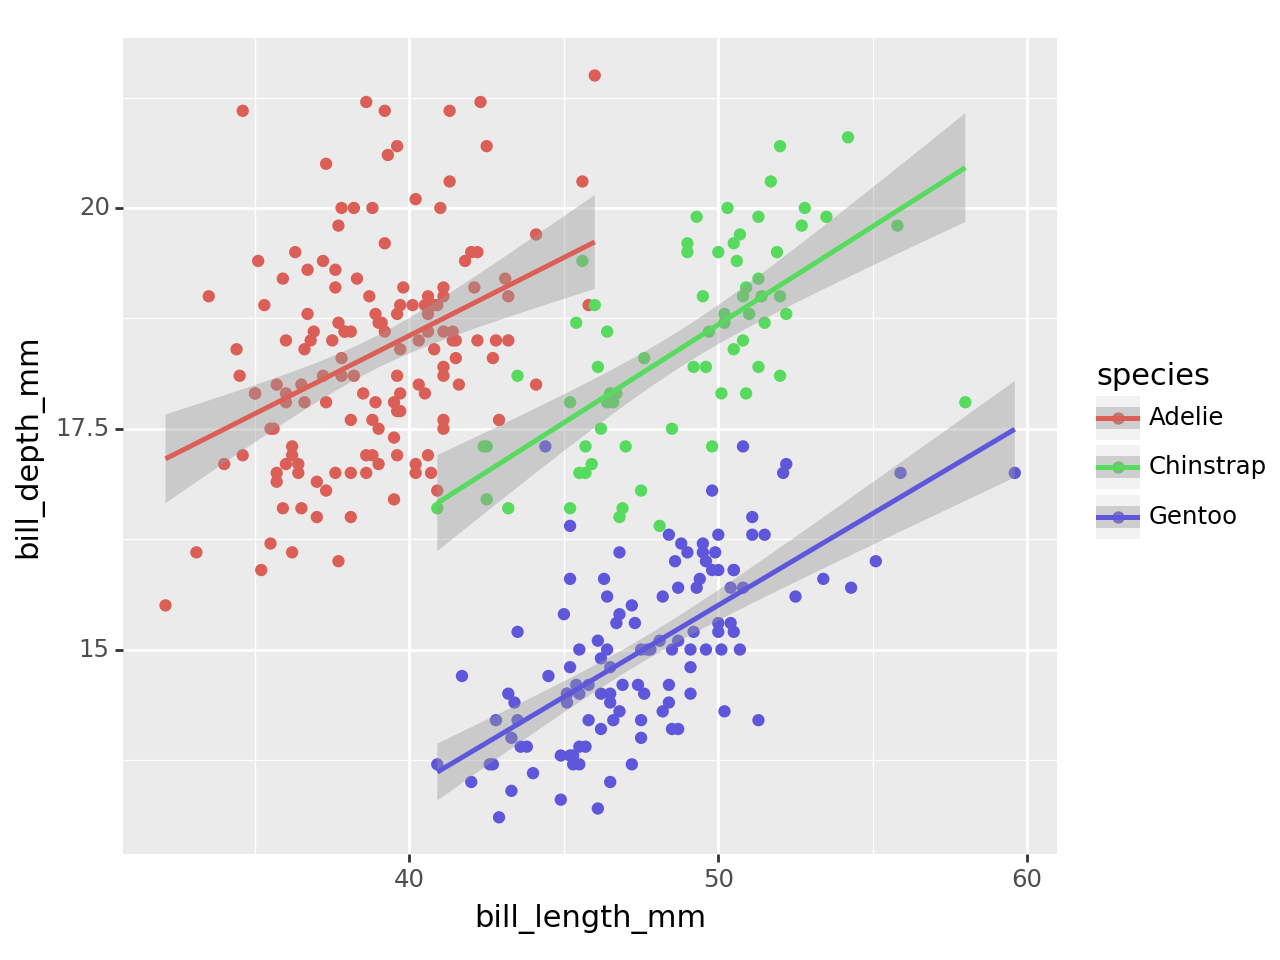

In [ ]:
# Click to see the plot below.

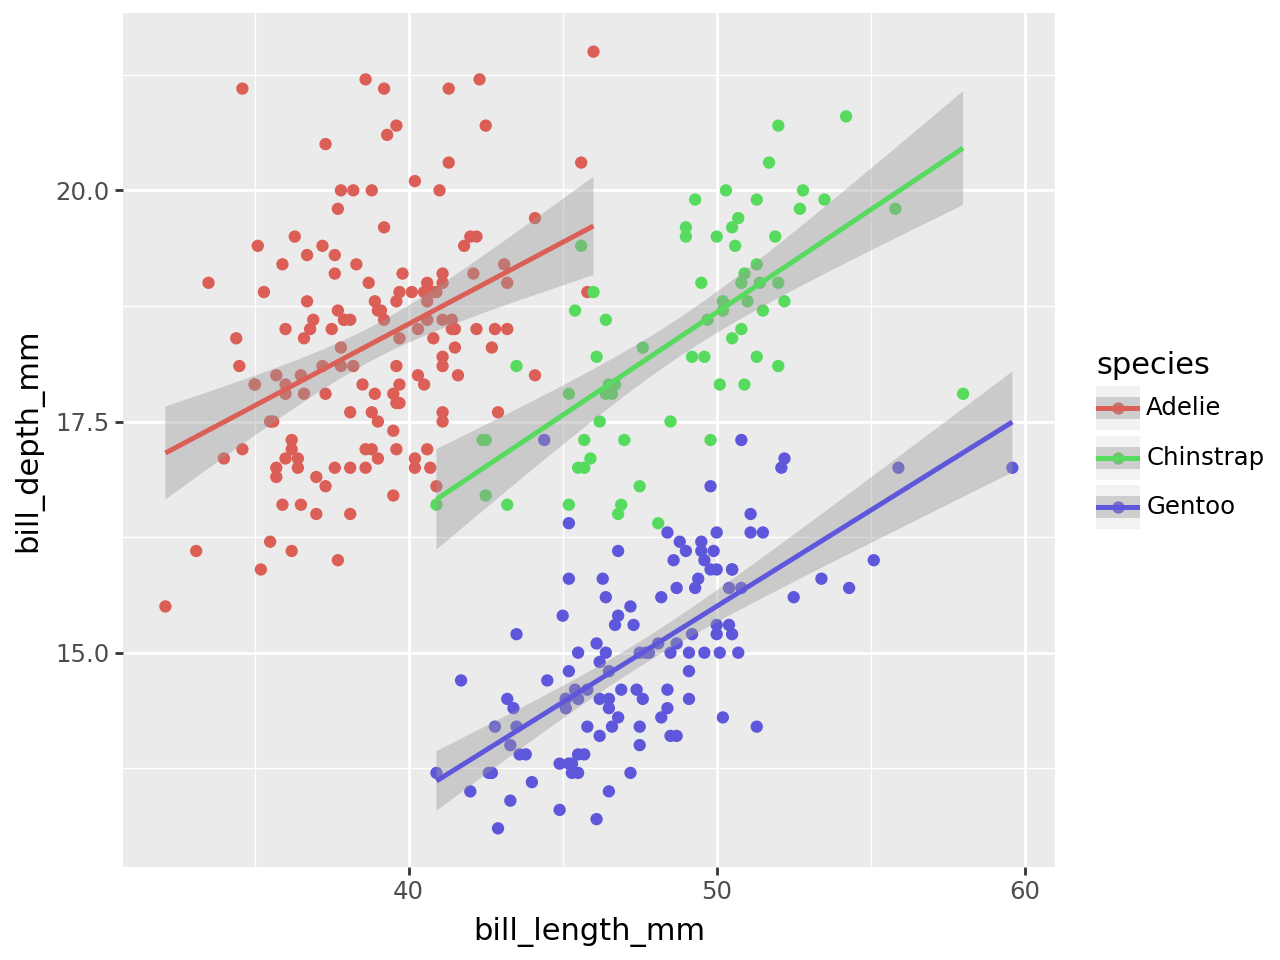

In [ ]:
g_bill_len_depth = (
  ggplot(data = penguins, mapping = aes(x = "bill_length_mm", y = "bill_depth_mm", color="species")) +
  geom_point()+
  geom_smooth(method = 'lm')
)
g_bill_len_depth

#### Q3d: Updating color
- The default colors -- red, green, and blue -- can be quite problematic for color-blinded people. We will address them in this question.
- We will do two things:
  1. We will set the shape of point based on `species`. (`shape = 'species'`)
  2. We will update the color scheme using `scale_color_manual(values = color_list)`, where `color_list` is a list of colors (e.g., `['purple','blue','yellow']` or `['#6632a8','#32a8a8','#dde339']`). Feel free to come up with your own colors too but make sure it's suitable for color-blinded people.

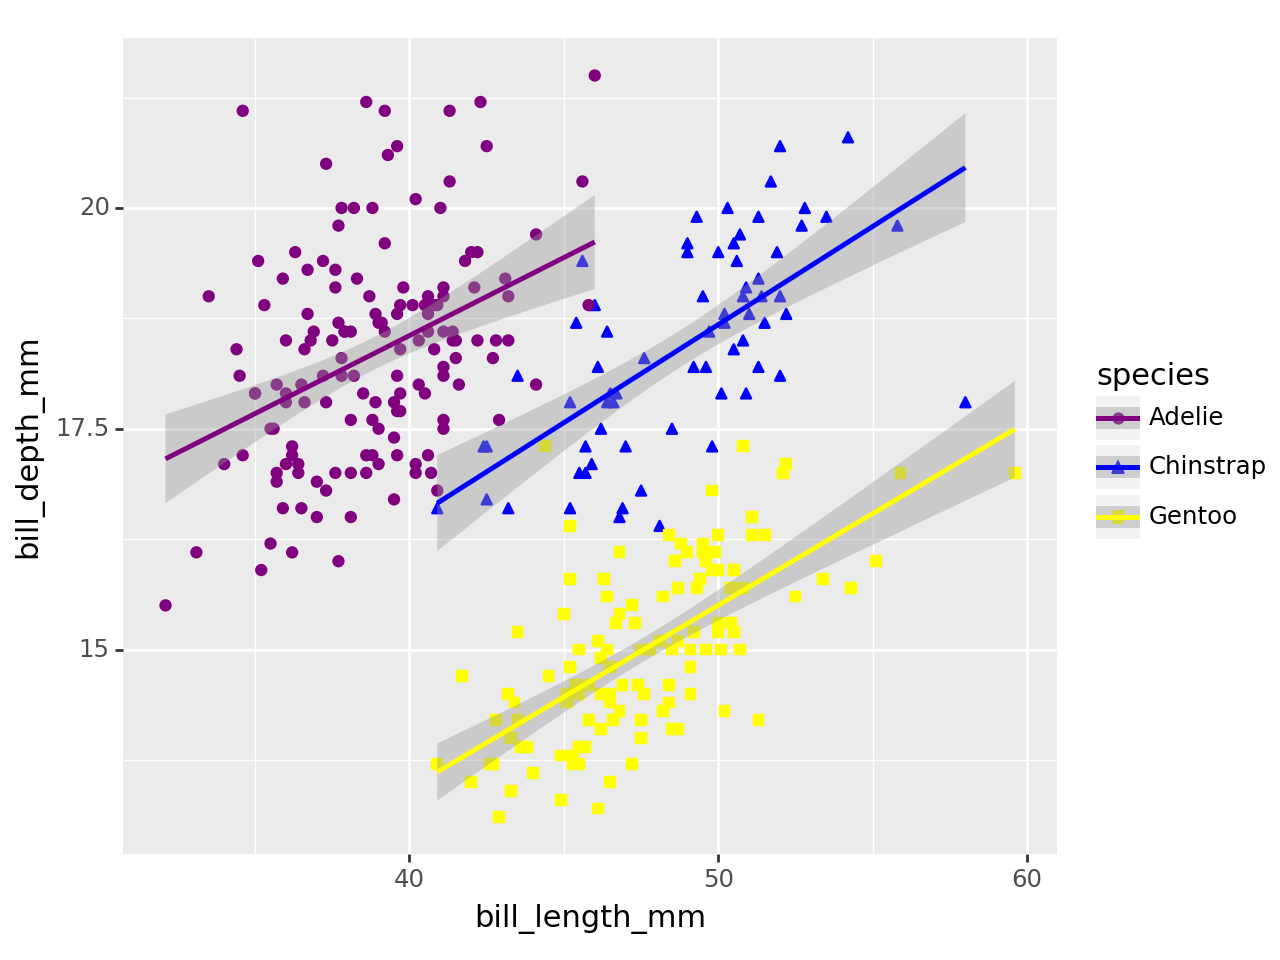

In [ ]:
# Click to see the plot below.

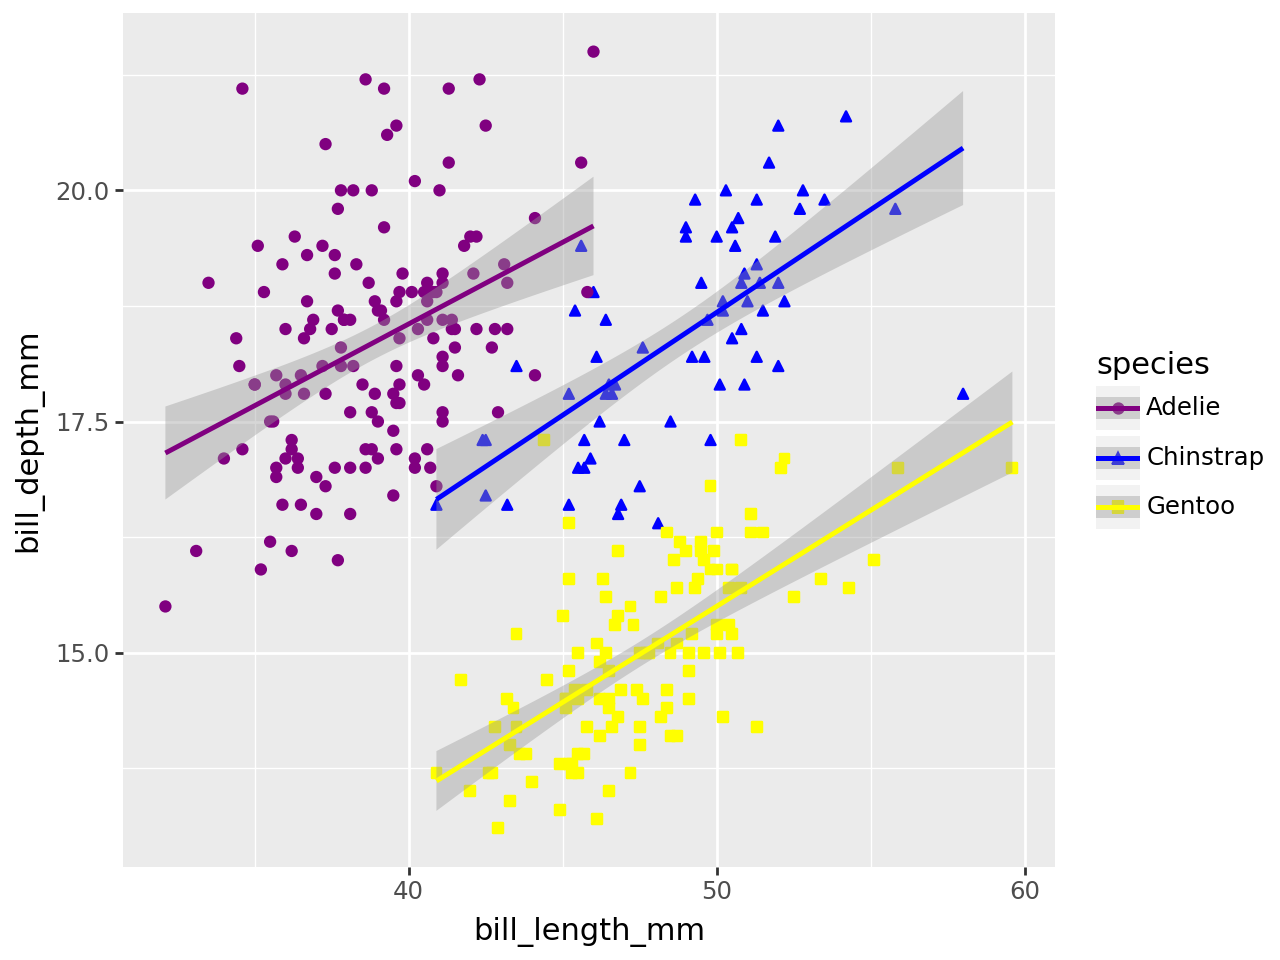

In [ ]:
color_list = ['purple','blue','yellow']
g_bill_len_depth = (
  ggplot(data = penguins, mapping = aes(x = "bill_length_mm", y = "bill_depth_mm", shape="species", color="species")) +
  geom_point()+
  geom_smooth(method = 'lm')+
  scale_color_manual(values = color_list)
)
g_bill_len_depth

#### Q3e: Adding legends and title
- Let's finish this graph of by adding a title using `ggtitle()` as shown below. [Documentation](https://plotnine.org/reference/ggtitle.html)

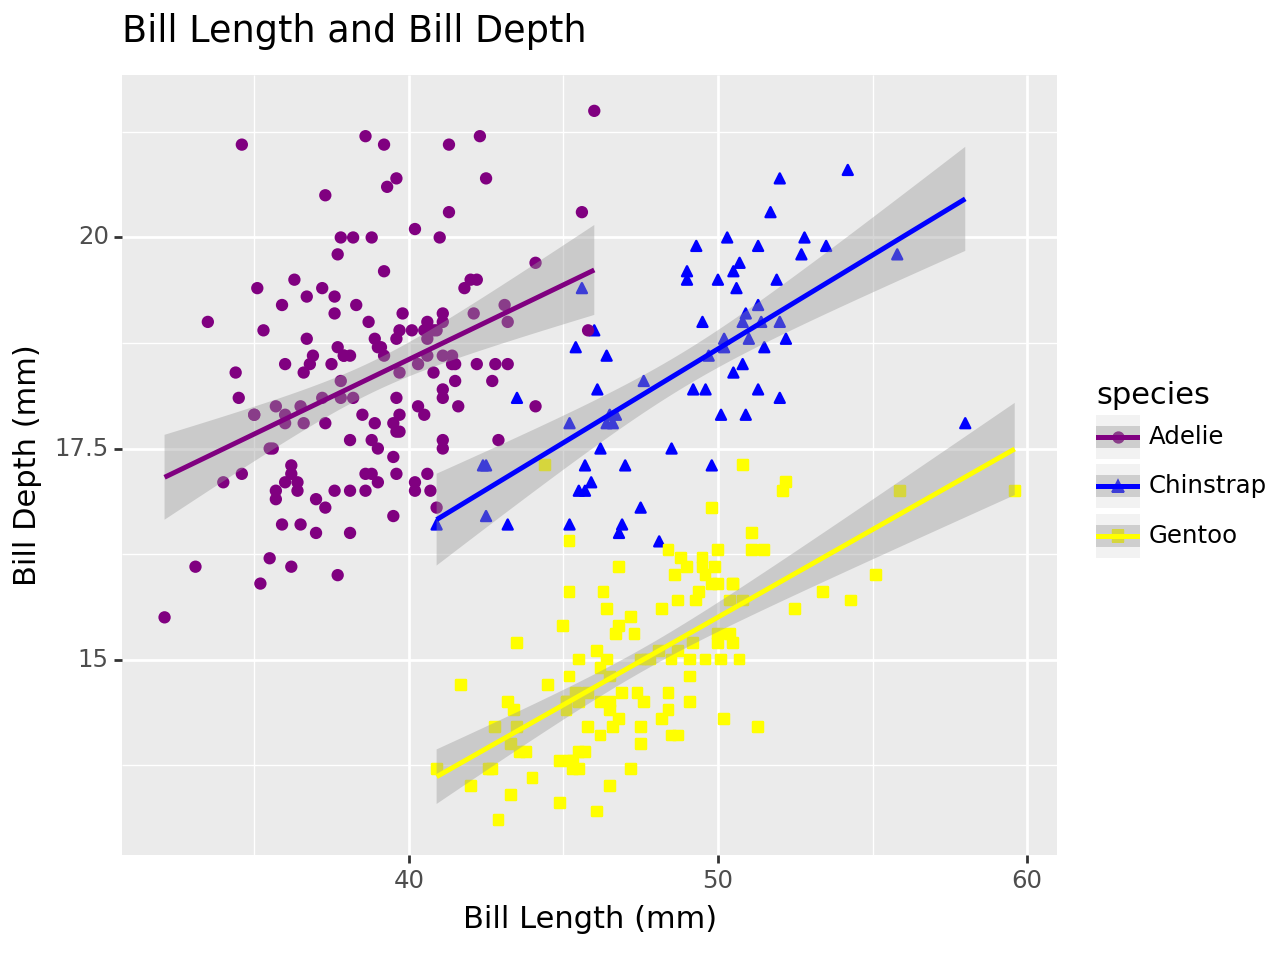

In [ ]:
# Click to see the plot below.

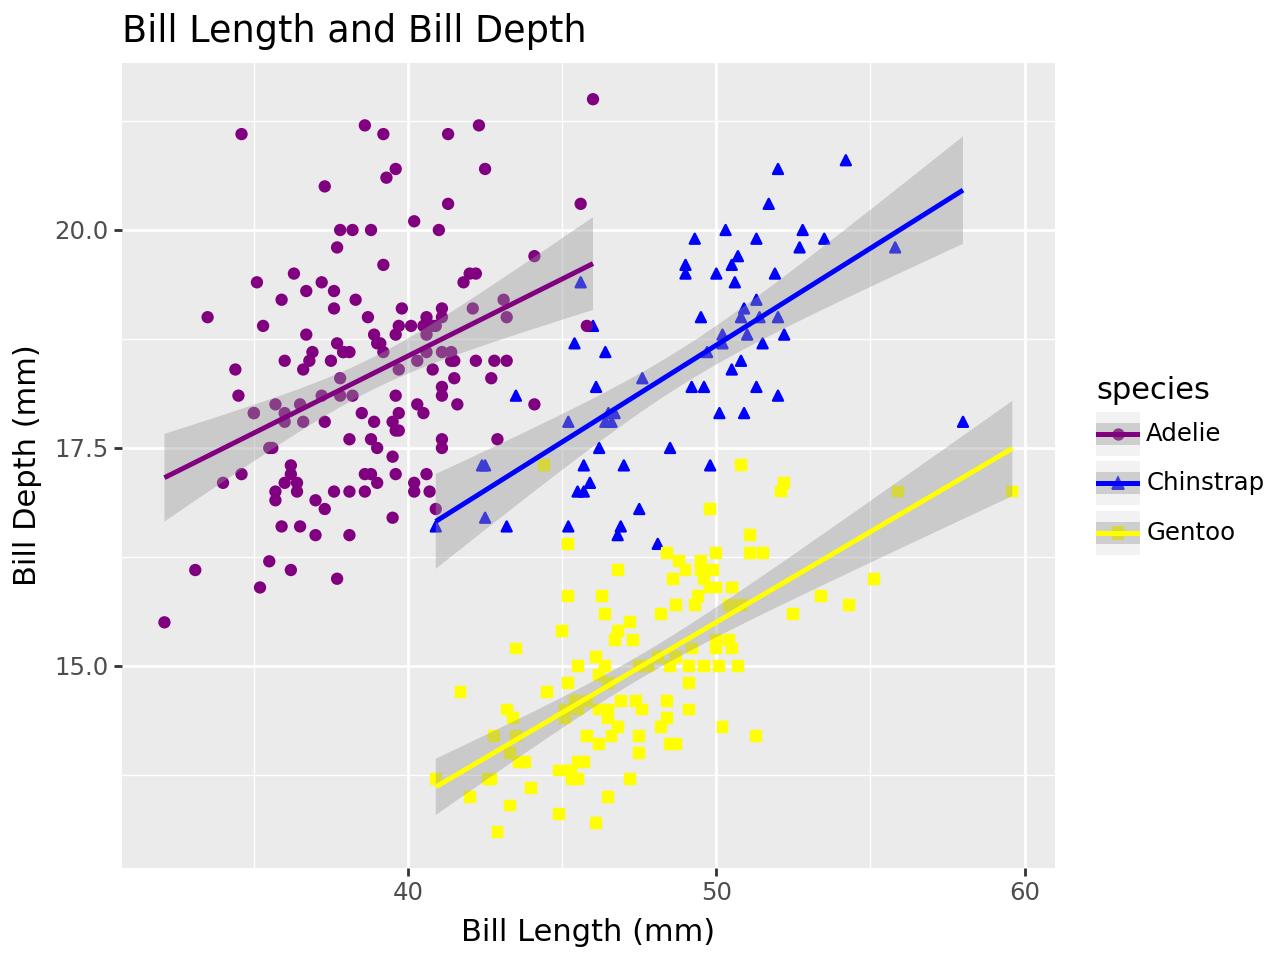

In [ ]:
color_list = ['purple','blue','yellow']
g_bill_len_depth = (
  ggplot(data = penguins, mapping = aes(x = "bill_length_mm", y = "bill_depth_mm", shape="species", color="species")) +
  geom_point()+
  geom_smooth(method = 'lm')+
  scale_color_manual(values = color_list)+
  ggtitle("Bill Length and Bill Depth")+
  xlab("Bill Length (mm)")+
  ylab("Bill Depth (mm)")+
  theme(plot_title=element_text(ha='left')) #No penalty if you missed this
)
g_bill_len_depth


<br>

---

#### Q4a: Species x Island
- We now move on to another pair: `species` x `island`.
- Both are categorical variabes.
- We will start by ploting them using a barplot.
- Create a barplot where x-axis is `species` and fill is `island`.

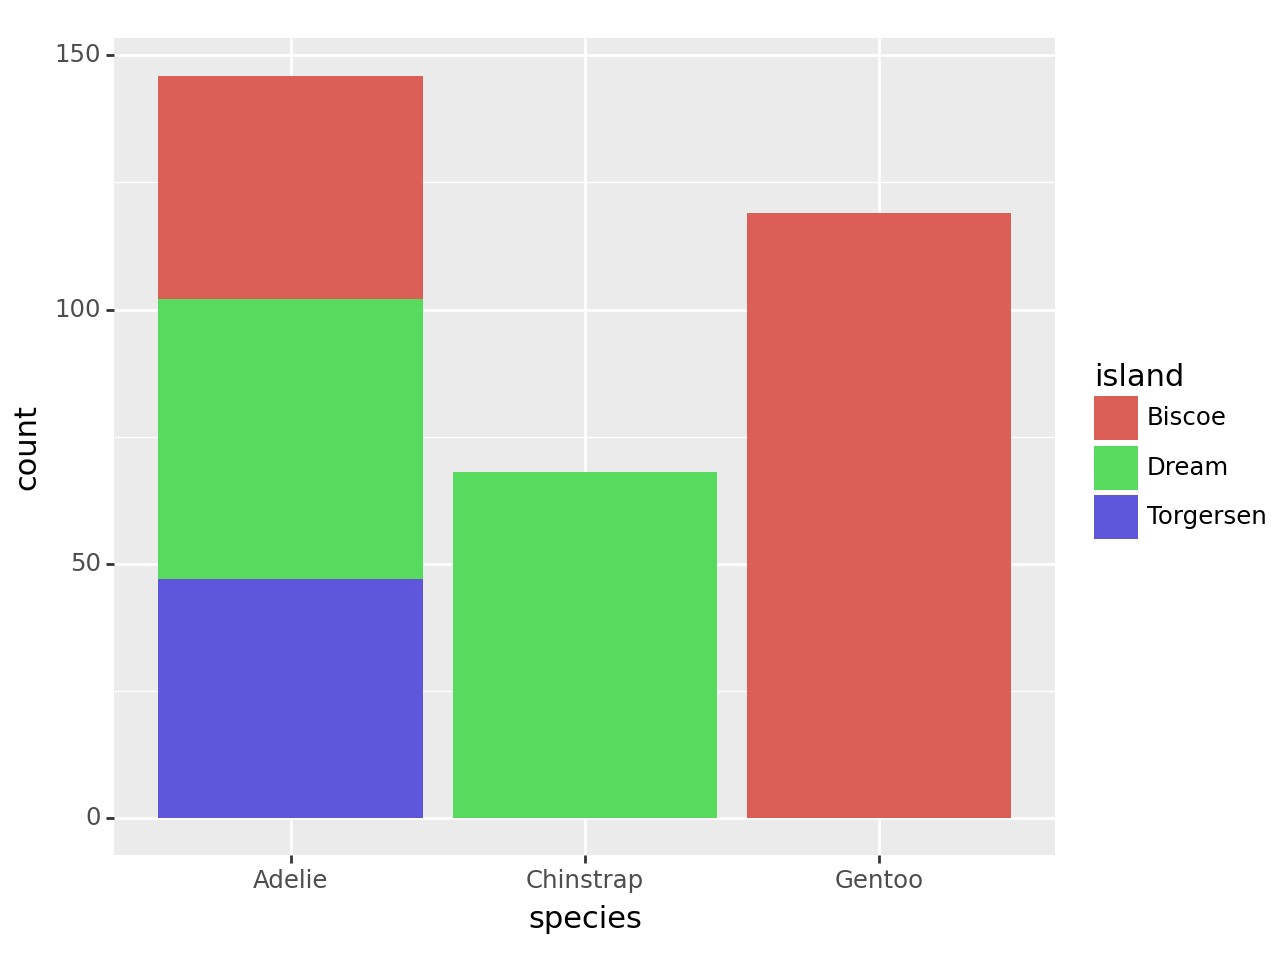

In [ ]:
# Click to see the plot below.

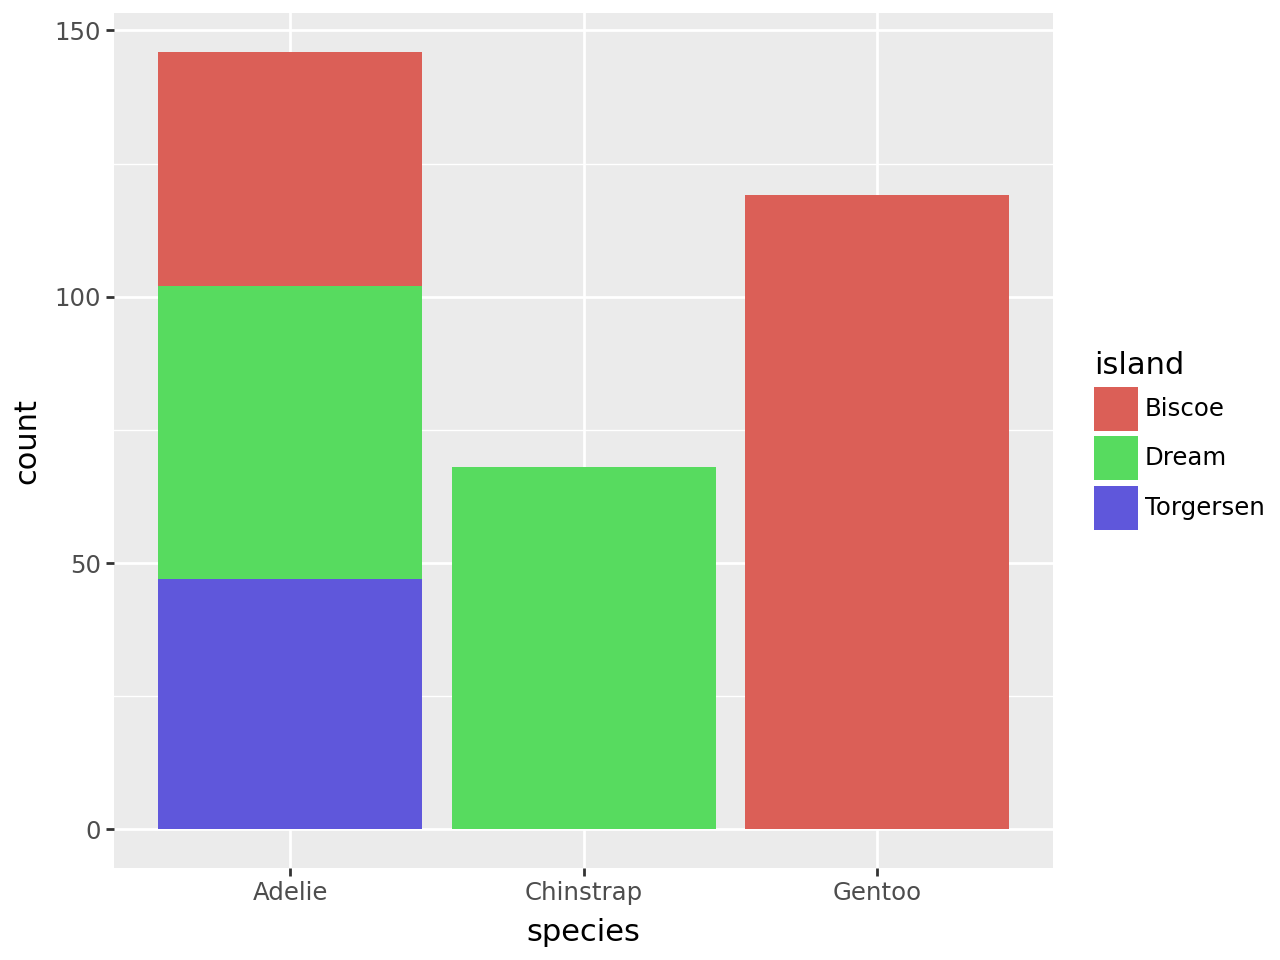

In [ ]:
g_species_island = (
    ggplot(data = penguins, mapping = aes(fill = "island", x = "species"))  +
    geom_bar()
)
g_species_island

### Q4b: Species x Sex

- Do the same as Q4a but for species (x) and sex (fill)

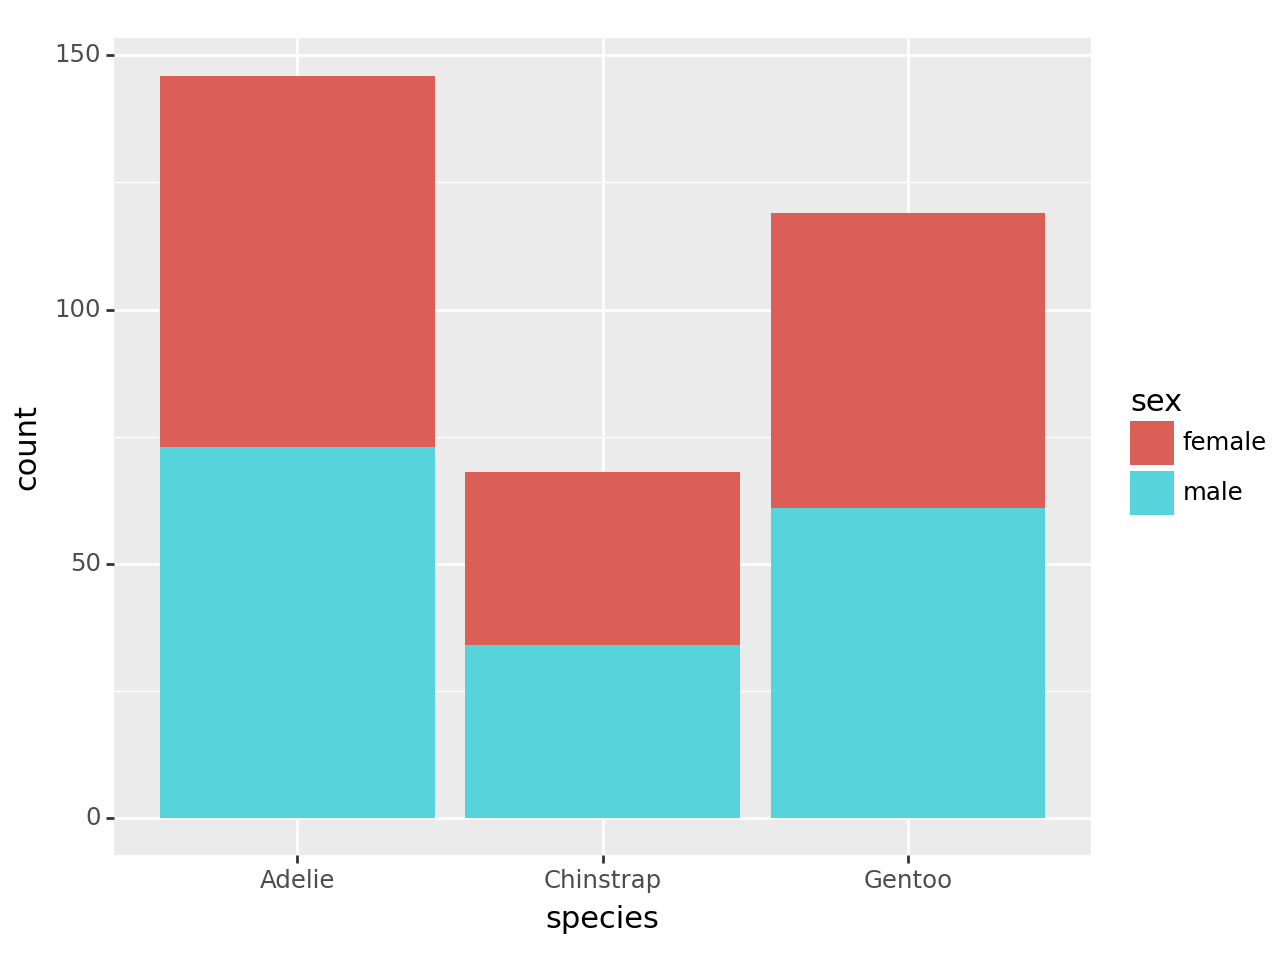

In [ ]:
# Click to see the plot below.

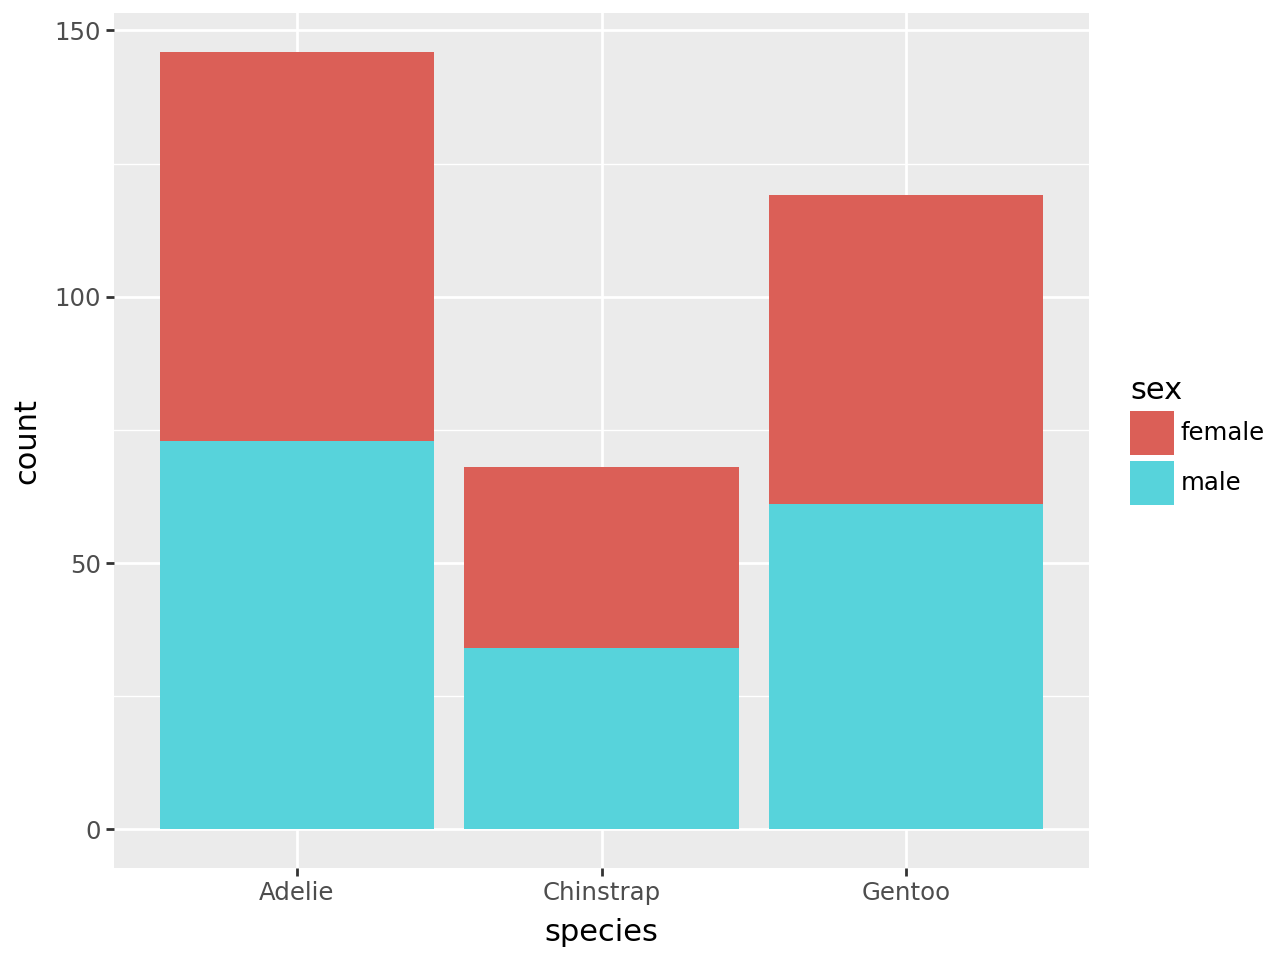

In [ ]:
g_species_island = (
    ggplot(data = penguins, mapping = aes(x = "species", fill = "sex"))  +
    geom_bar()
)
g_species_island

### Q4c: Species x Sex - Alterantive

- The previous graph can be hard to compare between the two sex.
- We can change how barplots are position using `position` argument.
- The default `position` is `stack`. An alternative position is `dodge` (side by side).
- Update your `geom_bar` to include `position='dodge'`

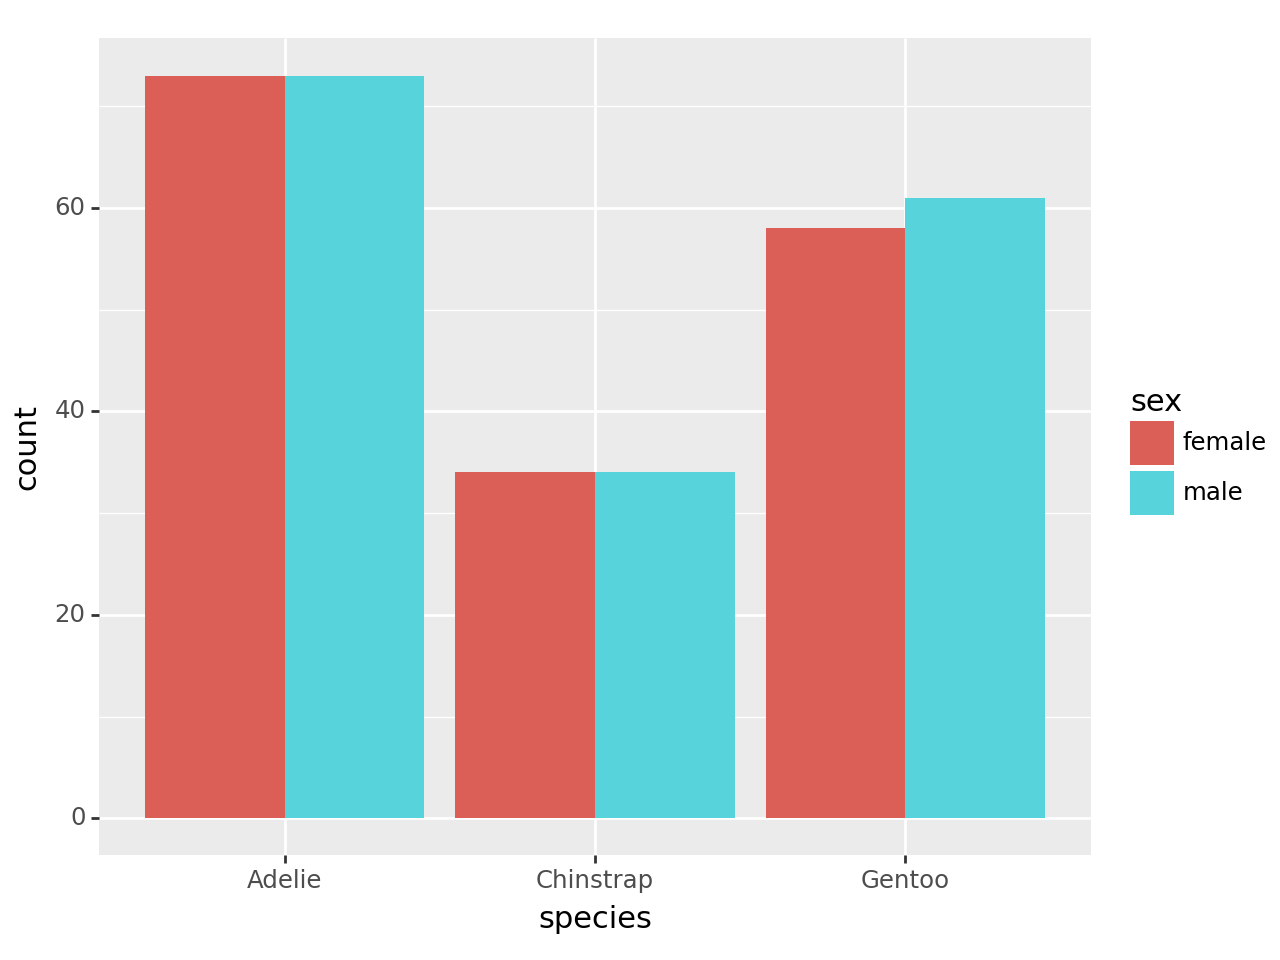

In [ ]:
# Click to see the plot below.

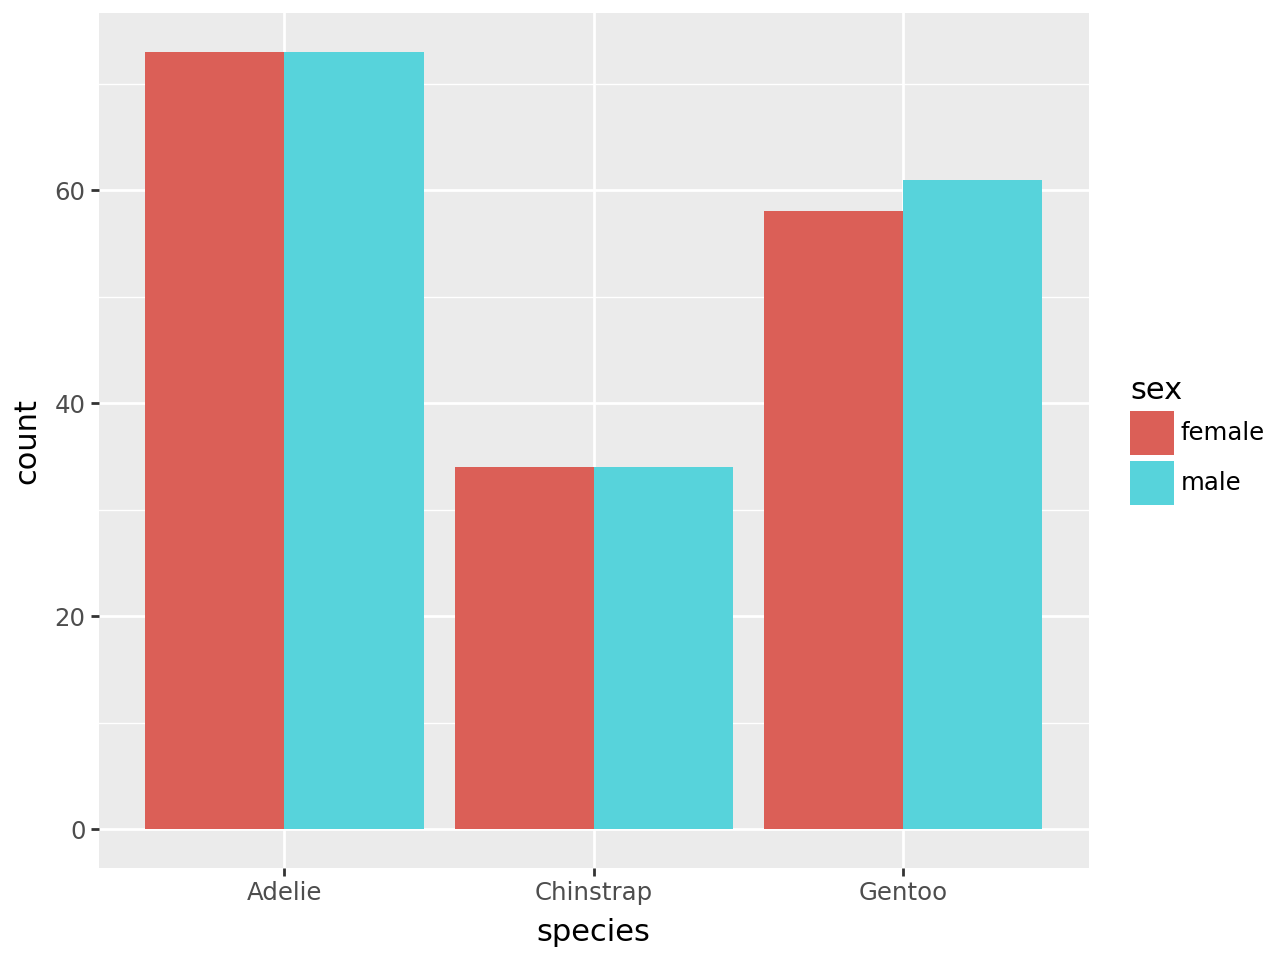

In [ ]:
g_species_island = (
    ggplot(data = penguins, mapping = aes(x = "species", fill = "sex"))  +
    geom_bar(position = 'dodge')
)
g_species_island

<br>

---

## Explore `mpg` dataset on your own.



In this section, you will plot several graphs for the dataset `mpg` in plotnine. Learn more about the dataset [here](https://plotnine.org/reference/mpg.html#plotnine.data.mpg).

In [ ]:
mpg.head()  # We already export the data at the beginning.

manufacturer model  displ  year  cyl       trans drv  cty  hwy fl    class
0         audi    a4    1.8  1999    4    auto(l5)   f   18   29  p  compact
1         audi    a4    1.8  1999    4  manual(m5)   f   21   29  p  compact
2         audi    a4    2.0  2008    4  manual(m6)   f   20   31  p  compact
3         audi    a4    2.0  2008    4    auto(av)   f   21   30  p  compact
4         audi    a4    2.8  1999    6    auto(l5)   f   16   26  p  compact

### Q5a-e: Explore selected variables

- Create 5 plots for the following variables or sets of variables:
  1. manufacturer
  2. cty (city miles per gallon)
  3. manufacturer x cty
  4. manufacturer x class
  5. cty x hwy (highway miles per gallon) x manufacturer

- Make sure to properly label x and y axis.
- You can change the size of plot using `theme(figure_size=(w, h))` (`w` and `h` are in inch)

Manufacturer

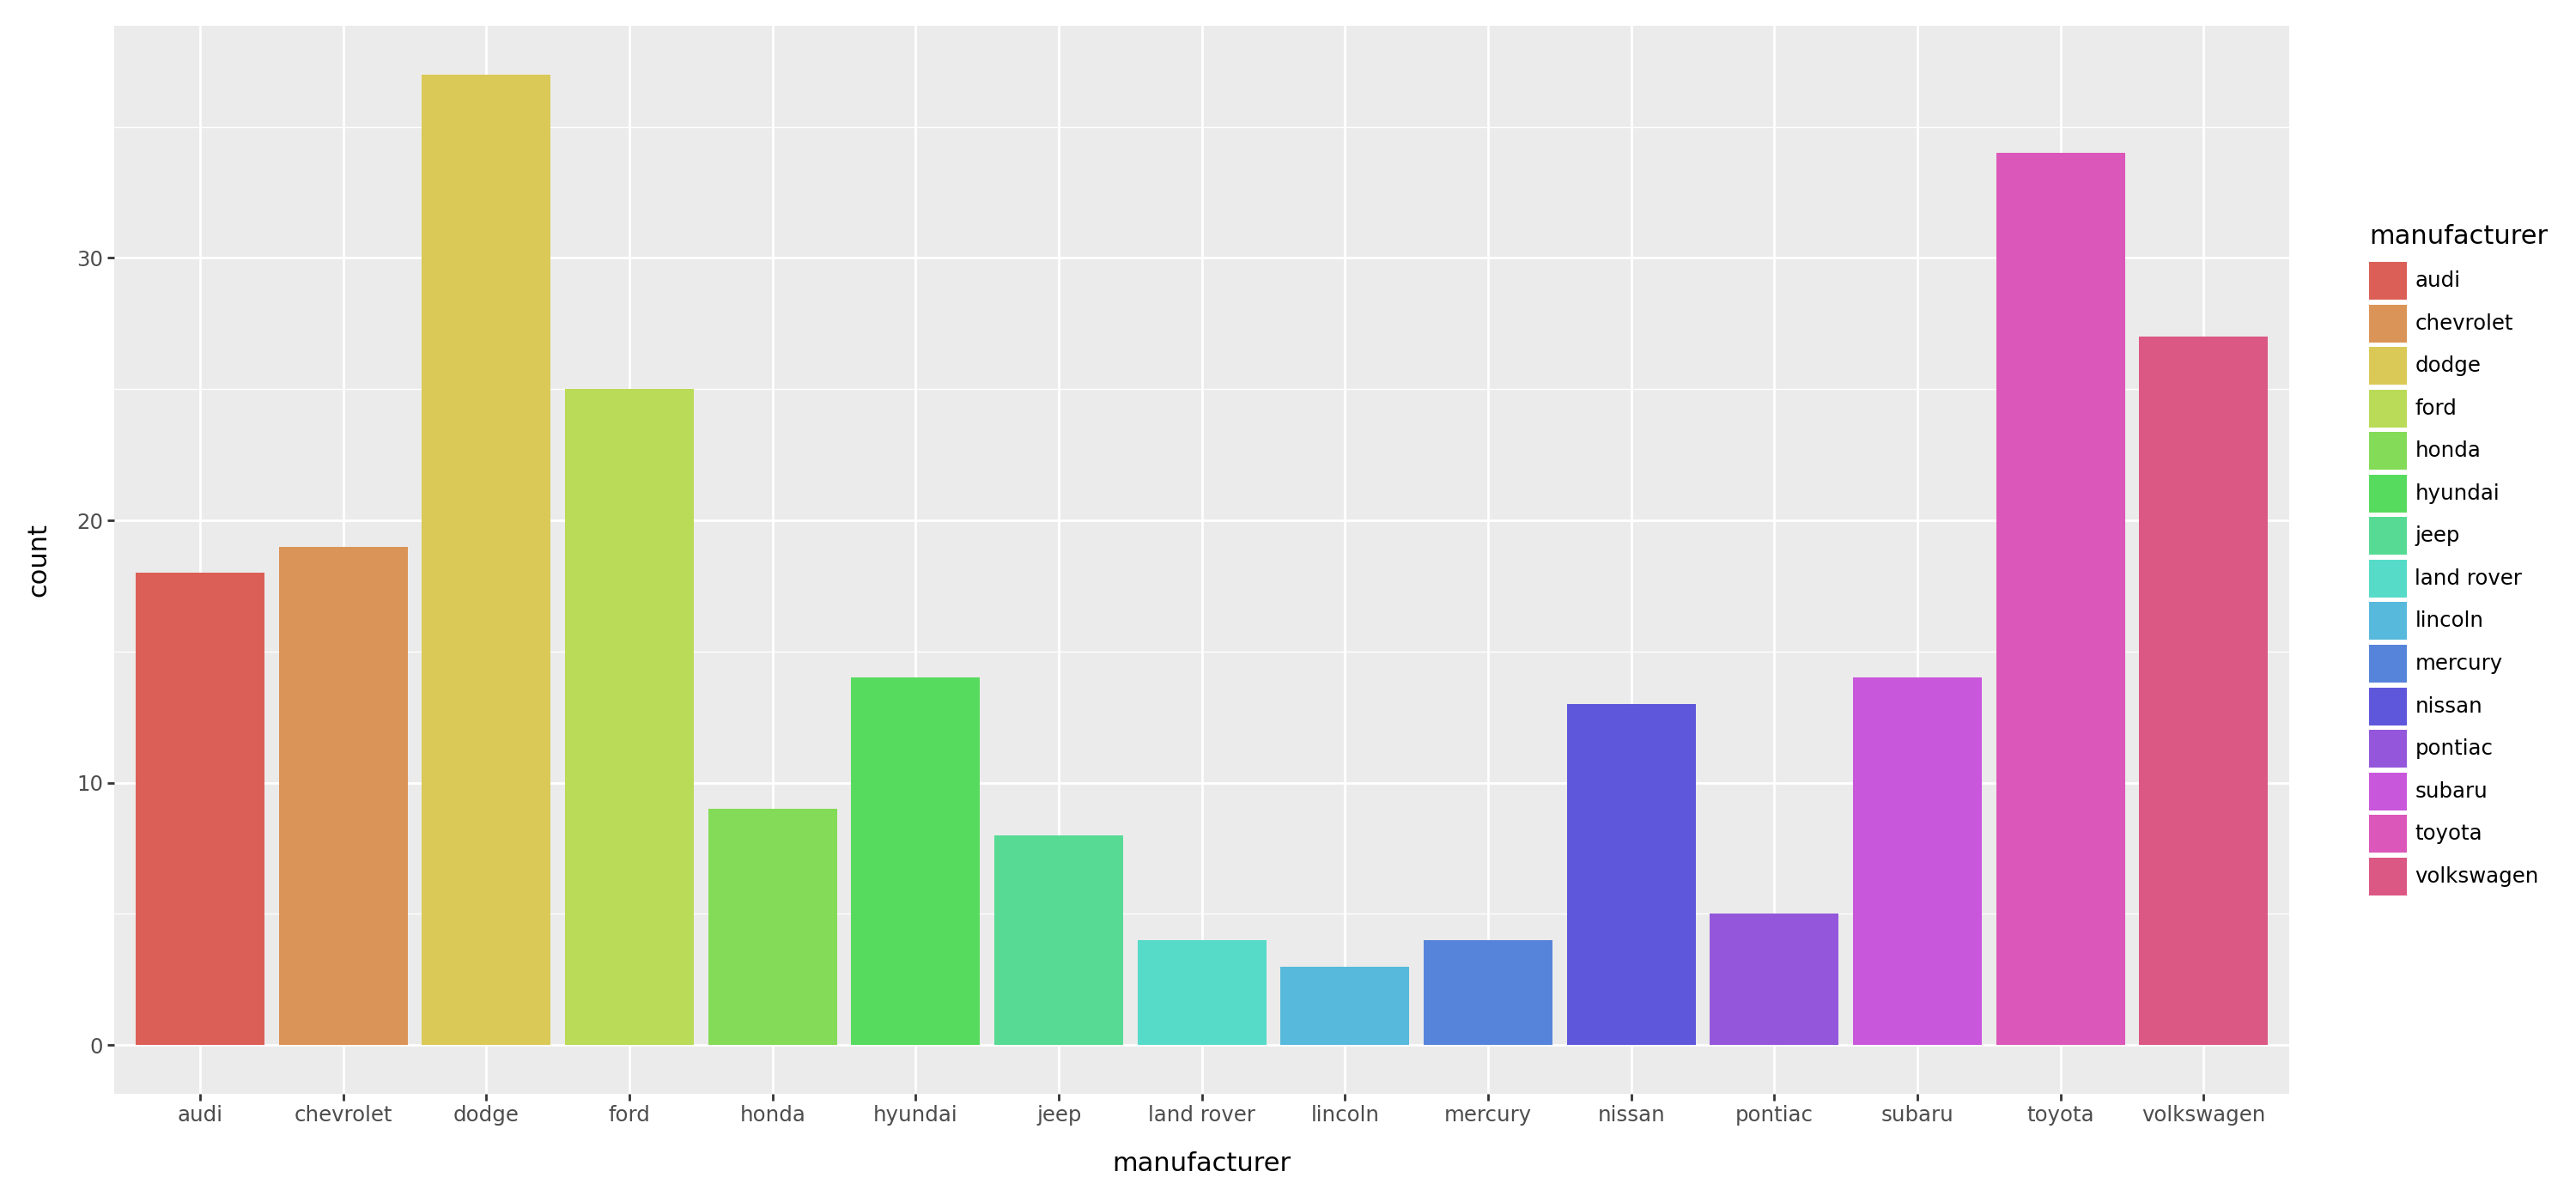

In [ ]:
#Q5a
# Manufacturer is a categorical data.
(
    ggplot(data = mpg, mapping = aes(x = "manufacturer", fill = "manufacturer"))
    +geom_bar()
    +theme(figure_size=(15,7))
) # A bar plot is appropriate to visualize them

<ipython-input-47-3eca1f080420>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


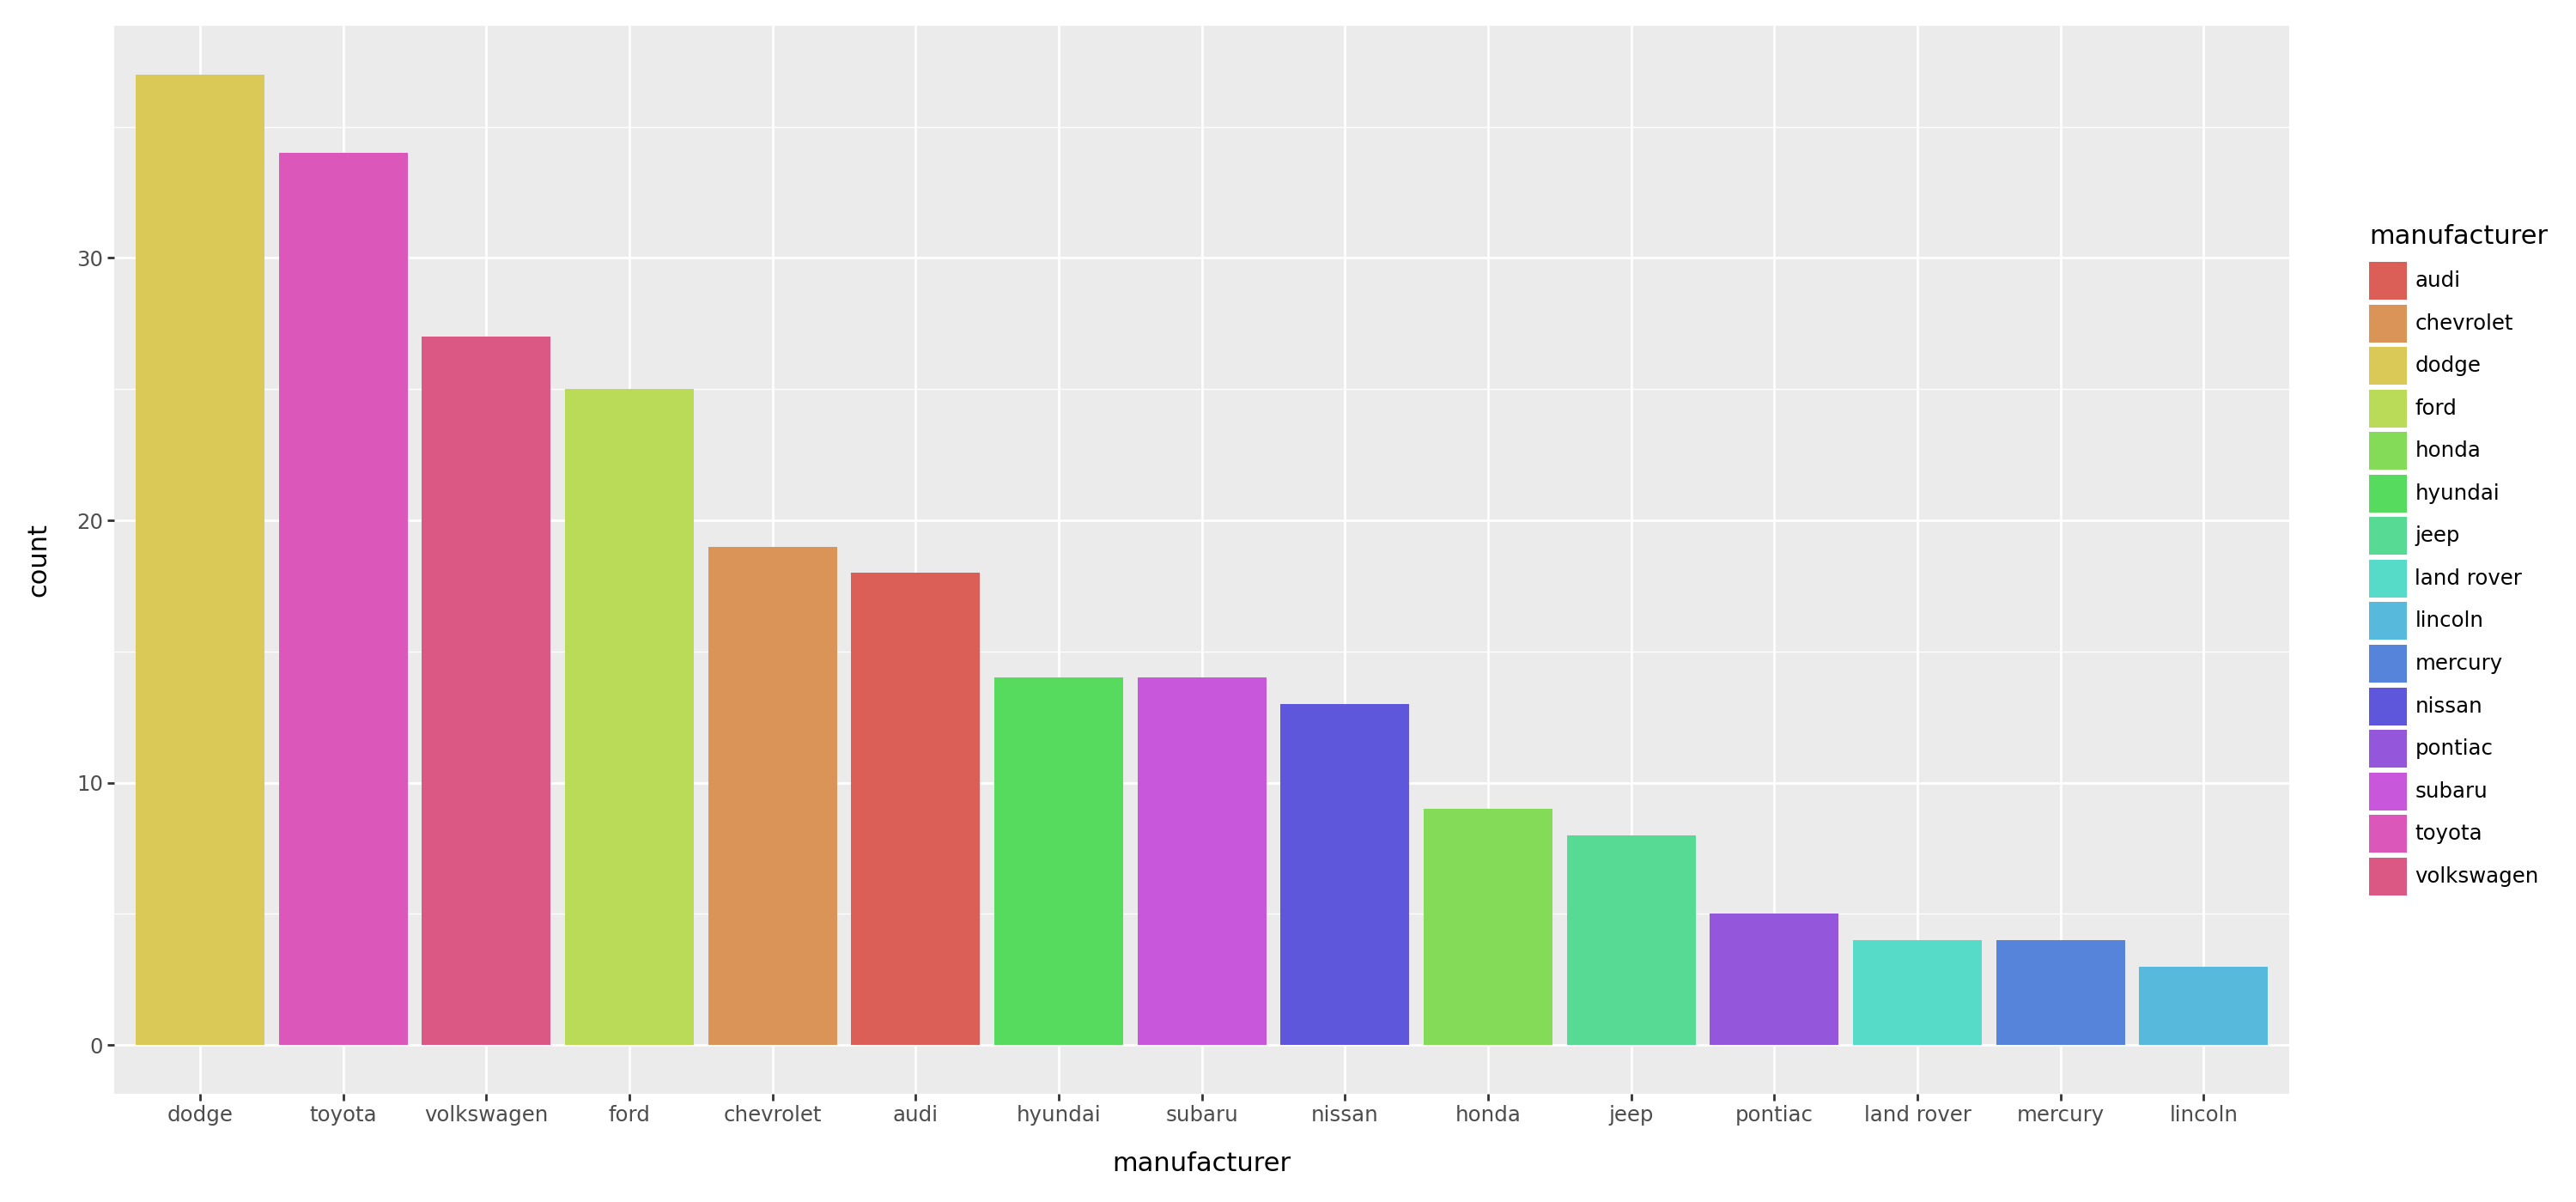

In [ ]:
#Q5a extra. To make it more informative, we might sorted the bar
count_by_manufact = mpg.groupby("manufacturer").count()
sorted_df = count_by_manufact.sort_values(by = "model", ascending = False)
sorted_df
sorted_count_by_mft = list(sorted_df.index)
sorted_count_by_mft
# Manufacturer sorted by count
(
    ggplot(data = mpg, mapping = aes(x = "manufacturer", fill = "manufacturer"))
    +scale_x_discrete(limits=sorted_count_by_mft)
    +geom_bar()
    +theme(figure_size=(15,7))
)

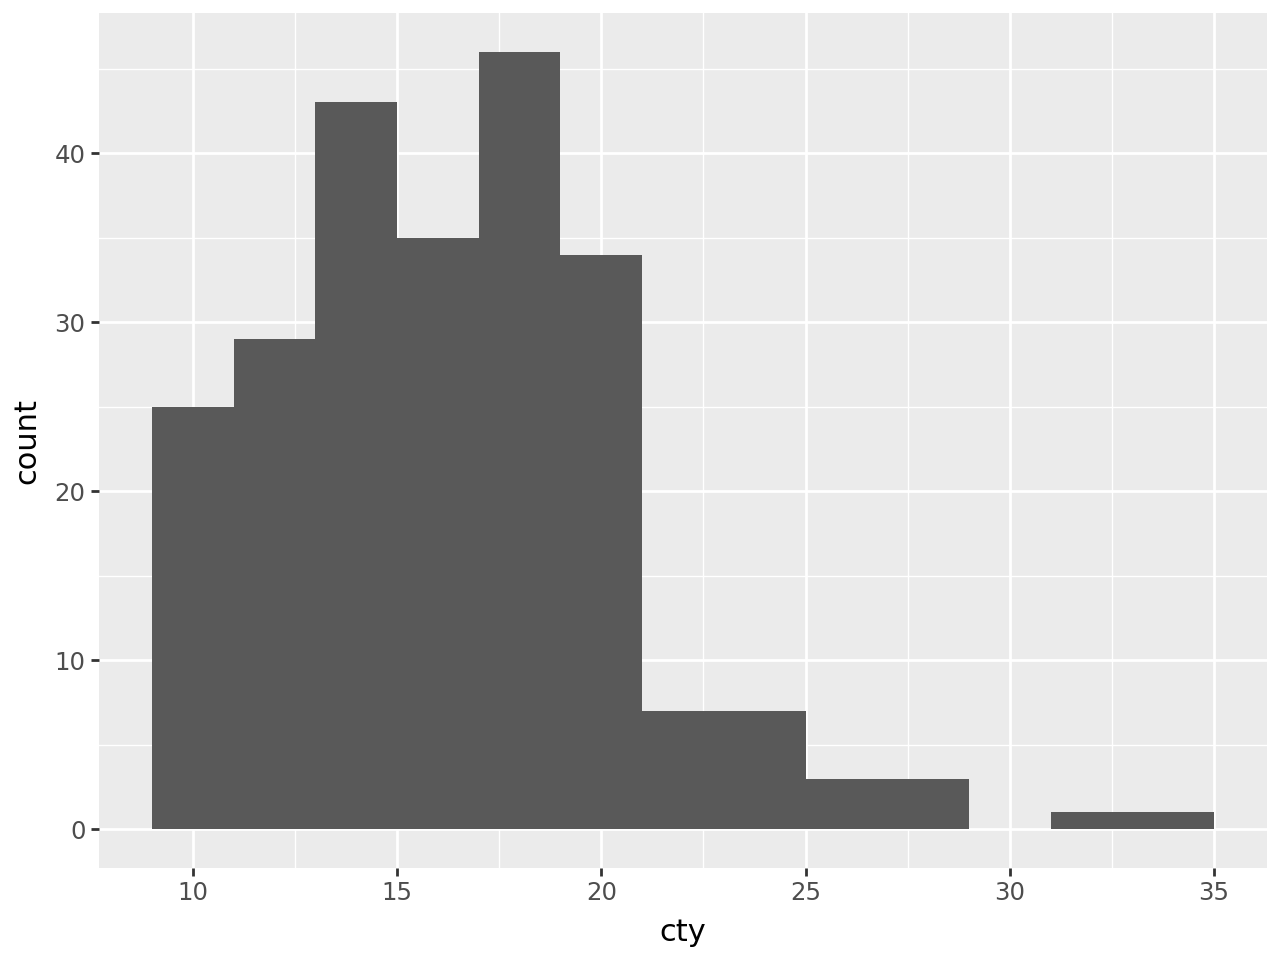

In [ ]:
#Q5b - 'cty' is a numerical data
# so, you can visualize cty as a histogram
(
    ggplot(data = mpg, mapping = aes(x = "cty"))
    +geom_histogram(binwidth=2)
)

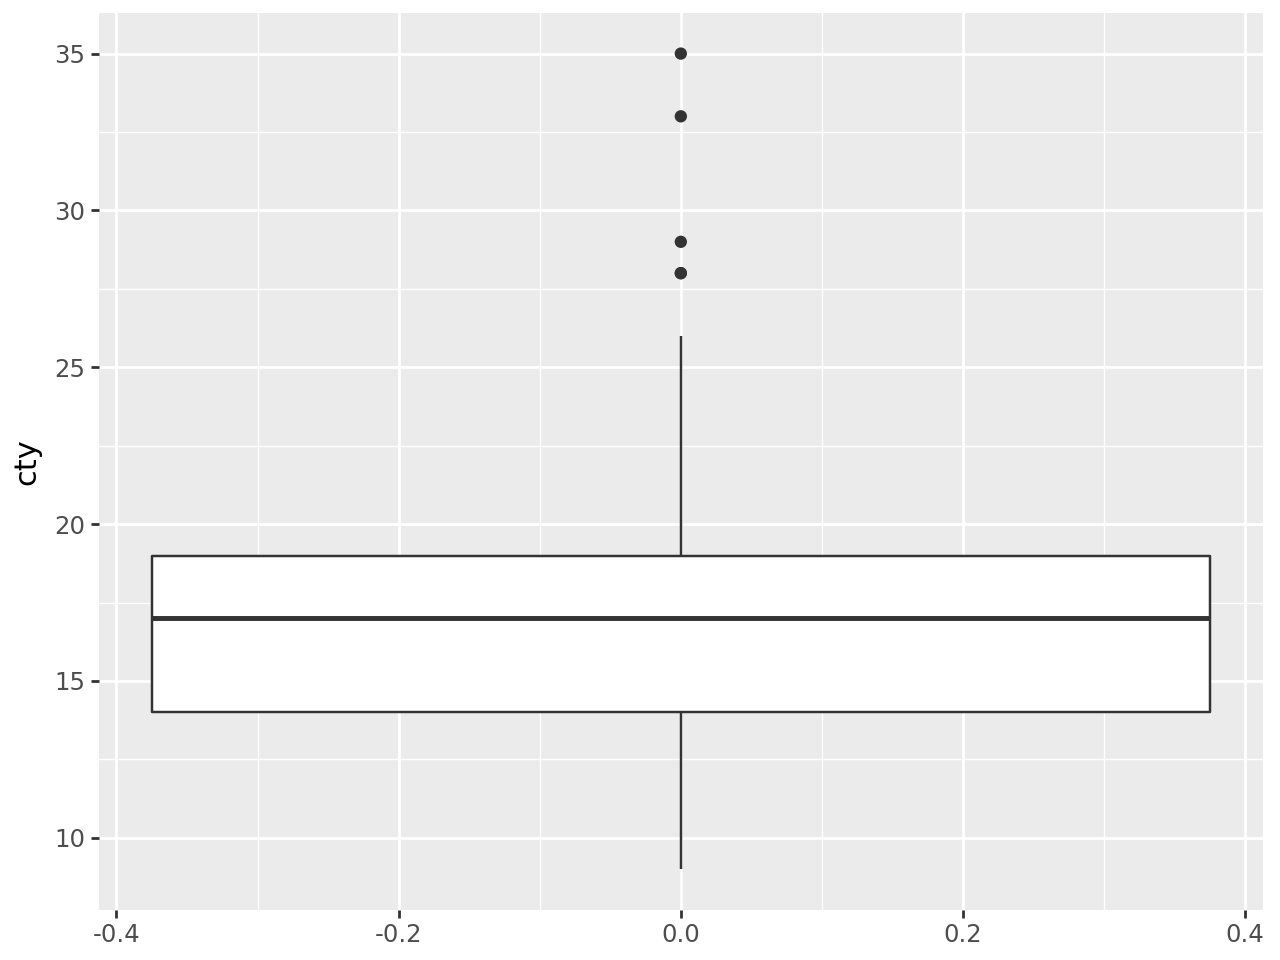

In [ ]:
#Q5b - 'cty' is a numerical data
# OR, you can visualize cty as a boxplot
(
    ggplot(data = mpg, mapping = aes(y = "cty"))
    +geom_boxplot()
)

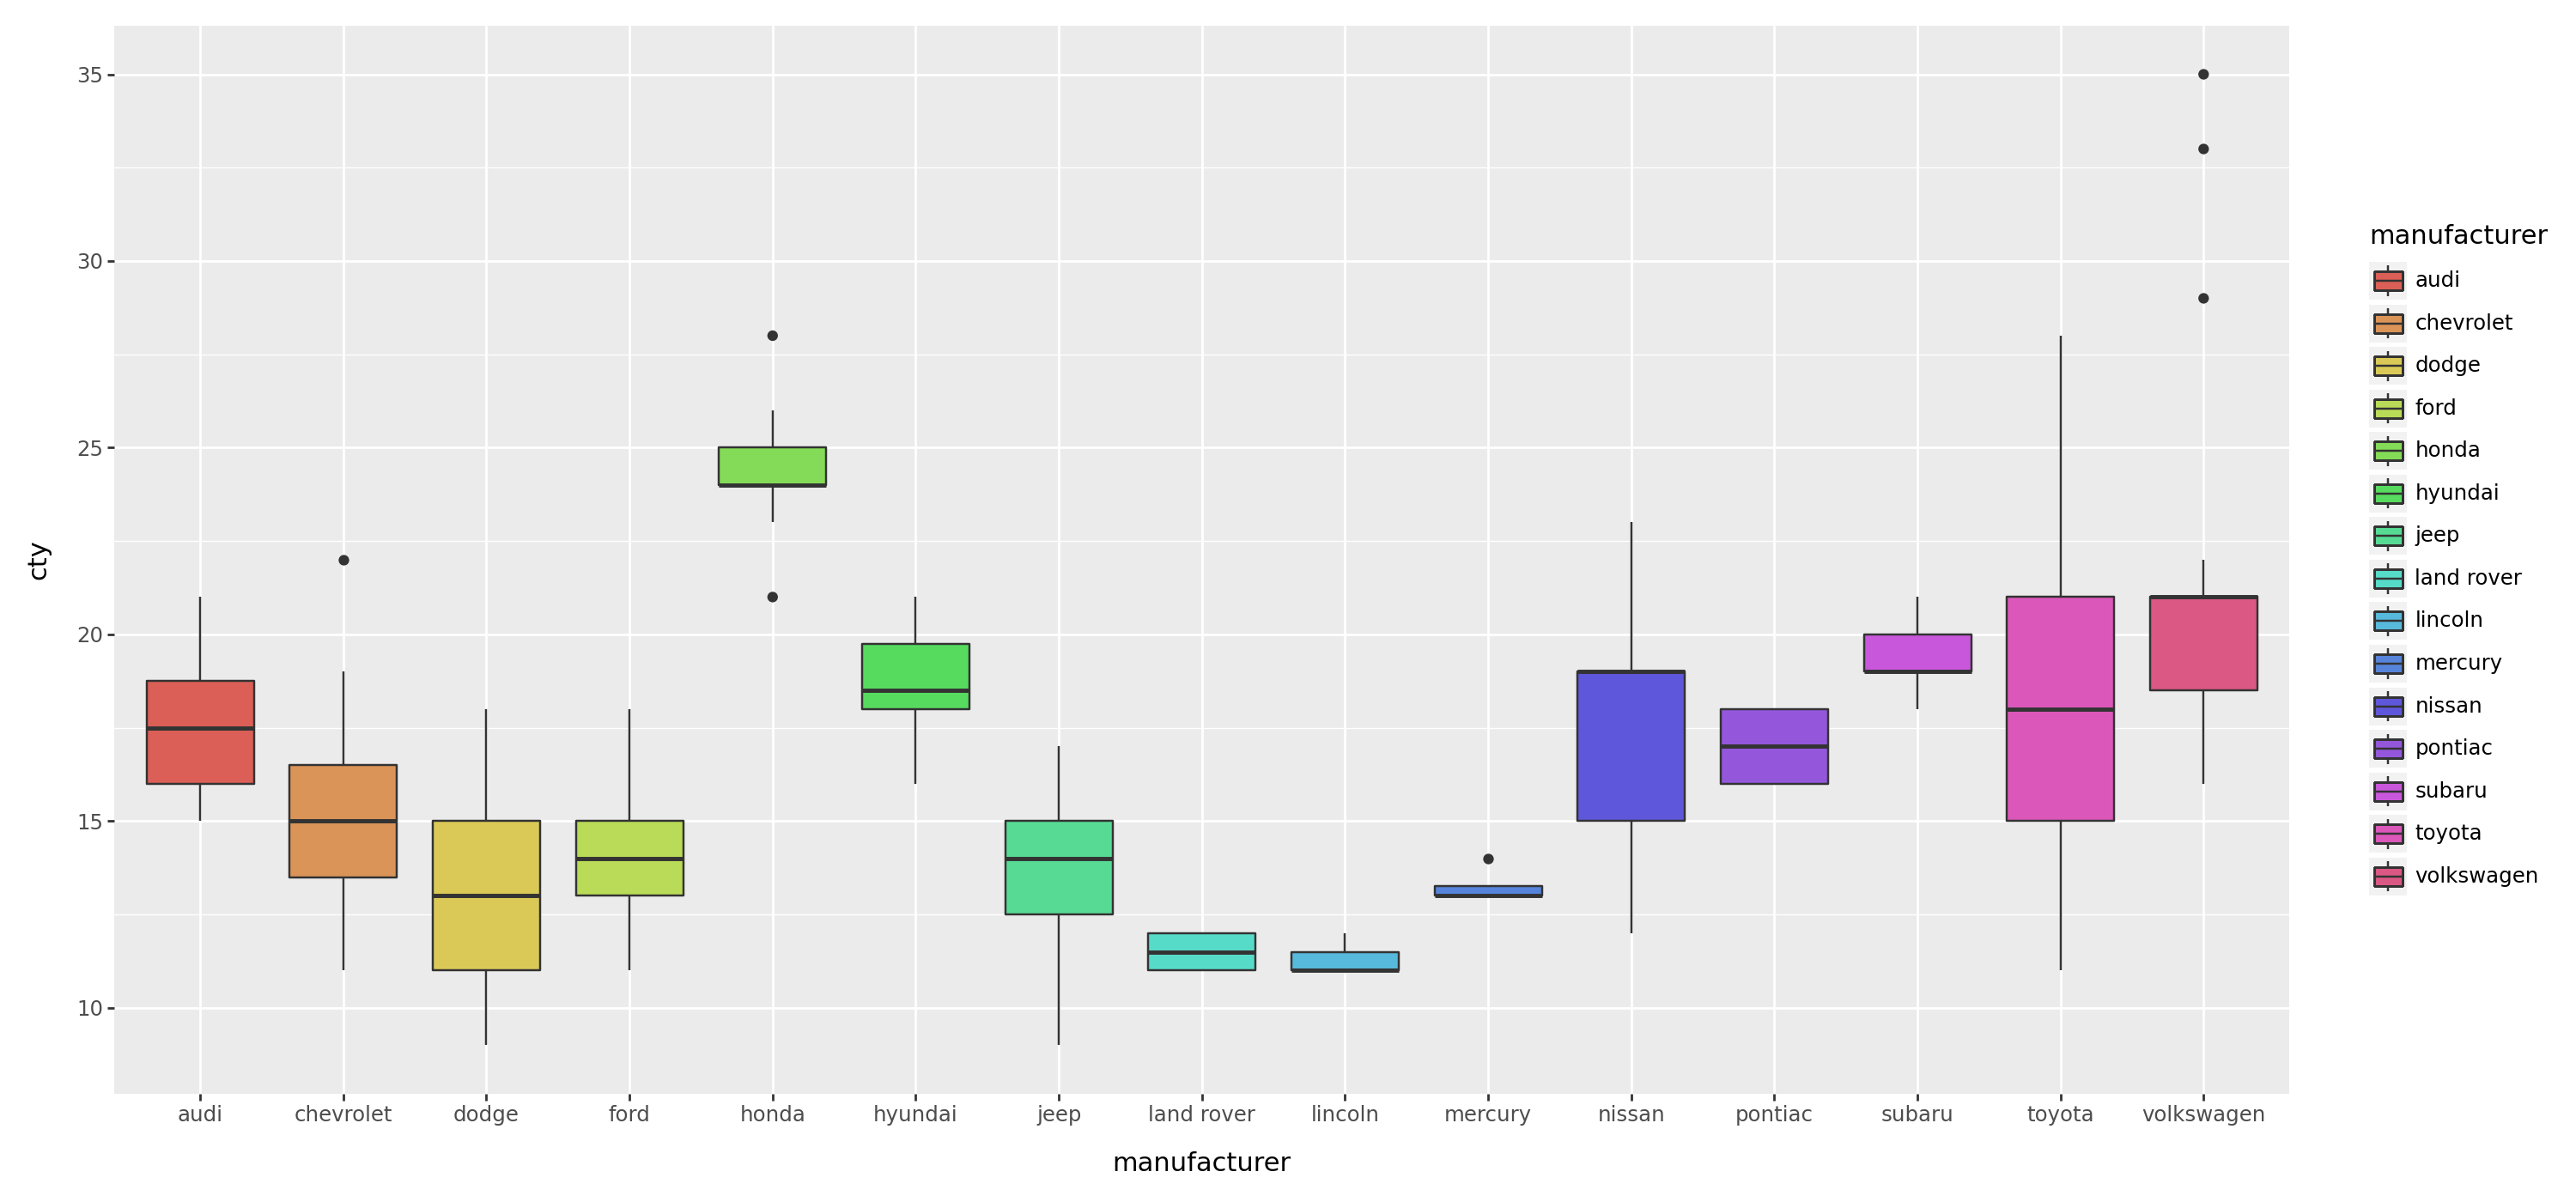

In [ ]:
#Q5c - # Manufacturer x cty
# To see the interaction between a categorical variable (manufacturer) and a numerical variable ('cty')
# a boxplot is appropriate (colored for easier map to the manufacturers)
(
    ggplot(data = mpg, mapping = aes(x = "manufacturer", y = "cty", fill = "manufacturer"))
    +geom_boxplot()
    +theme(figure_size=(15,7))
)

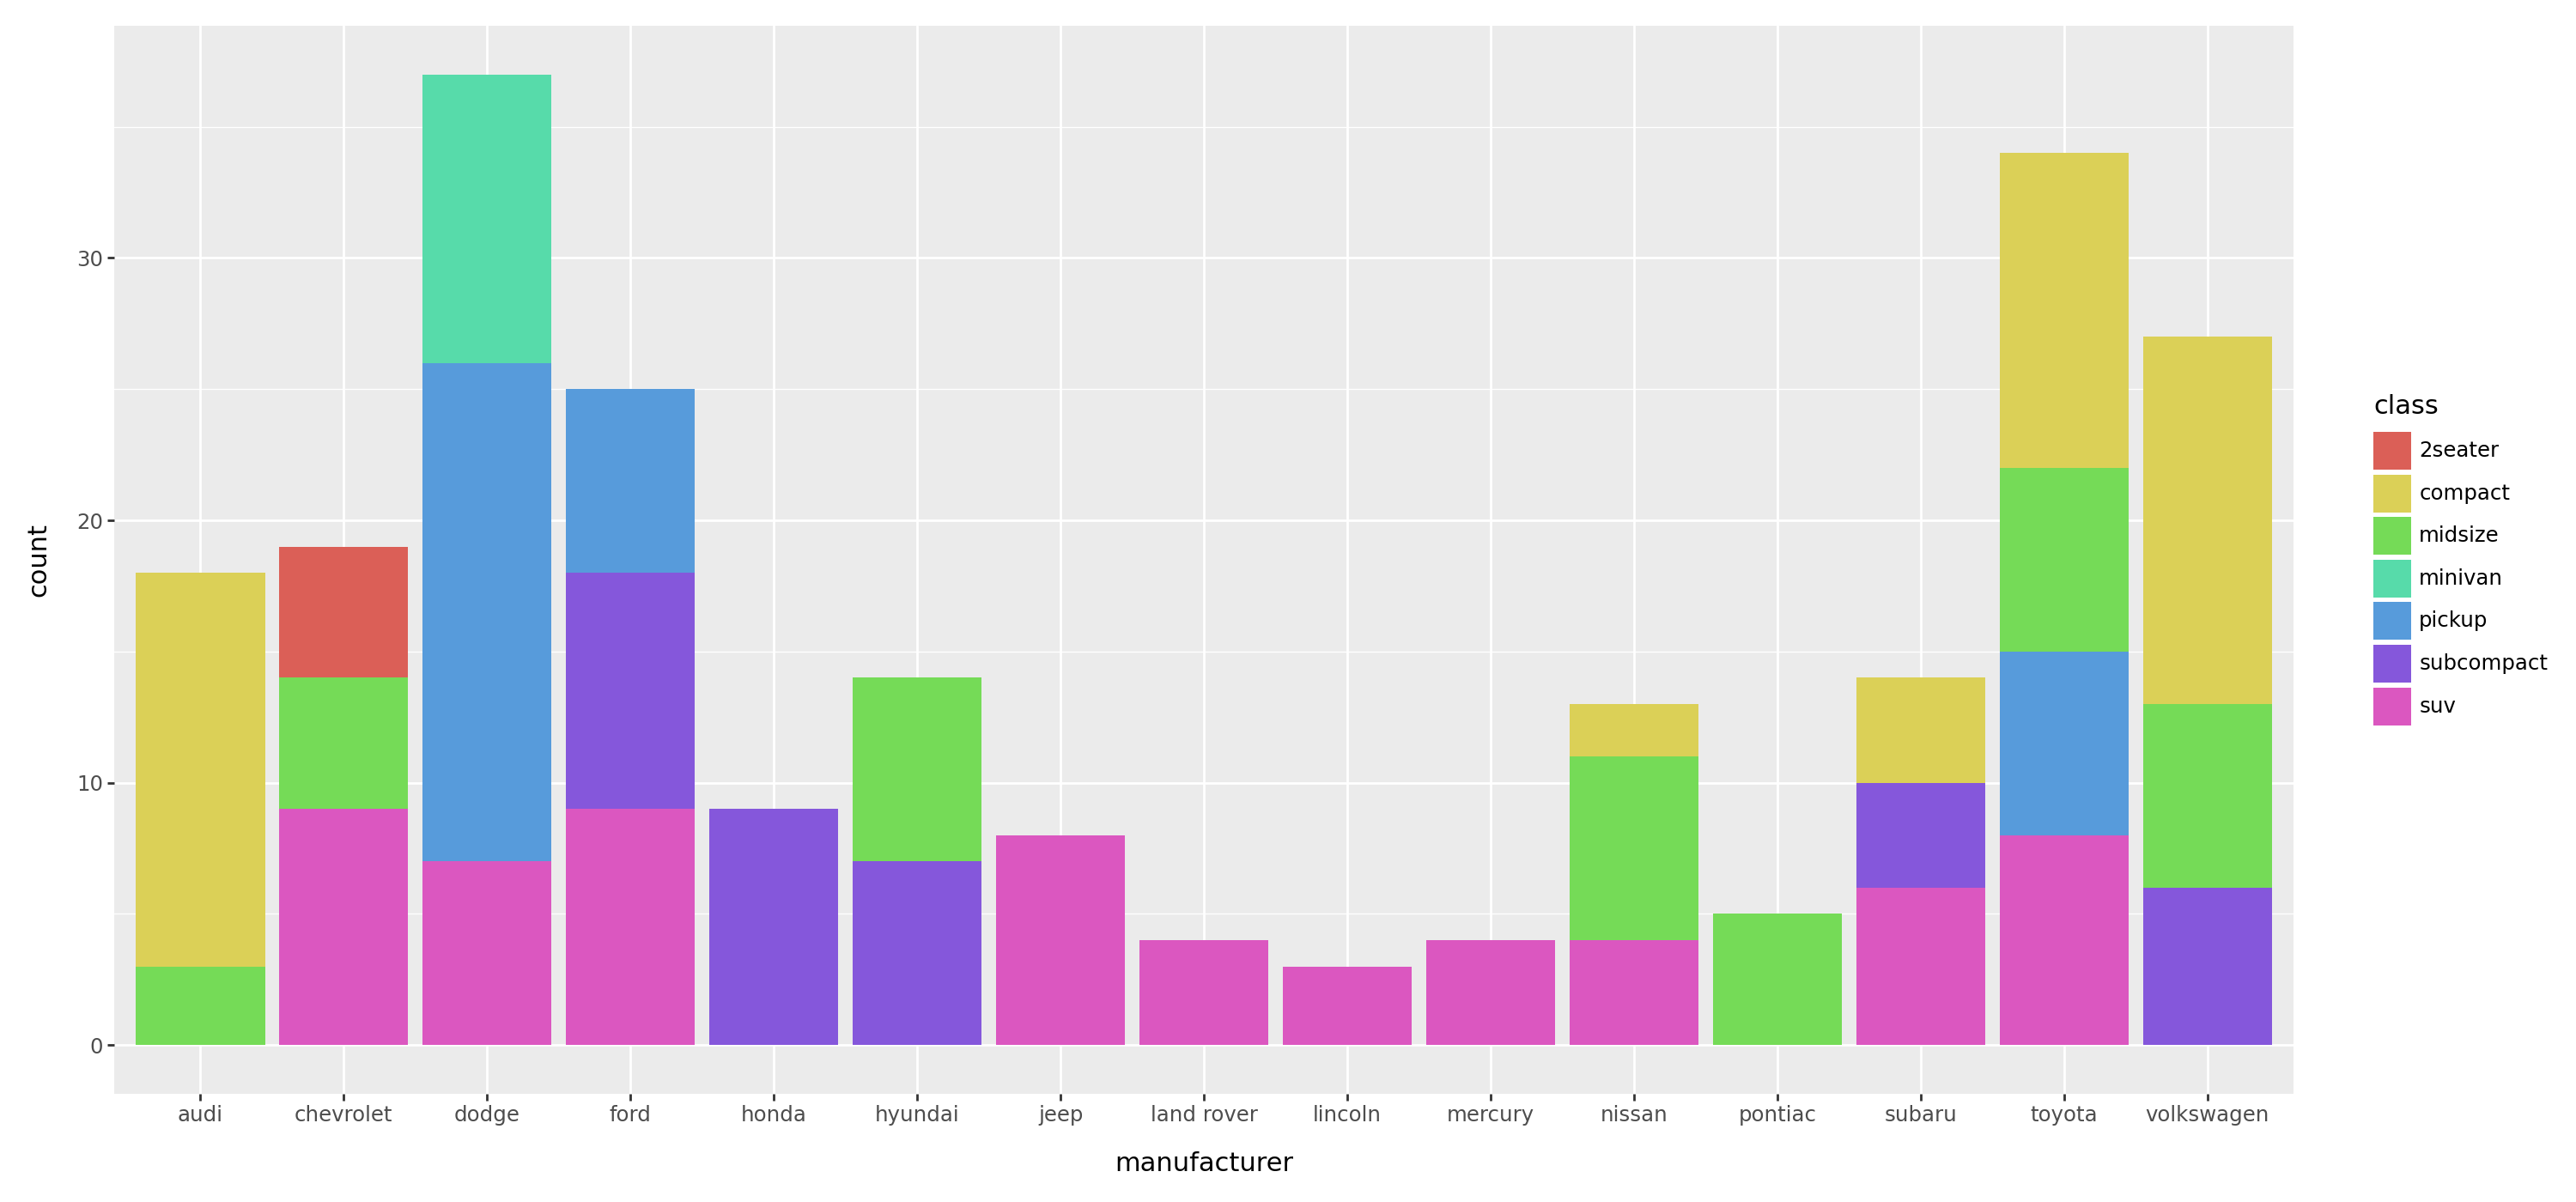

In [ ]:
# Q5d. - Manufacturer x class
# In this case, both variables are categorical variables. One way to plot them is using bar plots with 'fill' option
(
    ggplot(data = mpg, mapping = aes(x = "manufacturer", fill = "class"))
    +geom_bar()
    +theme(figure_size=(15,7))
)

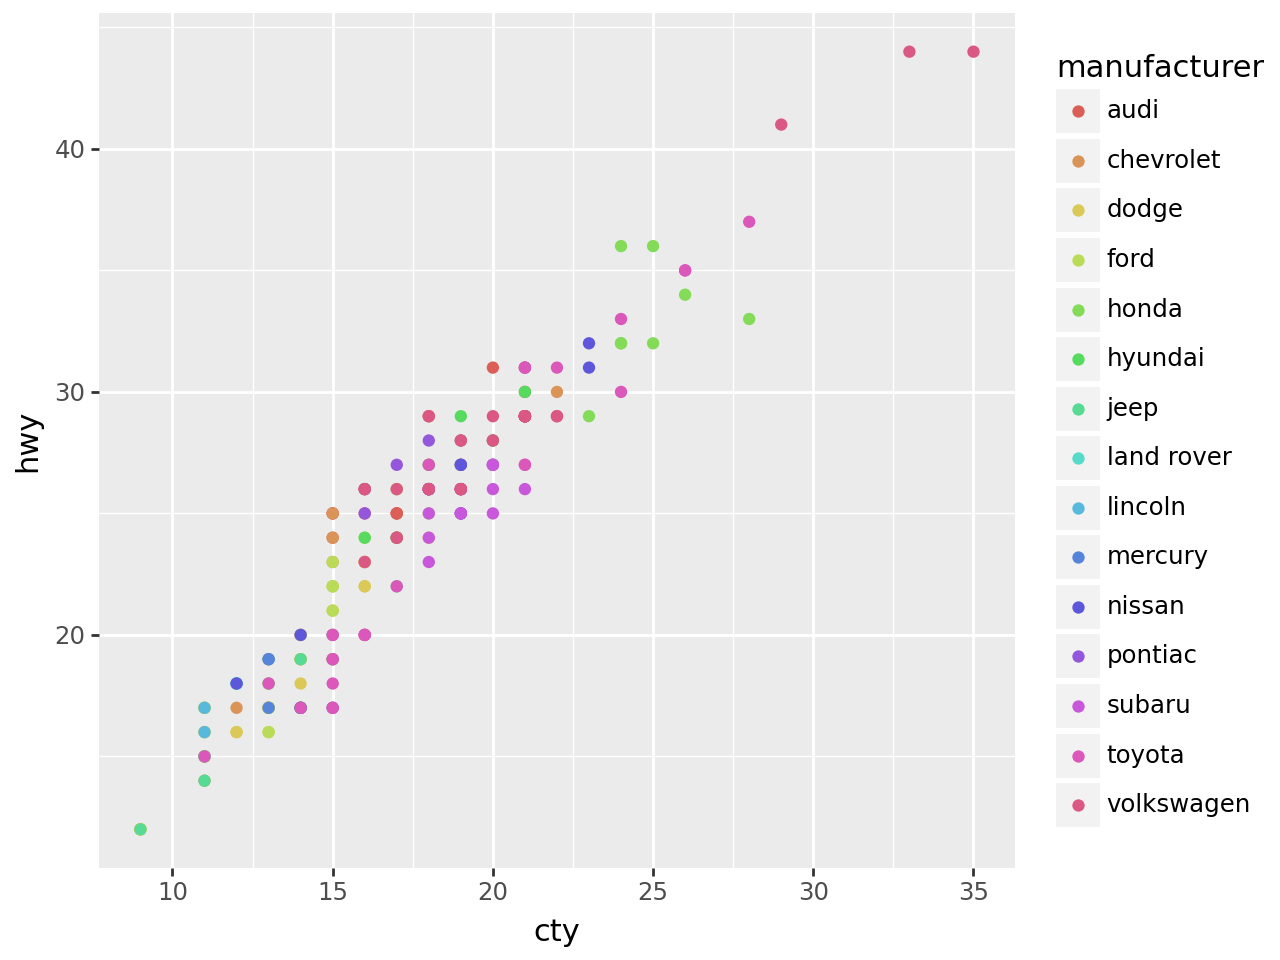

In [ ]:
# Q5e  - cty x hwy x manufacturer
# These three variables consist of two numerical data and a categorical one.
# They are best to visualize by setting x and y axis to the two numerical variable, then map the categorical variable onto them.
# One way to achieve this is through the scatter plot
(
  ggplot(data = mpg, mapping = aes(x = "cty", y = "hwy", color="manufacturer")) +
  geom_point()
)


# Submission
- File -> Download -> Download .ipynb
- Upload to MS Teams